# Summary

The content of this notebook allows to produce the Figures used in our paper.

- [6.1.1](#6.1.1): Calibration with a single station
- [6.1.2](#6.1.2): Various MCS and flow concurrency
- [6.2.1](#6.2.1): Large scale overall throughput
- [6.2.2](#6.2.2): Large scale single flows
- [6.2.3](#6.2.3): Large scale throughput by part
- [6.2.4](#6.2.4): Large scale performance

In [7]:
library(plyr); library(dplyr)
library(ggplot2)
library(tidyr)
#library(tikzDevice)
library(gridExtra)
library(ggpubr)
library(plotly)
library(ggquadrilateral)
library(cowplot)

In [4]:
#+++++++++++++++++++++++++
# Fonction pour calculer la moyenne et l'écart-type
# pour chaque groupe
#+++++++++++++++++++++++++
# data : une data frame
# varname: le nom de la colonne contenant la variable 
  # d'intérêt 
# groupnames : vecteur contenant les noms des colonnes à utiliser
  # comme des variables de grouping 
data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- plyr::rename(data_sum, c("mean" = varname))
 return(data_sum)
}

<a id='6.1.1'></a>
# Figure 6.1.1

This chapter of the file is used to reproduce the Figure of the paper regarding the maximum available throughput of the channel.

Launcher: `run/run_g5k_microbenchmarks_sec611.s`


simulator simTime simTimeOffset topo dataSize nSTA bitRate date      
1 ns3        1.8179 10            2    10000000 1       NA   1652773083
2 sg        70.0000 NA            2    10000000 1    44.05   1652773083
3 ns3        2.7466 10            2    15000000 1       NA   1652773083
4 sg        70.0000 NA            2    15000000 1    44.05   1652773083
5 ns3        3.6364 10            2    20000000 1       NA   1652773083
6 sg        70.0000 NA            2    20000000 1    44.05   1652773083
  corrFactor radius ⋯ PhyRxDrop avgSignal avgNoise avgSNR  nbSinkTot
1 NA         15     ⋯ 280       -49.5284  -91.0165 41.4882  1       
2 NA         15     ⋯  NA             NA        NA      NA NA       
3 NA         15     ⋯ 780       -49.5284  -91.0200 41.4916  1       
4 NA         15     ⋯  NA             NA        NA      NA NA       
5 NA         15     ⋯ 889       -49.5284  -91.0168 41.4885  1       
6 NA         15     ⋯  NA             NA        NA      NA NA       
  totEnergyConsumption energyDyn energyStat durIDLE durRXTX
1   0.0000                   NA        NA   NA      NA     
2 141.3778             125.0369  16.34096   10      60     
3   0.0000                   NA        NA   NA      NA     
4 141.3778             125.0369  16.34096   10      60     
5   0.0000                   NA        NA   NA      NA     
6 141.3778             125.0369  16.34096   10      60

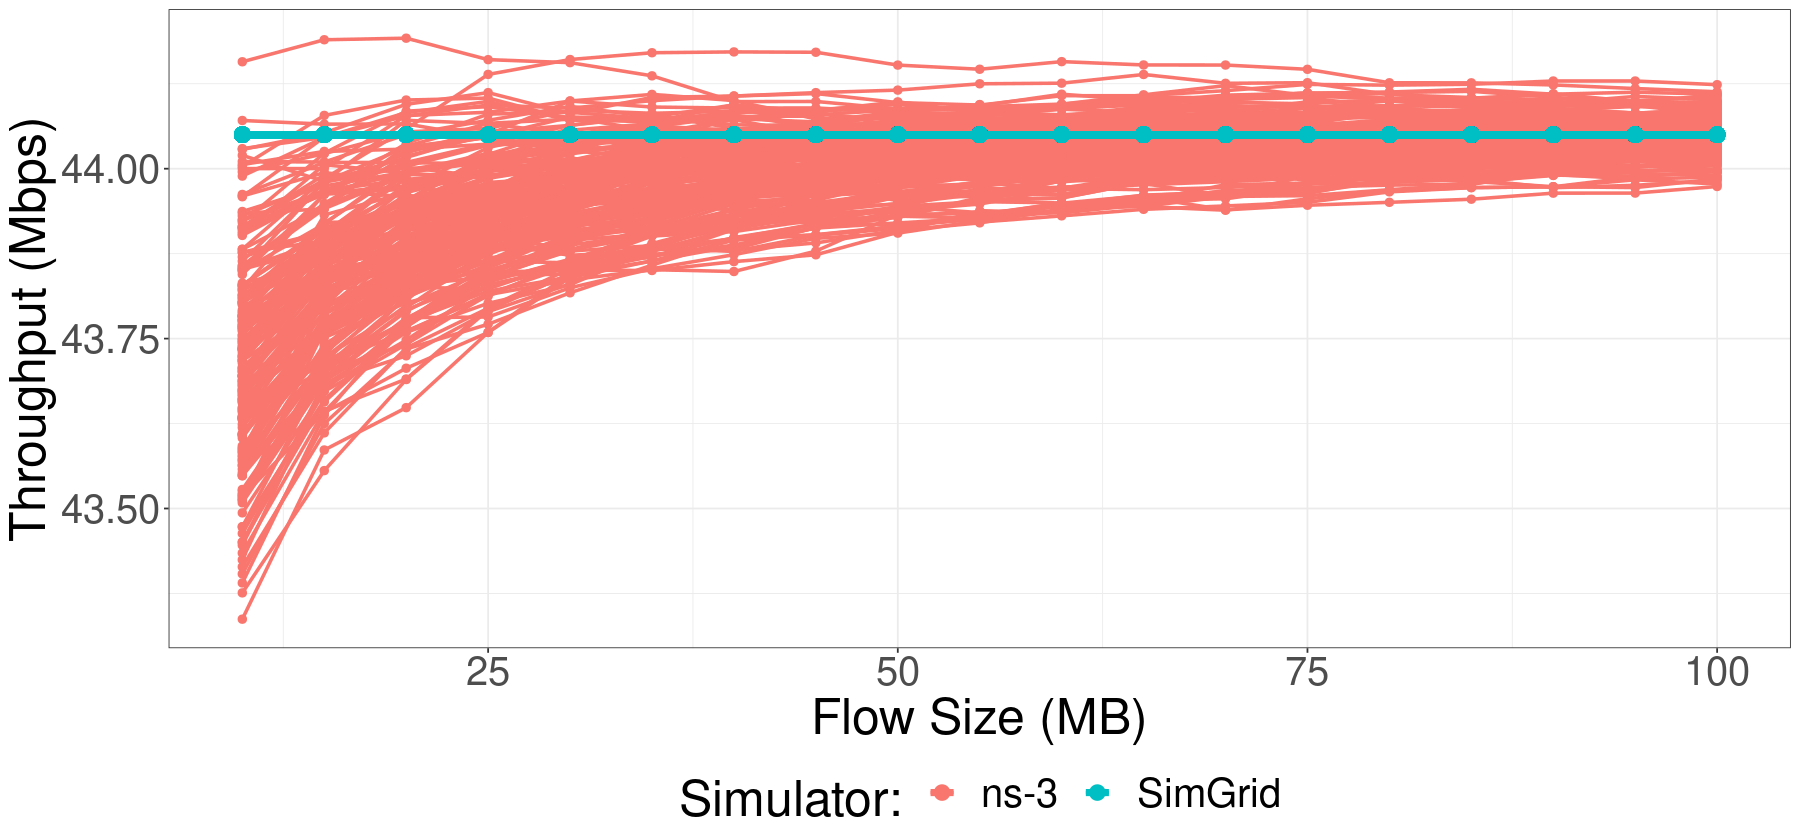

In [324]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652773078/results_1652773078_DEFAULT.csv")) #1652704398/results_1652704398_DEFAULT.csv"))
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")
dsg <- d %>% filter(simulator=="sg") %>% mutate(simulatorPP="SimGrid")

head(d)

options(repr.plot.width=15, repr.plot.height=7)
gc <- ggplot() +
  geom_line(data = dns, aes(x=dataSize/1e+6, y=throughput/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=1)+
  geom_point(data = dns, aes(x=dataSize/1e+6, y=throughput/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=2)+
  geom_line(data = dsg, aes(x=dataSize/1e+6, y=(8*dataReceived)/(simTime-10)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=2)+
  geom_point(data = dsg, aes(x=dataSize/1e+6, y=(8*dataReceived)/(simTime-10)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=4)+

  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(y= "Throughput (Mbps)", x = "Flow Size (MB)", color='Simulator:') 

plot(gc)
ggsave("calibration_1sta.pdf", plot=gc,width=15,height=7)

<a id='6.1.2'></a>
# Figures 6.1.2

Launcher: run_g5k_microbenchmarks_sec612.sh

## MCS2

### 1. Calibration


Call:
lm(formula = 2 * (dataReceived/simTime) ~ nbFlows, data = d_smooth)

Residuals:
     Min       1Q   Median       3Q      Max 
-16941.9  -3326.9    424.4   3685.6  14507.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4239574.95    1039.74  4077.5   <2e-16 ***
nbFlows       -3210.13      28.08  -114.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5560 on 523 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.9614 
F-statistic: 1.307e+04 on 1 and 523 DF,  p-value: < 2.2e-16


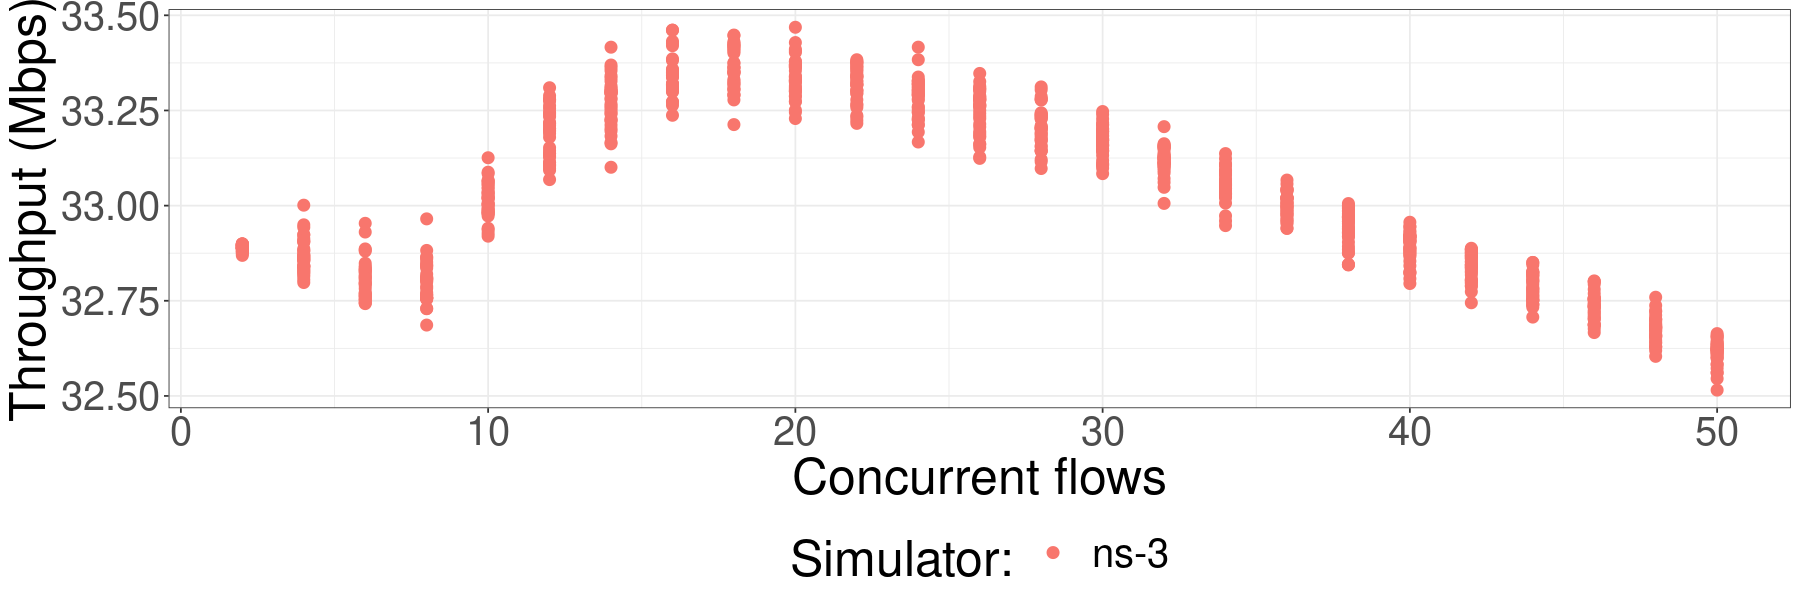

In [180]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652823837/results_1652823837_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")
dsg <- d %>% filter(simulator=="sg") %>% mutate(simulatorPP="SimGrid")

#head(d)

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=3)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)
ggsave("throughput_mcs2.pdf", plot=g1,width=15,height=5)

d_smooth <- dns %>% filter(nbFlows>20)
calibrationRegression = lm(2*(dataReceived/simTime) ~ nbFlows, data=d_smooth)
summary(calibrationRegression)

### 2. Comparison

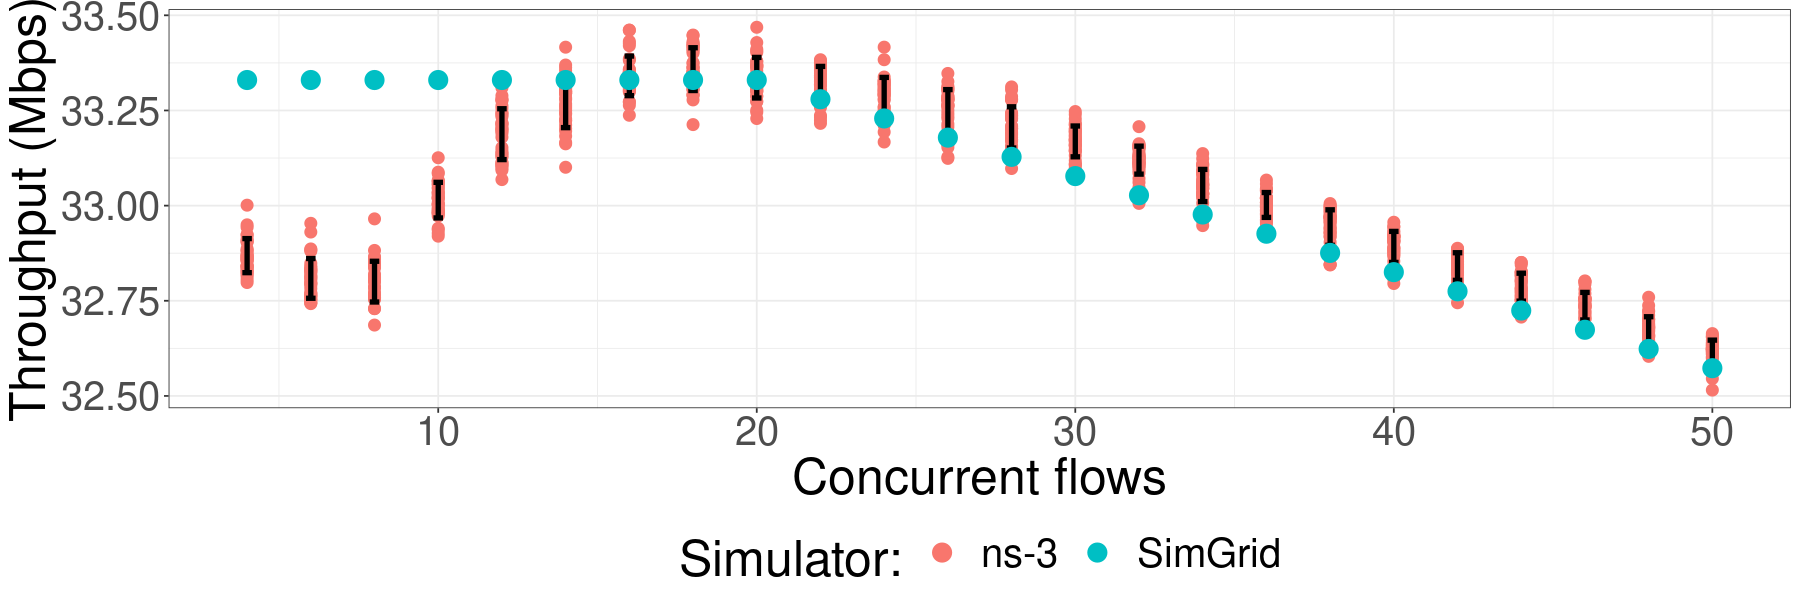

In [247]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652823837/results_1652823837_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
d <- d %>% filter(nSTA>2)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")%>% mutate(sizeClean=2*(dataReceived*8/simTime)/1e+6)

df2 <- data_summary(dns, varname="sizeClean", groupnames=c("simulator","nbFlows")) # standard deviation for errorbar

dsg <- as_tibble(read.csv("logs/1652965946/results_local.csv"))%>% mutate(nbFlows=nSTA) %>% mutate(simulatorPP="SimGrid")%>% filter(nSTA>2)

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=3)+ 
  geom_errorbar(data=df2, aes(x=nbFlows, ymin=sizeClean-sd, ymax=sizeClean+sd), position=position_dodge(.9), size=1.5, width=.3)+

  geom_point(data = dsg, aes(x=nbFlows, y=2*(dataReceived*8/140)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=5)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)
ggsave("throughput_mcs2.pdf", plot=g1,width=15,height=5)


## MCS3

### 1. Calibration


Call:
lm(formula = 2 * (dataReceived/simTime) ~ nbFlows, data = d_smooth)

Residuals:
     Min       1Q   Median       3Q      Max 
-26987.9  -5261.9    548.3   5035.6  18948.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5678270.49    1391.05  4082.0   <2e-16 ***
nbFlows       -5424.16      37.57  -144.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7439 on 523 degrees of freedom
Multiple R-squared:  0.9755,	Adjusted R-squared:  0.9755 
F-statistic: 2.084e+04 on 1 and 523 DF,  p-value: < 2.2e-16


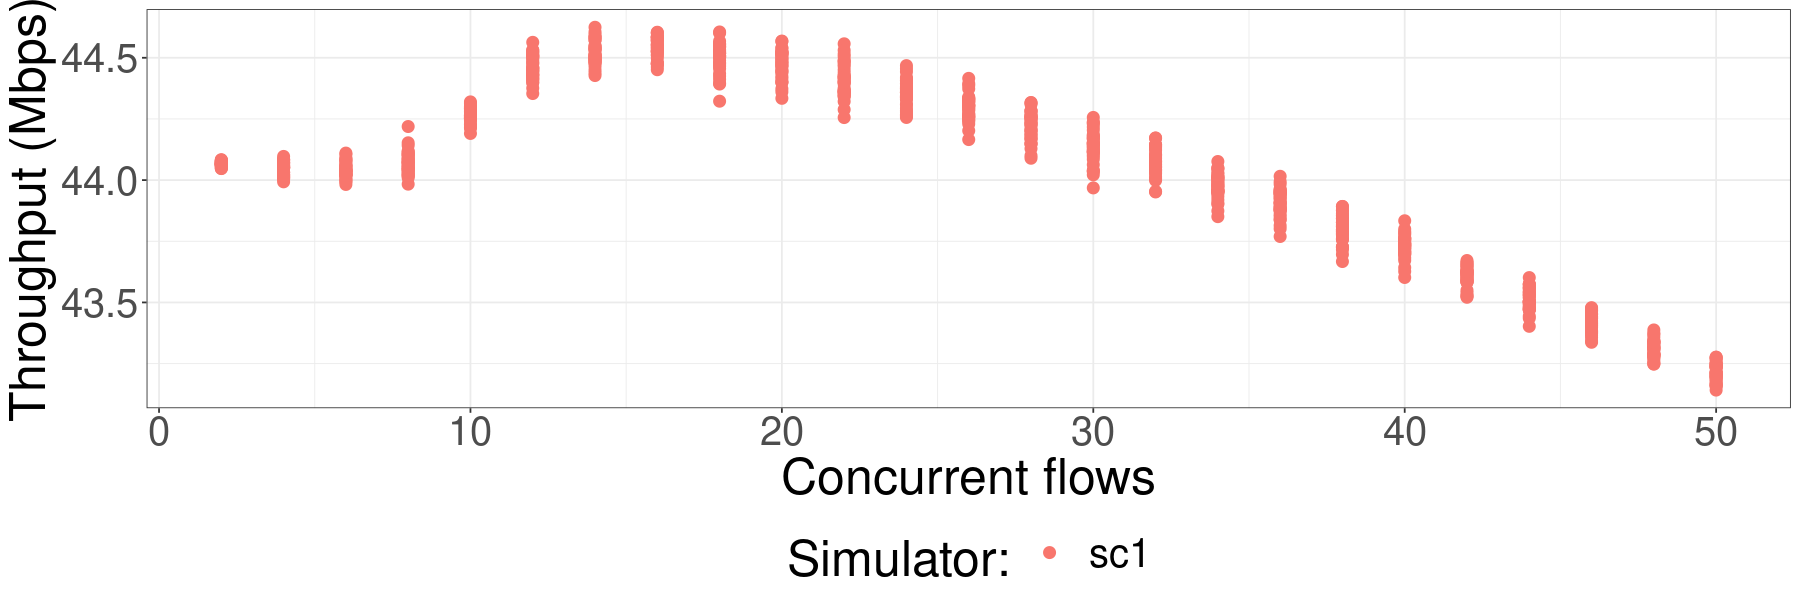

In [228]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652807174/results_1652807174_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")


#head(d)

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=factor(interaction("sc1"))),size=3)+ 
#  geom_point(data = dsg, aes(x=nbFlows, y=2*(dataReceived*8/140)/1e+6, group=interaction(seed,simulator),colour=factor(interaction("sc1sg"))),size=5)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)

d_smooth <- dns %>% filter(nbFlows>20)
calibrationRegression = lm(2*(dataReceived/simTime) ~ nbFlows, data=d_smooth)
summary(calibrationRegression)

### 2. Comparison

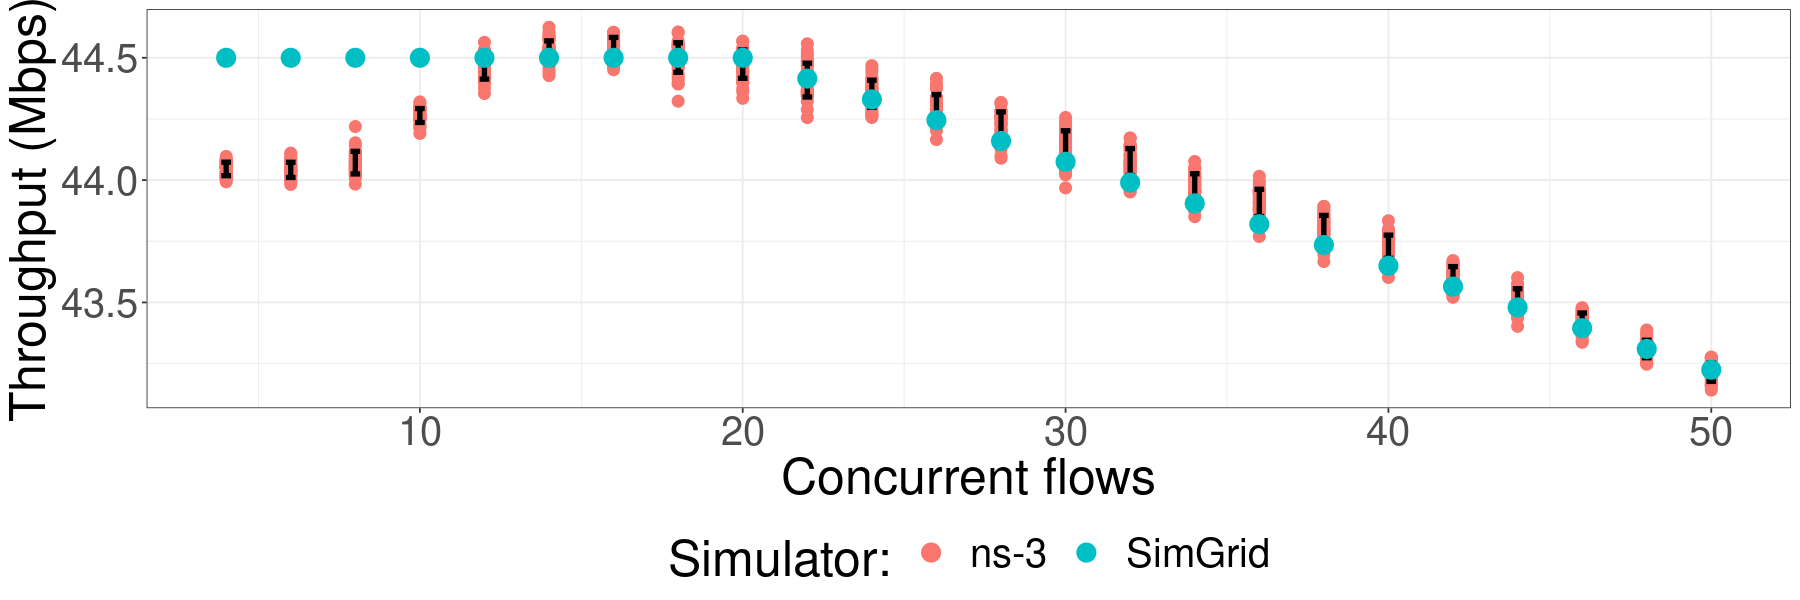

In [248]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652807174/results_1652807174_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
d <- d %>% filter(nSTA>2)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3") %>% mutate(sizeClean=2*(dataReceived*8/simTime)/1e+6)

#head(d)
dsg <- as_tibble(read.csv("logs/1652965868/results_local.csv"))%>% mutate(nbFlows=nSTA) %>% mutate(simulatorPP="SimGrid")%>% filter(nSTA>2)



df2 <- data_summary(dns, varname="sizeClean", groupnames=c("simulator","nbFlows")) # standard deviation for errorbar

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=3)+ 
  geom_errorbar(data=df2, aes(x=nbFlows, ymin=sizeClean-sd, ymax=sizeClean+sd), position=position_dodge(.9), size=1.5, width=.3)+

  geom_point(data = dsg, aes(x=nbFlows, y=2*(dataReceived*8/140)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=5)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)
ggsave("throughput_mcs3.pdf", plot=g1,width=15,height=5)


## MCS4

### 1. Calibration


Call:
lm(formula = 2 * (dataReceived/simTime) ~ nbFlows, data = d_smooth)

Residuals:
   Min     1Q Median     3Q    Max 
-49672  -8742    117   9028  38578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8517520.75    2494.29  3414.8   <2e-16 ***
nbFlows      -12023.17      67.37  -178.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13340 on 523 degrees of freedom
Multiple R-squared:  0.9838,	Adjusted R-squared:  0.9838 
F-statistic: 3.185e+04 on 1 and 523 DF,  p-value: < 2.2e-16


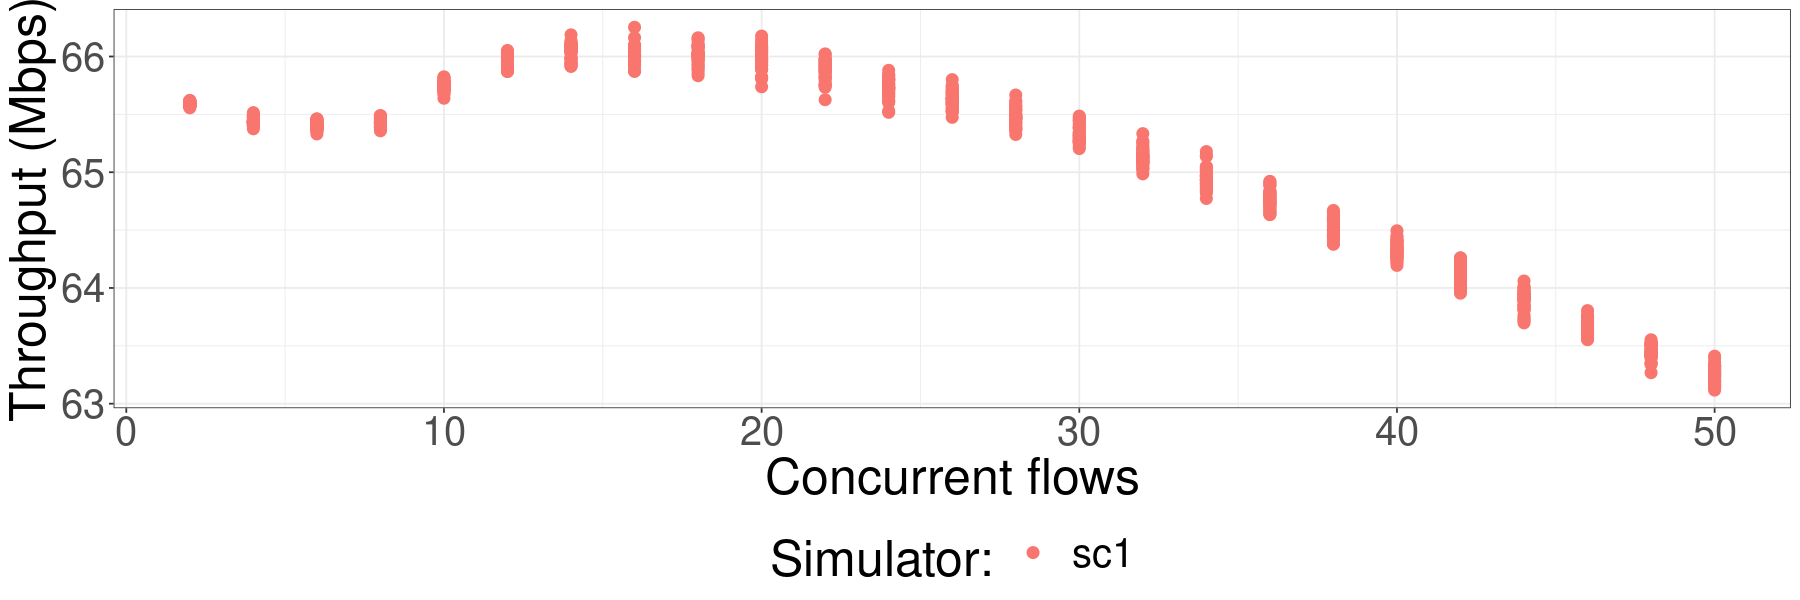

In [231]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652893446/results_1652893446_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=factor(interaction("sc1"))),size=3)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)

d_smooth <- dns %>% filter(nbFlows>20)
calibrationRegression = lm(2*(dataReceived/simTime) ~ nbFlows, data=d_smooth)
summary(calibrationRegression)

### 2. Comparison

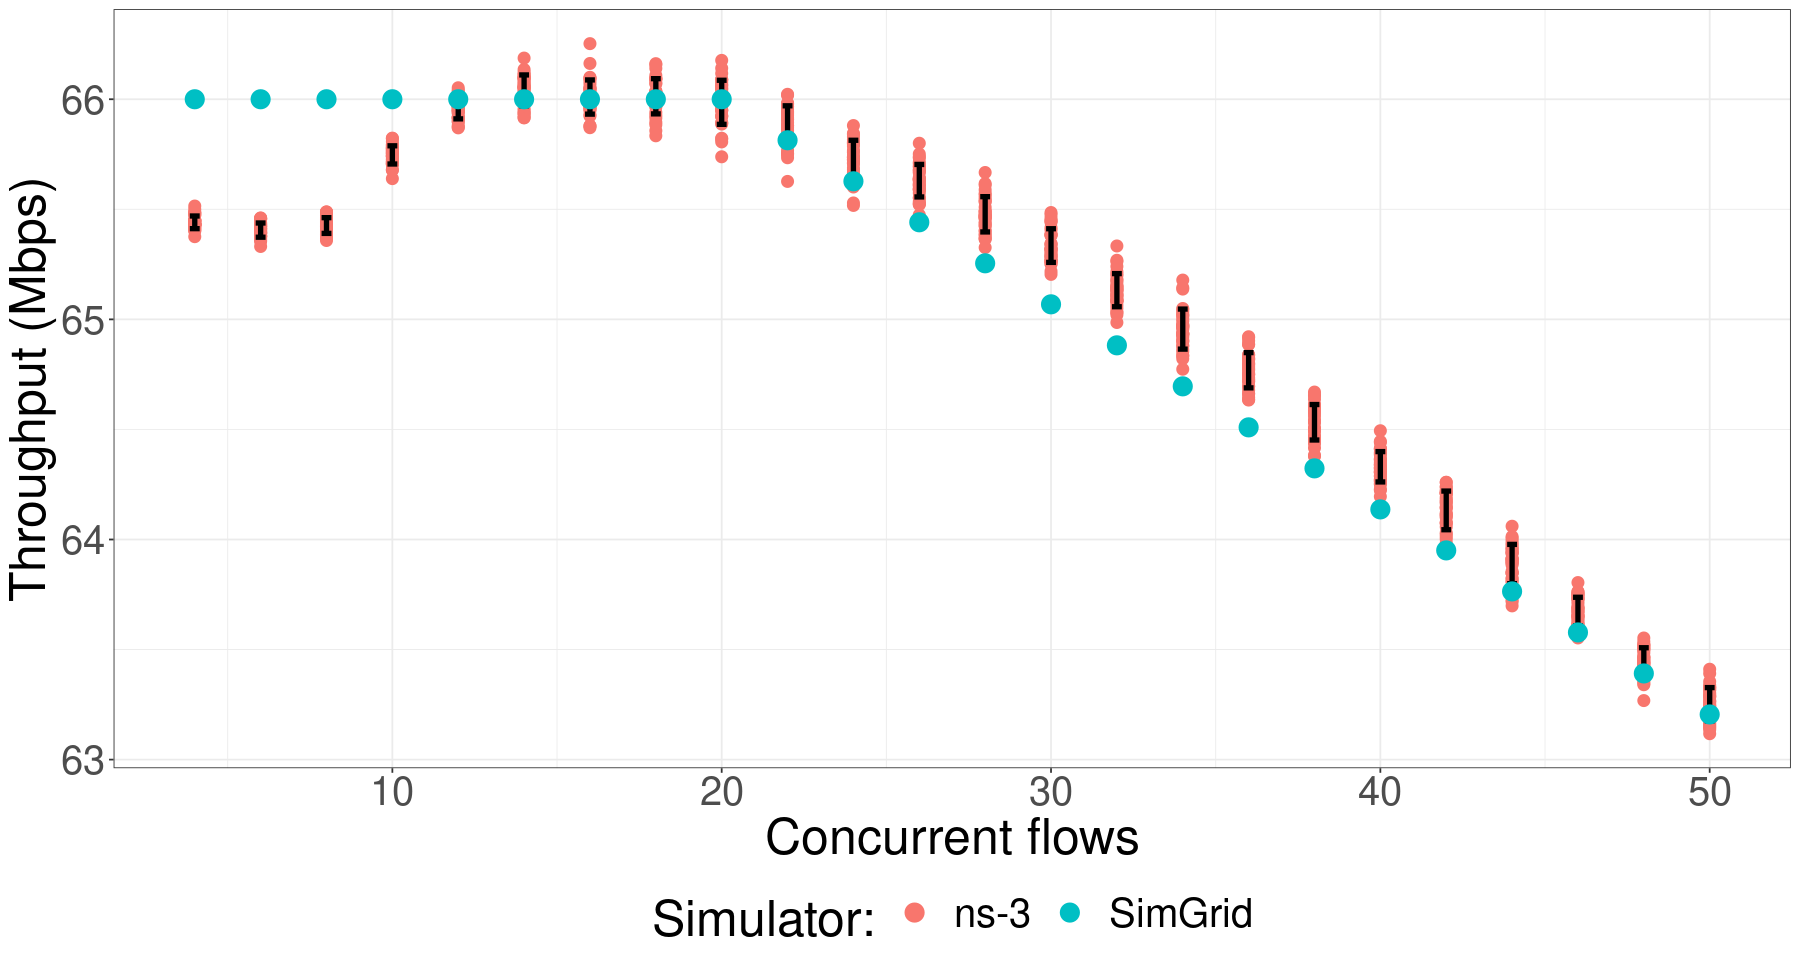

In [336]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652893446/results_1652893446_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
d <- d %>% filter(nSTA>2)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")%>% mutate(sizeClean=2*(dataReceived*8/simTime)/1e+6)

df2 <- data_summary(dns, varname="sizeClean", groupnames=c("simulator","nbFlows")) # standard deviation for errorbar

#head(d)
dsg <- as_tibble(read.csv("logs/1652966209/results_local.csv"))%>% mutate(nbFlows=nSTA) %>% mutate(simulatorPP="SimGrid")%>% filter(nSTA>2)

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=3)+ 
  geom_errorbar(data=df2, aes(x=nbFlows, ymin=sizeClean-sd, ymax=sizeClean+sd), position=position_dodge(.9), size=1.5, width=.3)+

  geom_point(data = dsg, aes(x=nbFlows, y=2*(dataReceived*8/140)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=5)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)
ggsave("throughput_mcs4.pdf", plot=g1,width=15,height=5)


# MCS 5

### Calibration


Call:
lm(formula = 2 * (dataReceived/simTime) ~ nbFlows, data = d_smooth)

Residuals:
   Min     1Q Median     3Q    Max 
-72305 -12214    443  13285  55548 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.120e+07  3.650e+03  3067.9   <2e-16 ***
nbFlows     -1.792e+04  9.859e+01  -181.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19520 on 523 degrees of freedom
Multiple R-squared:  0.9844,	Adjusted R-squared:  0.9844 
F-statistic: 3.303e+04 on 1 and 523 DF,  p-value: < 2.2e-16


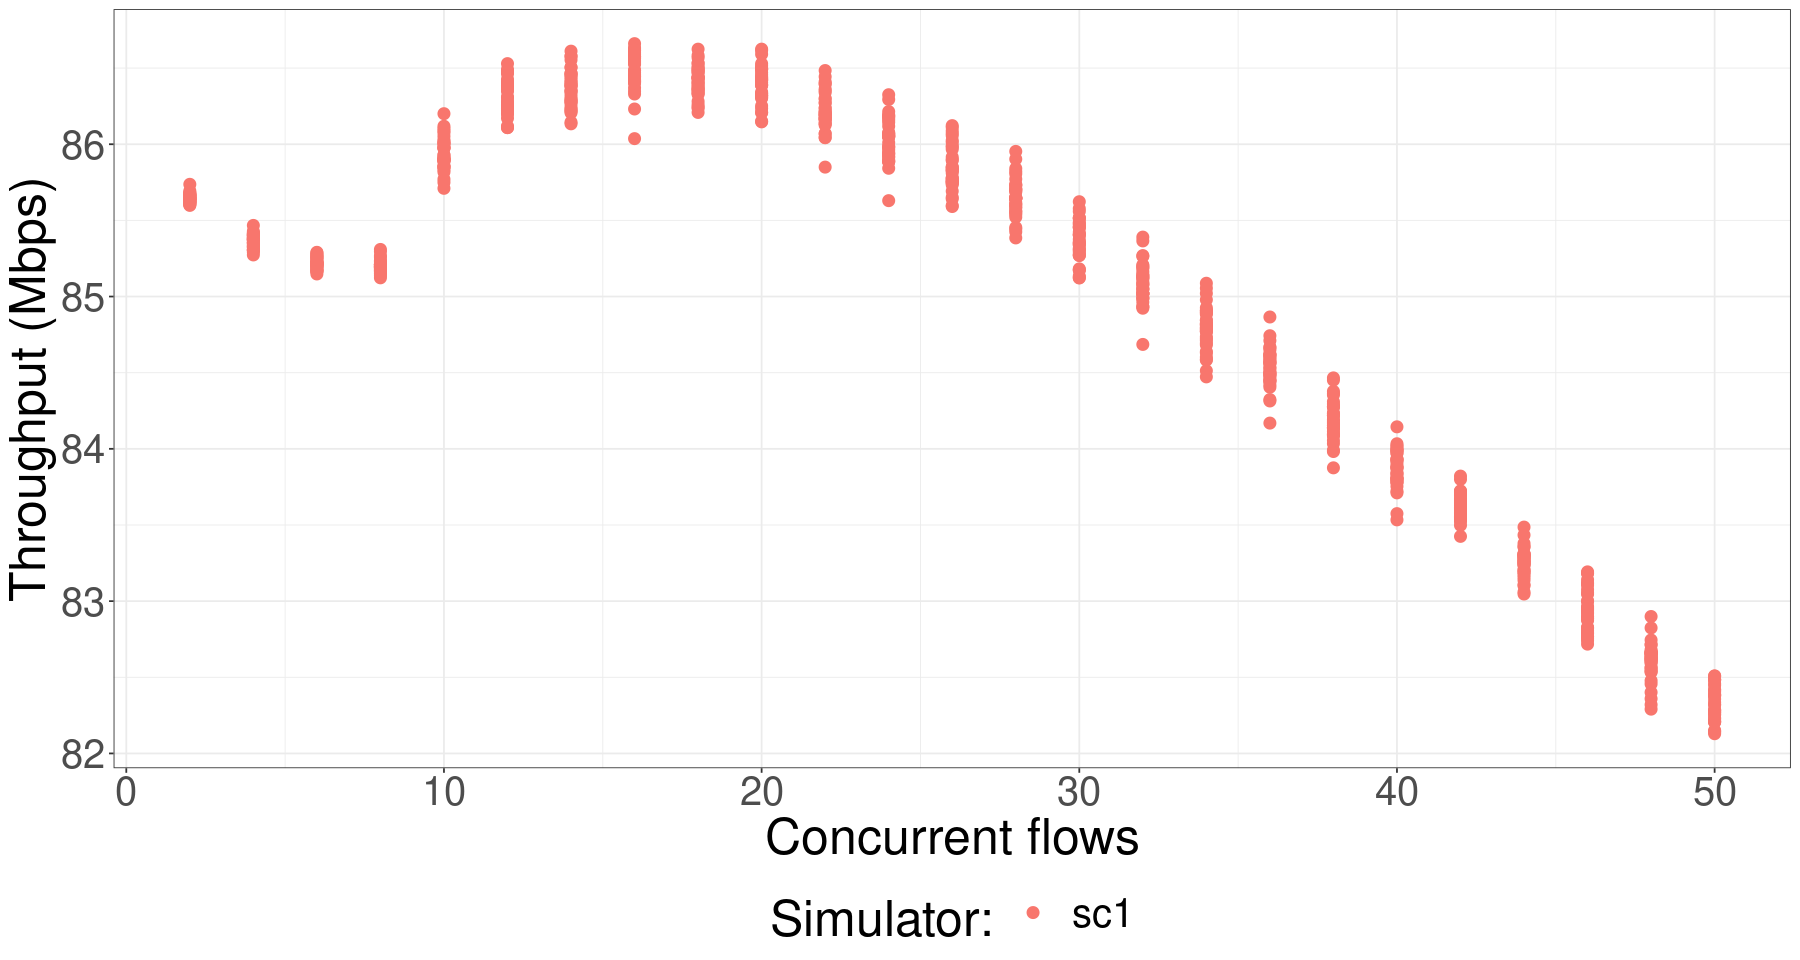

In [334]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652980852/results_1652980852_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=factor(interaction("sc1"))),size=3)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)

d_smooth <- dns %>% filter(nbFlows>20)
calibrationRegression = lm(2*(dataReceived/simTime) ~ nbFlows, data=d_smooth)
summary(calibrationRegression)

### Comparison

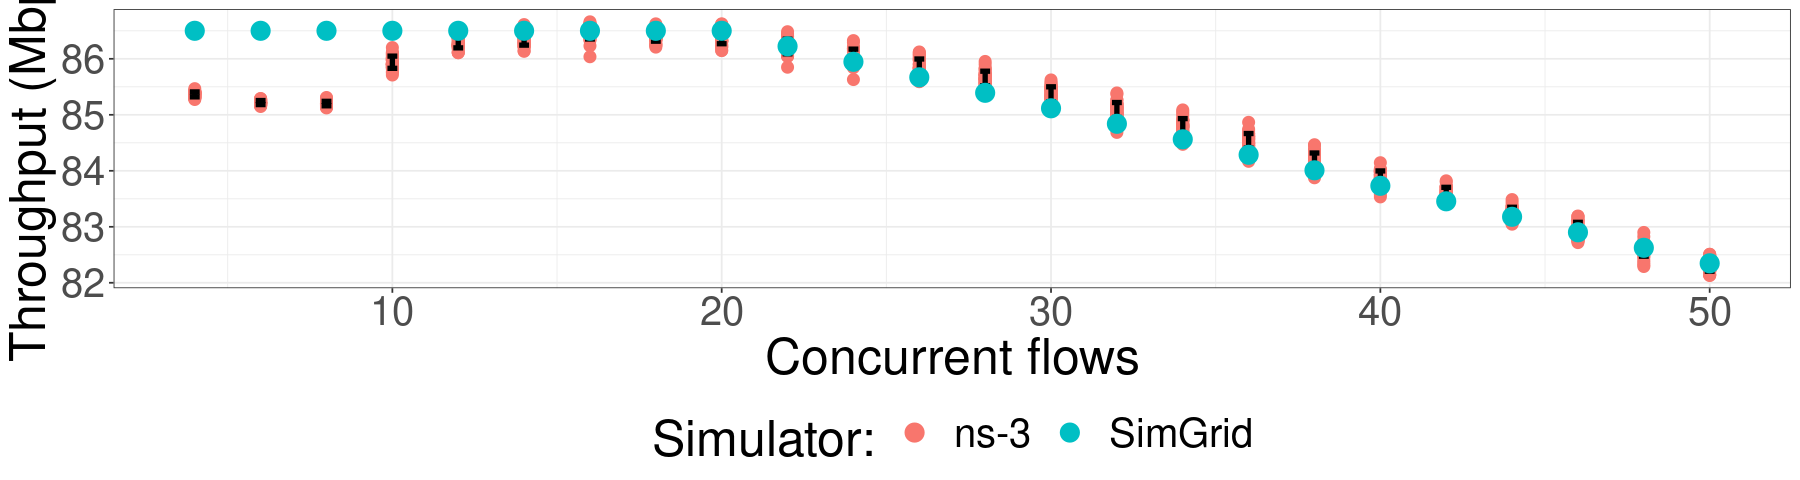

In [21]:
# set the directory according to the position of your run folder
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/")

d <- as_tibble(read.csv("logs/1652980852/results_1652980852_DEFAULT.csv"))
d <- d %>% mutate(nbFlows=nSTA)
d <- d %>% filter(nSTA>2)
dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")%>% mutate(sizeClean=2*(dataReceived*8/simTime)/1e+6)

df2 <- data_summary(dns, varname="sizeClean", groupnames=c("simulator","nbFlows")) # standard deviation for errorbar

#head(d)
dsg <- as_tibble(read.csv("logs/1653031802/results_local.csv"))%>% mutate(nbFlows=nSTA) %>% mutate(simulatorPP="SimGrid")%>% filter(nSTA>2)

g1 <- ggplot() +
  geom_point(data = dns, aes(x=nbFlows, y=2*(dataReceived*8/simTime)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=3)+ 
  geom_errorbar(data=df2, aes(x=nbFlows, ymin=sizeClean-sd, ymax=sizeClean+sd), position=position_dodge(.9), size=1.5, width=.3)+

  geom_point(data = dsg, aes(x=nbFlows, y=2*(dataReceived*8/140)/1e+6, group=interaction(seed,simulator),colour=simulatorPP),size=5)+ 
  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Concurrent flows", y = "Throughput (Mbps)", color='Simulator:')
plot(g1)
ggsave("throughput_mcs5.pdf", plot=g1,width=15,height=5)


# 6.1.3: SNR

 ./simNS --simulationTime=5 --scenario=2 --channelBonding=0 --step=.2

dist1 dist2 simulator simTime throughput1 bytesSent1 throughput2 bytesSent2
1 1     50.0  SG        5       1e+07       6250000    1e+07       6250000   
2 1     50.1  SG        5       1e+07       6250000    1e+07       6250000   
3 1     50.2  SG        5       1e+07       6250000    1e+07       6250000   
4 1     50.3  SG        5       1e+07       6250000    1e+07       6250000   
5 1     50.4  SG        5       1e+07       6250000    1e+07       6250000   
6 1     50.5  SG        5       1e+07       6250000    1e+07       6250000

dist1 dist2 simulator seed simTime throughput1 bytesSent1 throughput2
1 50    50.0  NS        1    5        9664920    6040576    10077000   
2 50    50.2  NS        1    5        9384760    5865472    10220300   
3 50    50.4  NS        1    5        9663960    6039976     9950820   
4 50    50.6  NS        1    5        9570710    5981696    10231000   
5 50    50.8  NS        1    5       10227700    6392320     9415740   
6 50    51.0  NS        1    5       12348500    7717800     7334300   
  bytesSent2 throughput3 bytesSent3
1 6298110    0           0         
2 6387710    0           0         
3 6219260    0           0         
4 6394370    0           0         
5 5884840    0           0         
6 4583940    0           0

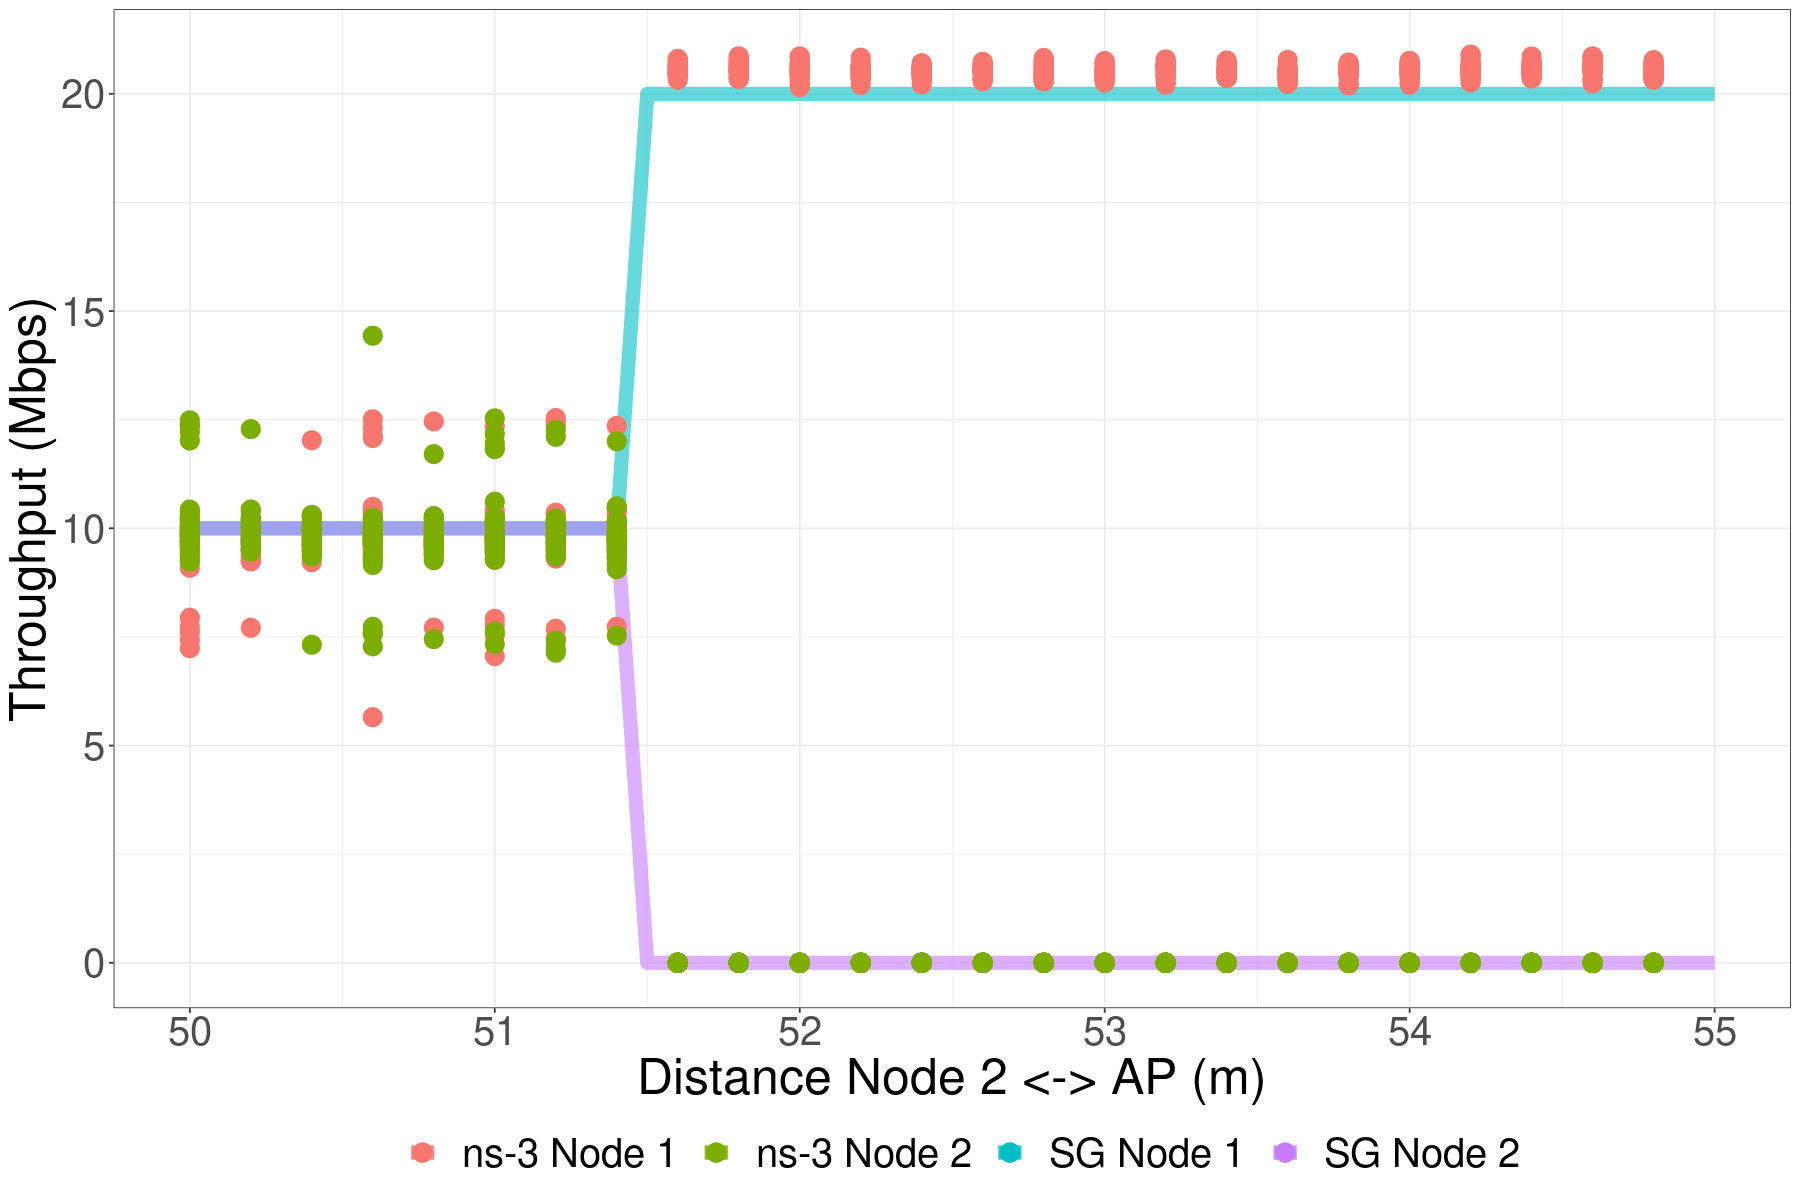

In [26]:
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/snrExperiment/")


dsg <- as_tibble(read.csv("logs/1653292382/results2.csv")) #%>% filter(dist2>50) %>% filter(dist2<55)
head(dsg) 
dns <- as_tibble(read.csv("results_ns3.csv"))
head(dns)
#dist1F <- 50

dnsF <- dns #%>% filter(dist1 == dist1F)


options(repr.plot.width=15, repr.plot.height=10)
gc <- ggplot() +
  #geom_line(data=dsg, aes(x=dist2, y=(throughput1+throughput2)/1e+6, color="SG12"), alpha=.5, size=2)+
  geom_line(data=dsg, aes(x=dist2, y=(throughput1)/1e+6, color="SG Node 1"), alpha=.6, size=4)+
  geom_line(data=dsg, aes(x=dist2, y=(throughput2)/1e+6, color="SG Node 2"), alpha=.6, size=4)+

  #geom_point(data=dnsF, aes(x=dist2, y=(throughput1+throughput2)/1e+6, group=interaction(seed),color="ns Overall"), size=5)+
  #geom_line(data=dnsF, aes(x=dist2, y=throughput1+throughput2, group=interaction(seed),color="a"), size=1)+
  geom_point(data=dnsF, aes(x=dist2, y=throughput1/1e+6, group=interaction(seed),color="ns-3 Node 1"), size=5)+
  #geom_line(data=dnsF, aes(x=dist2, y=throughput1, group=interaction(seed),color="b"), size=1)+
  geom_point(data=dnsF, aes(x=dist2, y=throughput2/1e+6, group=interaction(seed),color="ns-3 Node 2"), size=5)+
  #geom_line(data=dnsF, aes(x=dist2, y=throughput2, group=interaction(seed),color="c"), size=1)+

  theme_bw()+
  labs(y= "Throughput (Mbps)", x = "Distance Node 2 <-> AP (m)",color="", fill="") +
  theme(text = element_text(size = 30), legend.position = "bottom")
plot(gc)


ggsave("benchmark_snr.pdf", plot=gc,width=15,height=5)




# Figures use case 6.2

<a id="6.2.1"></a>
## 6.2.1 Overall

All flows start at the same time, and we observe the time to complete all flows in ns-3 against SimGrid

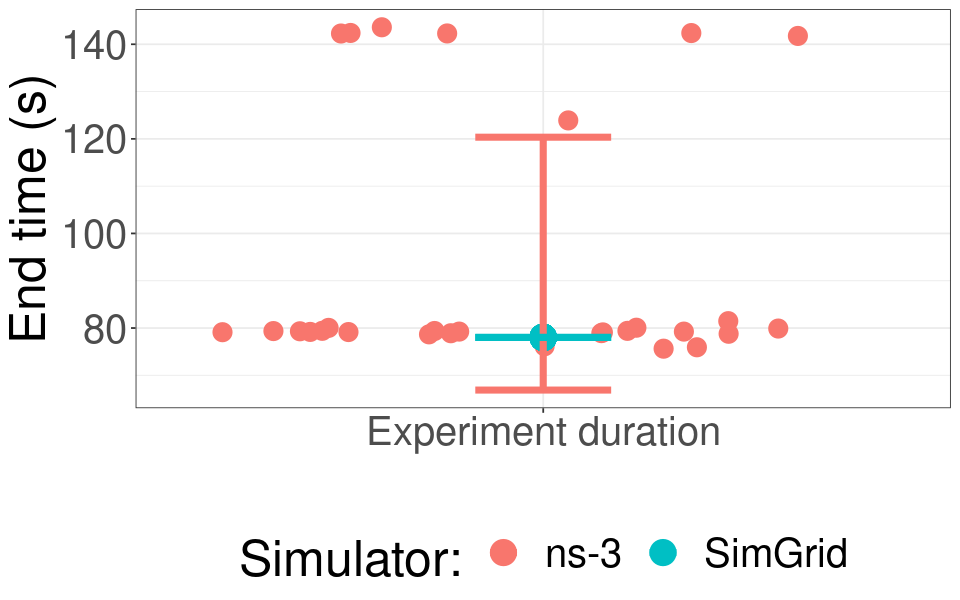

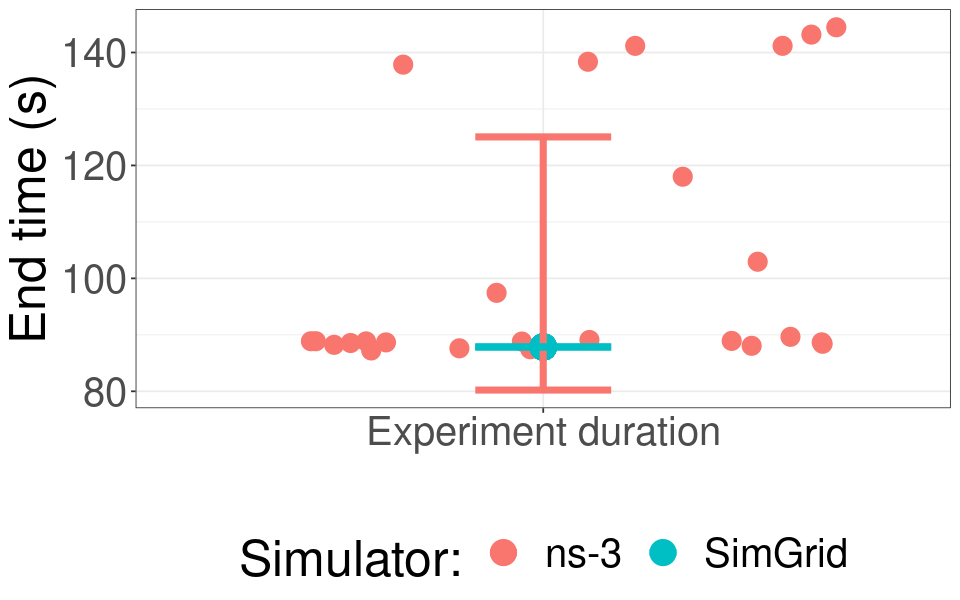

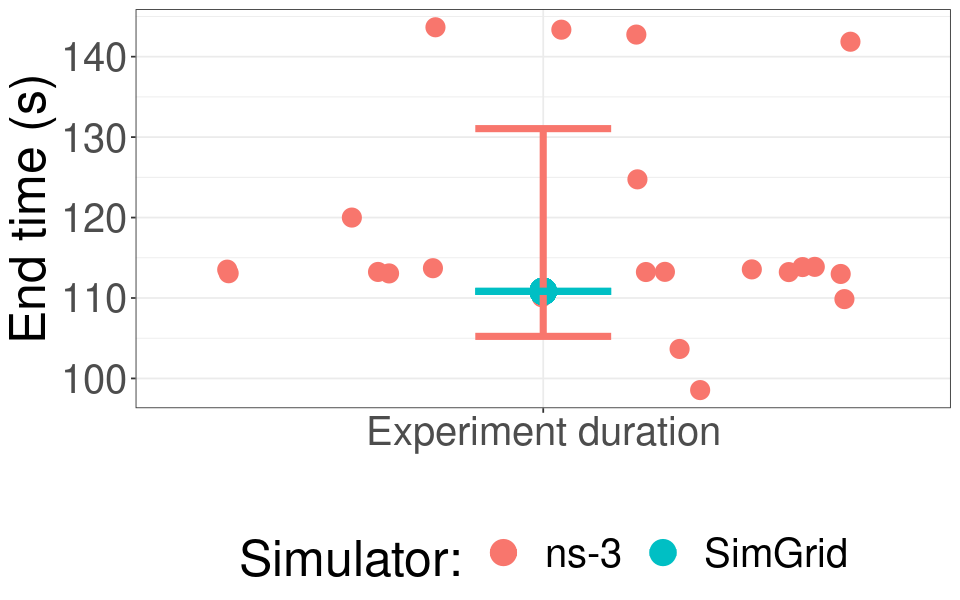

In [40]:
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/largeExperiment/")
repertory <- "logs/1653066954/"#1653066954/" #1653036438/"
d <- as_tibble(read.csv(paste(repertory,"/results.csv", sep="")))
d <- d %>% filter(nbCells==3) # %>% filter(seedP<=2)
#######

d <- d %>% arrange(nbCells,maxSTAPerCell,seedP,seedNS)
newSeed <- d[1,]$seedP
dTot <- data.frame()


draw_bars <- function(dataset, n) {
    options(repr.plot.width=8, repr.plot.height=5)
    dataset <- dataset %>% filter(end<145)
    datasetns <- dataset %>% filter(simulator=="ns3")%>% mutate(simPP="ns-3")
    datasetsg <- dataset %>% filter(simulator=="sg")%>% mutate(simPP="SimGrid")
    df2 <- data_summary(datasetns, varname="end", 
                    groupnames=c("simulator"))%>% mutate(simPP="ns-3")
    df2sg <- data_summary(datasetsg, varname="end", 
                groupnames=c("simulator")) %>% mutate(simPP="SimGrid")
    p <- ggplot(df2, aes(x="Experiment duration", y=end, fill=simPP)) + 
      #geom_bar(stat="identity", color="black",  position=position_dodge()) +
      geom_jitter(data=datasetns, aes(x="Experiment duration", y=end, color=simPP),width=.49, size=5)+
      geom_point(data=datasetsg, aes(x="Experiment duration", y=end, color=simPP), size=7)+

      geom_errorbar(data=df2, aes(ymin=end-sd, ymax=end+sd,color=simPP), width=.2, size=2)+
      geom_errorbar(data=df2sg, aes(ymin=end-sd, ymax=end+sd,color=simPP), width=.2, size=2)+

      theme_bw()+
      labs(y= "End time (s)", x = "",color="Simulator:", fill="Simulator:") +
      theme(text = element_text(size = 30), legend.position = "bottom")
      #ggtitle(n)
    plot(p)
    ggsave("gwifi_overall.pdf", plot=p,width=8,height=5)
    
}


for( i in rownames(d) ) {
    if(strtoi(i)%%2==0) next
    if(newSeed!=d[i,]$seedP) {
        draw_bars(dTot, paste("nbCells:",d[i,]$nbCells," seedP:",d[i,]$seedP," minSTAPerCell: ",d[i,]$minSTAPerCell," maxSTAPerCell: ",d[i,]$maxSTAPerCell))
        dTot <- data.frame()
        newSeed <- d[i,]$seedP
        #message(paste("s:",newSeed))
    }
    
    fns <- gsub("sg_platf.xml$","flowData_ns3.csv",d[i,]$platformFileSG)[1]
    fsg <- gsub("sg_platf.xml$","flowData_sg.csv",d[i,]$platformFileSG)[1]

    dfns <- as_tibble(read.csv(paste(repertory,fns,sep=""))) #logs/1646004010/
    dfsg <- as_tibble(read.csv(paste(repertory,fsg,sep=""))) #logs/1646004010/

    #correct this in the launcher
    mSG <- max(dfsg$end)
    dfsg <- dfsg %>% mutate(srcOK=gsub('_', '', src)) %>% filter(end==mSG) %>% mutate(seed=d[i,]$seedNS)
    dfsg <- dfsg %>% mutate(num=gsub('STA_', '', src)) %>% mutate(num=paste(num,'_SG',sep=''))
 
    mNS <- max(dfns$endRx)
    dfns <- dfns %>% filter(src!="OUT") %>% filter(endRx==mNS) %>% mutate(seed=d[i,]$seedNS) %>% mutate(end=endRx)
    dfns <- dfns %>% mutate(num=gsub('STA','',src)) %>% mutate(num=paste(num,'_NS',sep='')) 
    dTot <- dTot  %>% bind_rows(dfns) %>% bind_rows(dfsg)
    
}




<a id="6.2.2"></a>
## 6.2.2

Same as 6.2.1 but this time, we compare single flows.

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

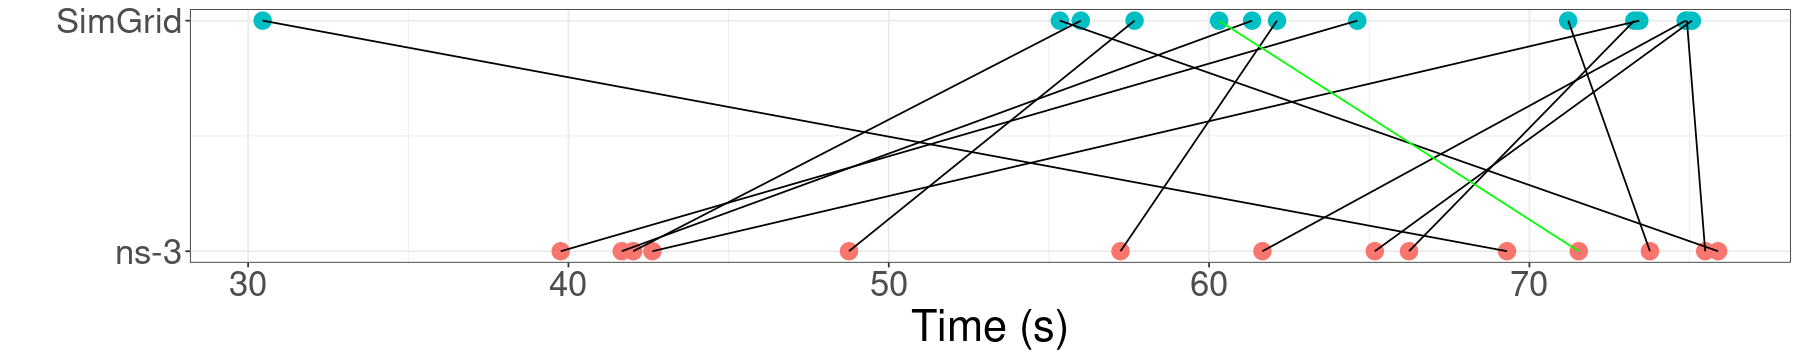

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

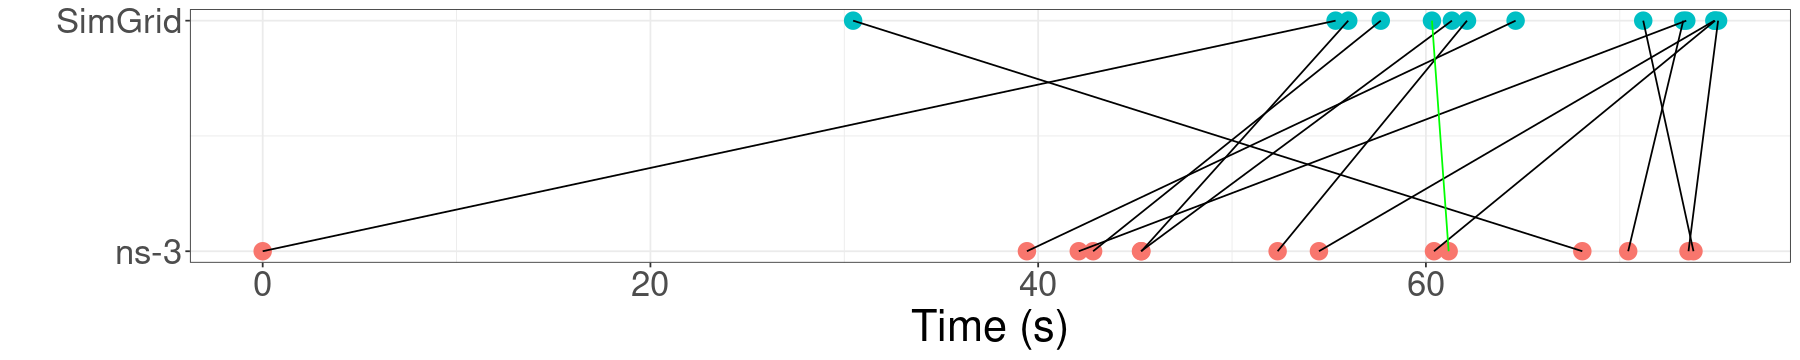

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

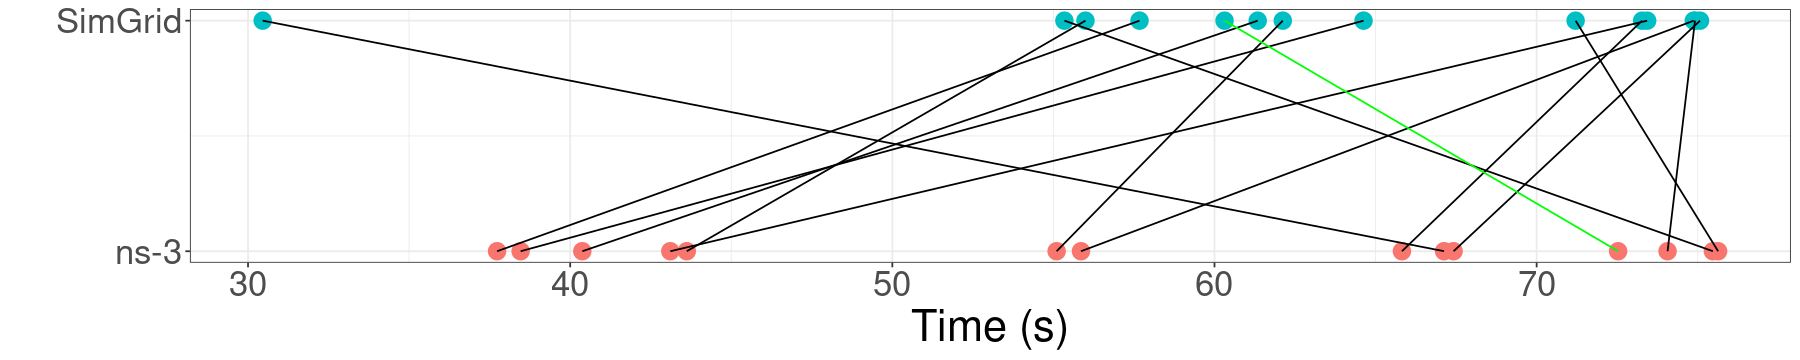

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

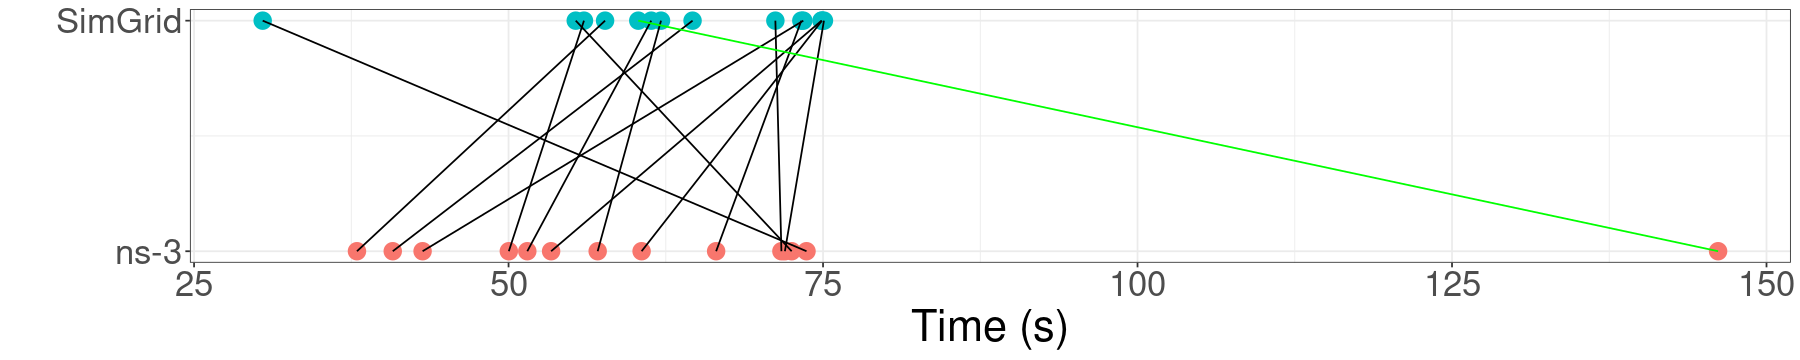

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

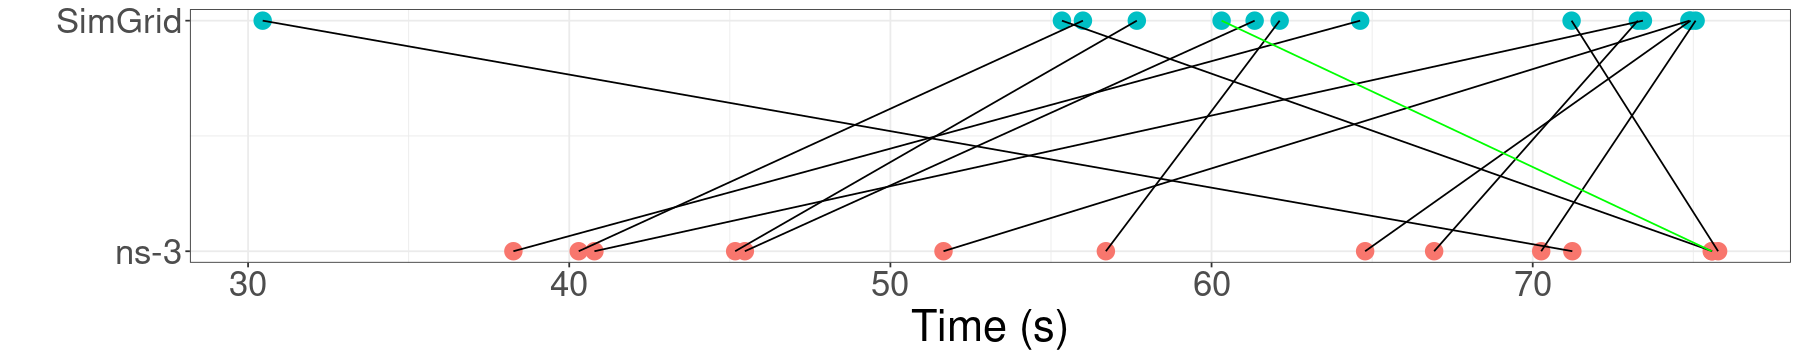

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

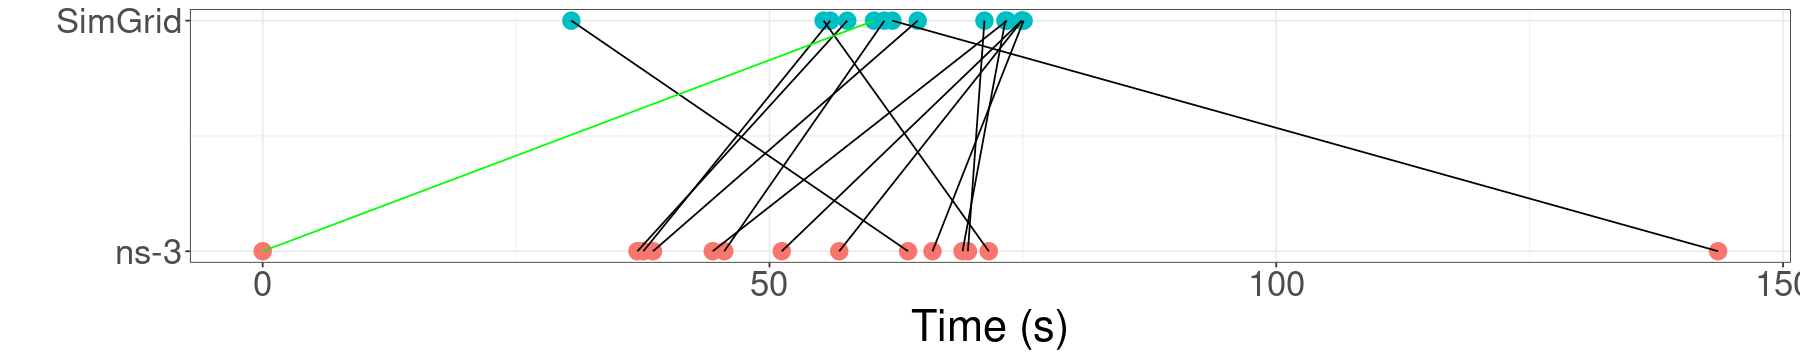

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

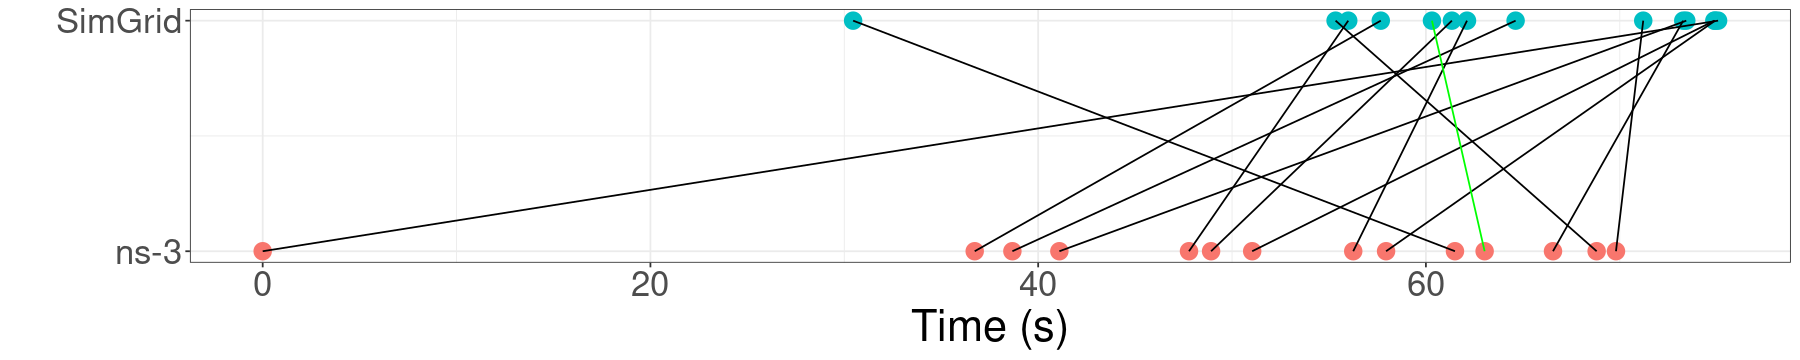

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

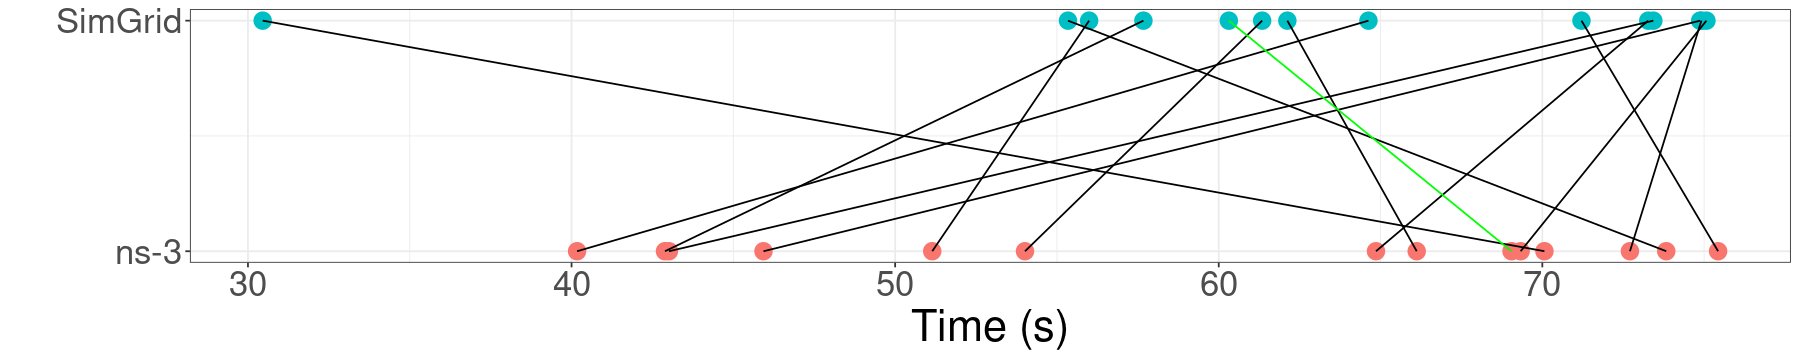

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

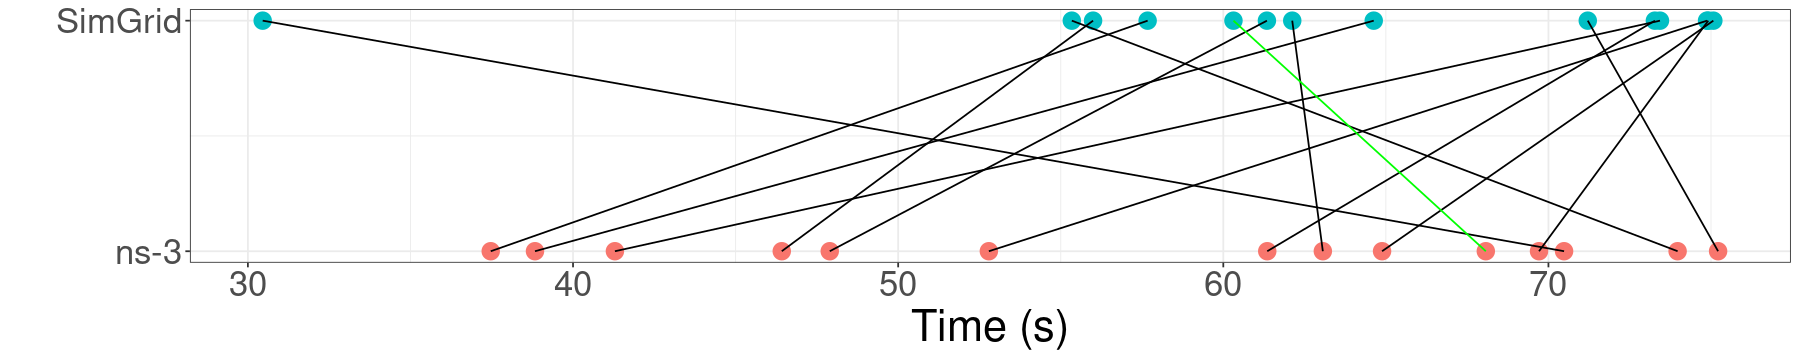

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

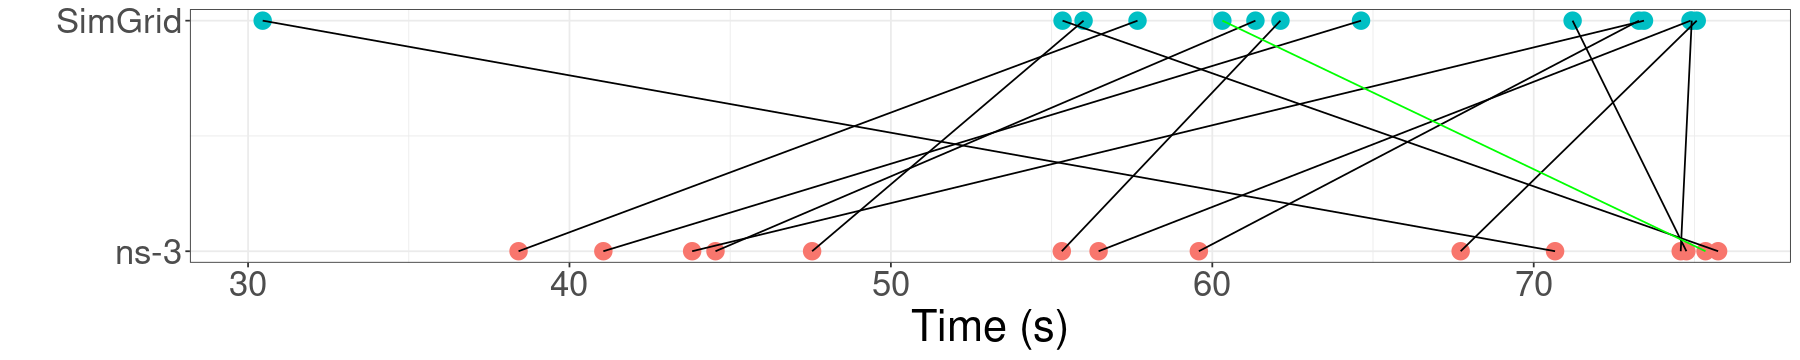

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

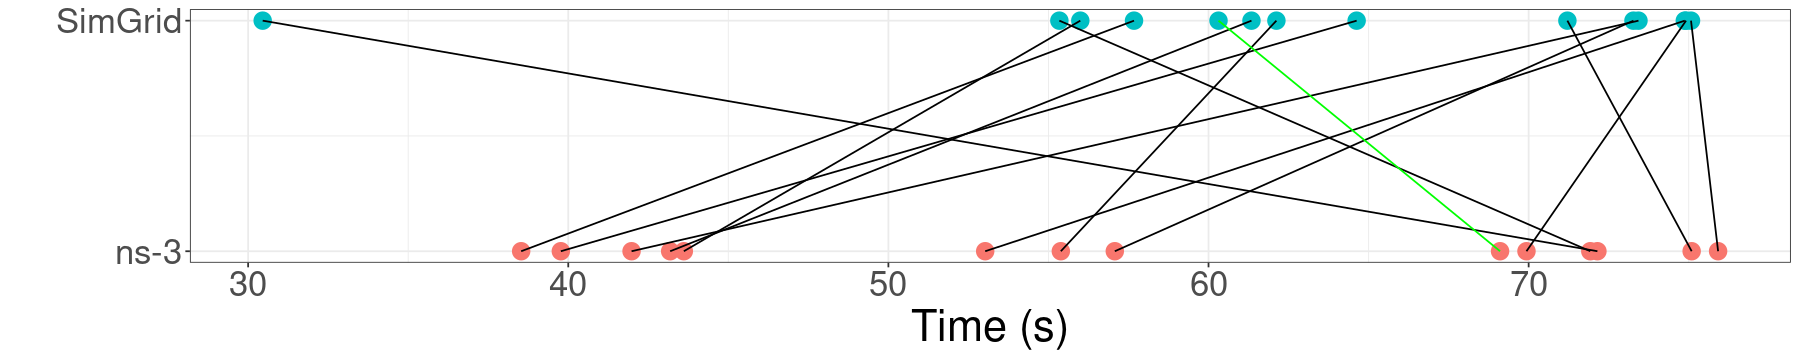

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

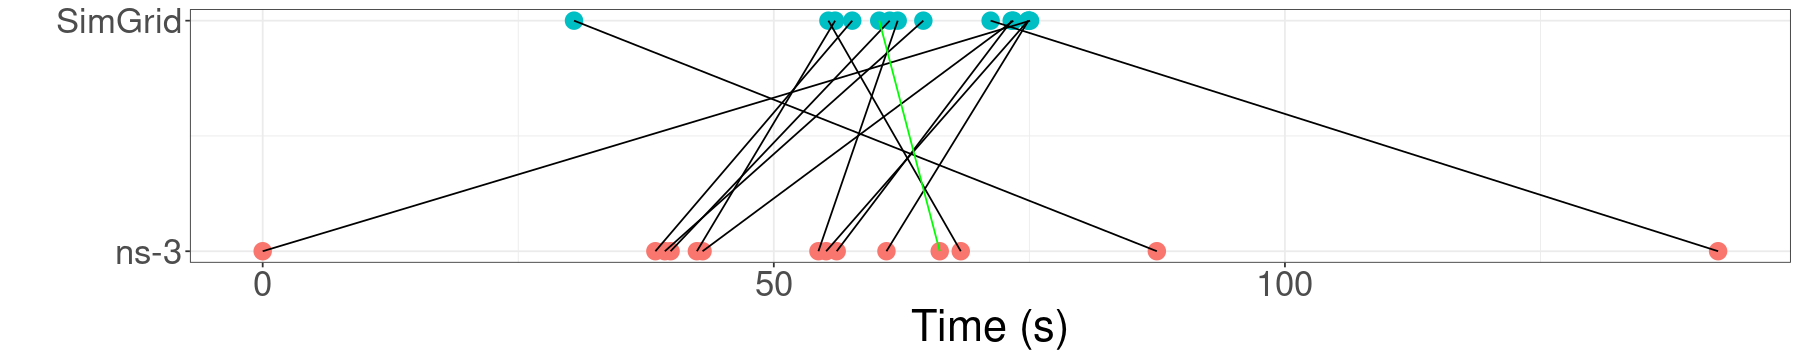

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

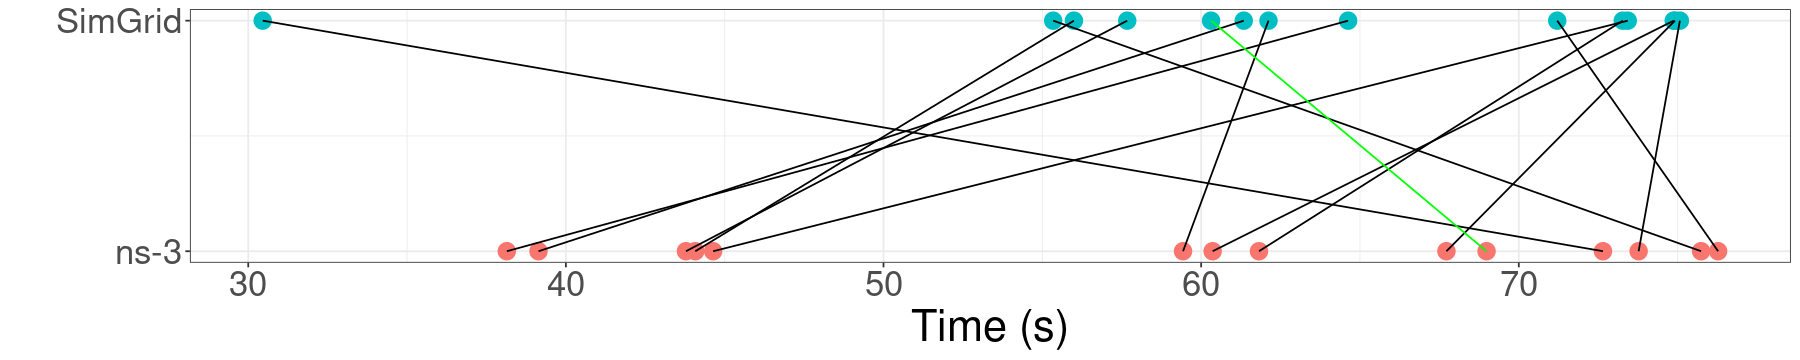

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

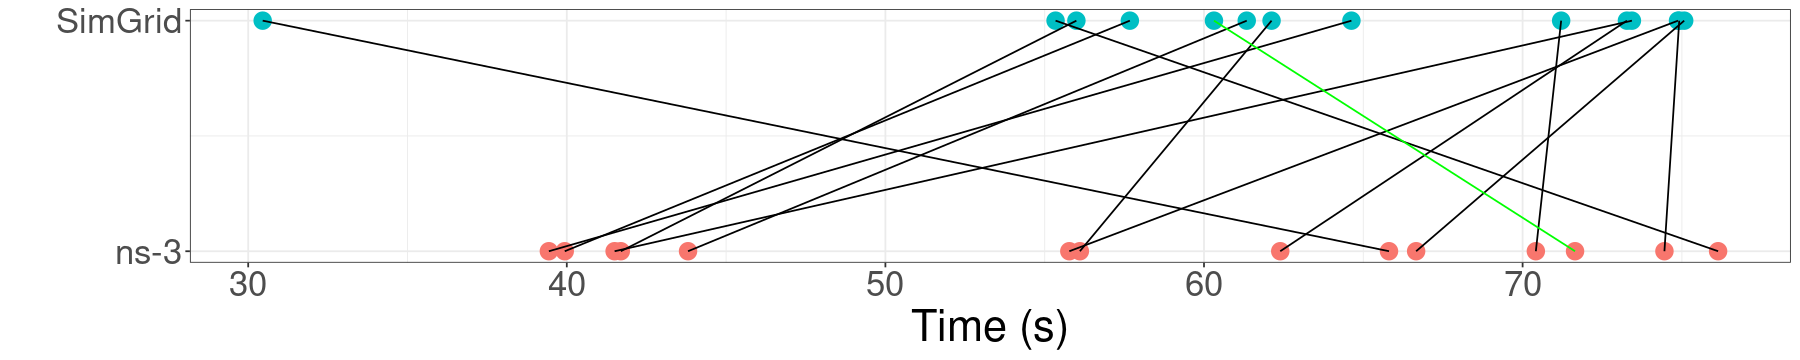

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

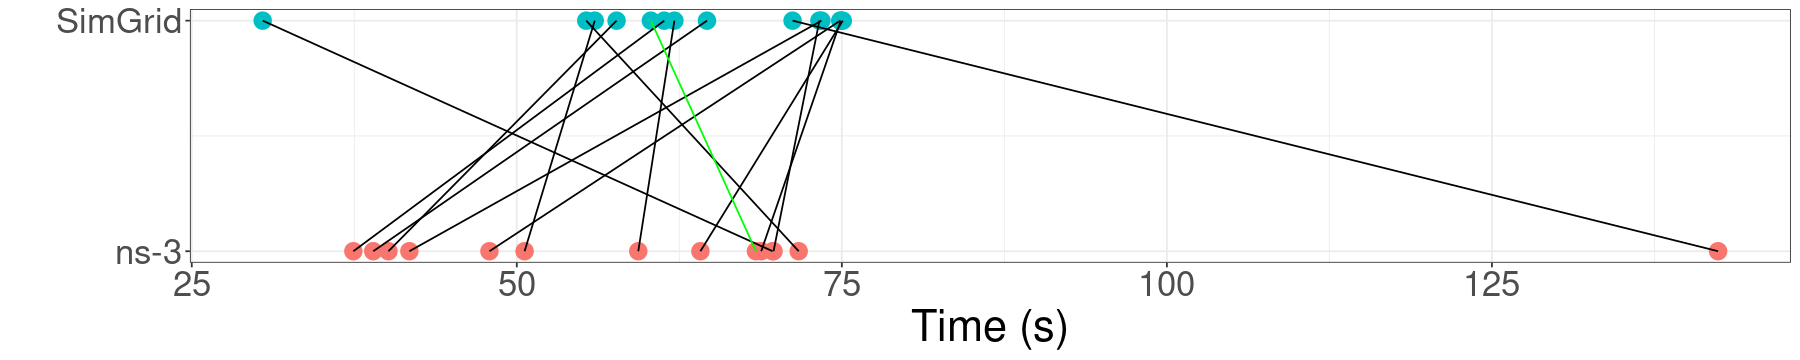

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

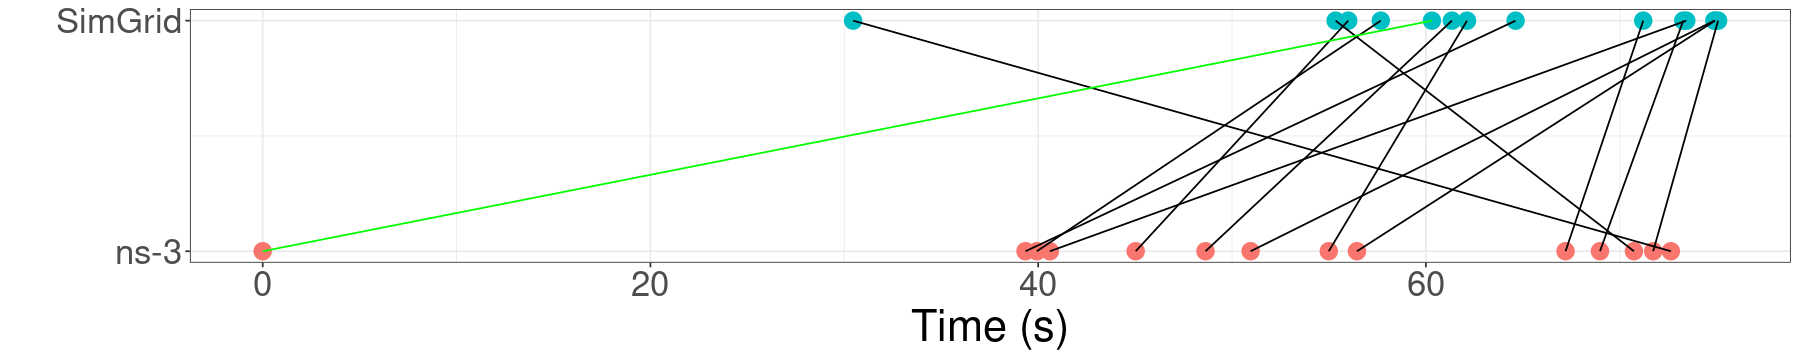

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

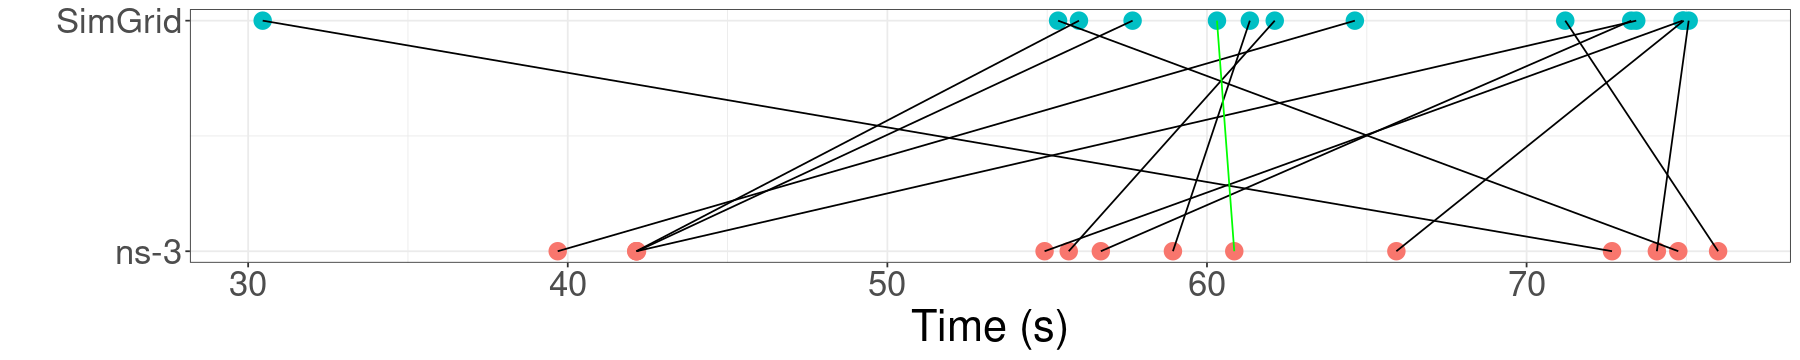

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

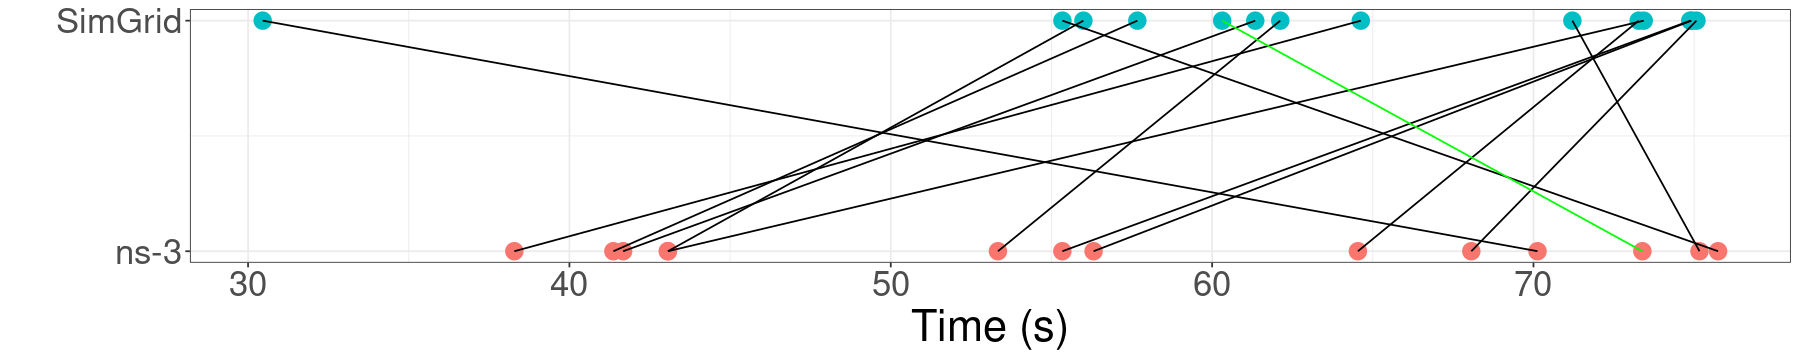

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

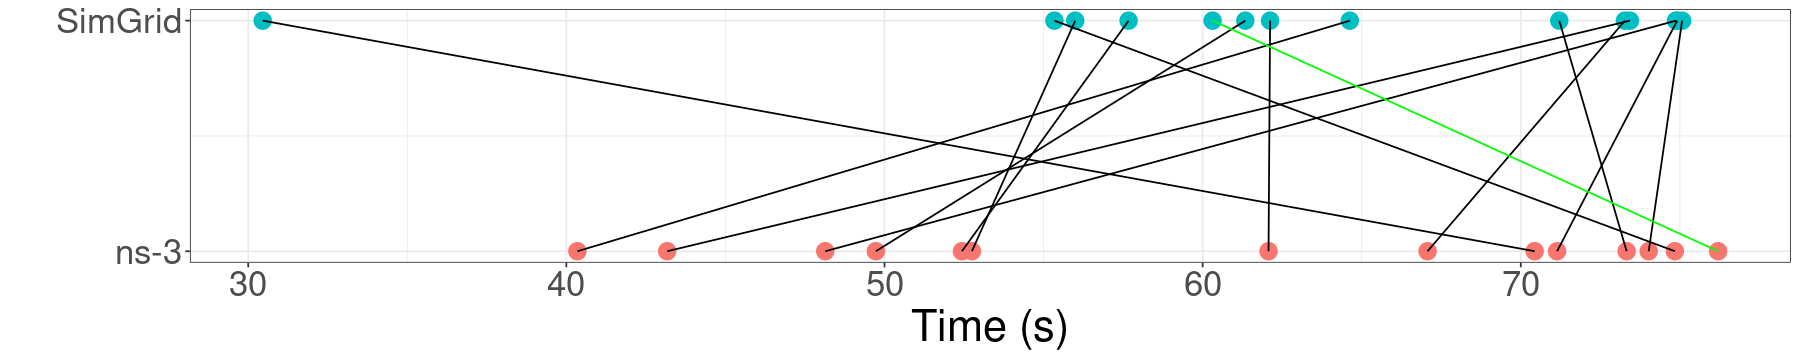

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

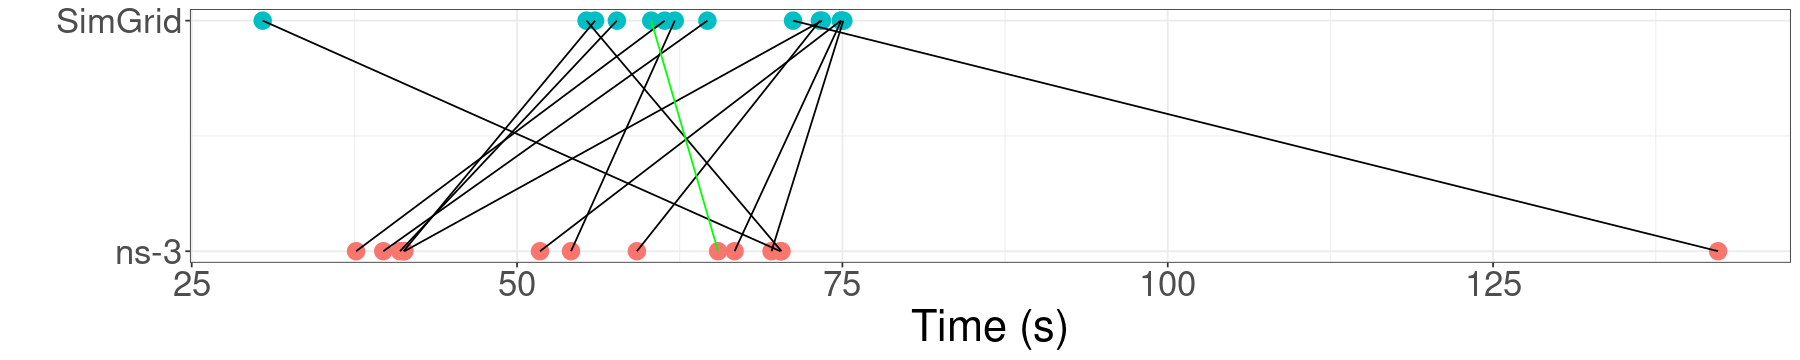

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

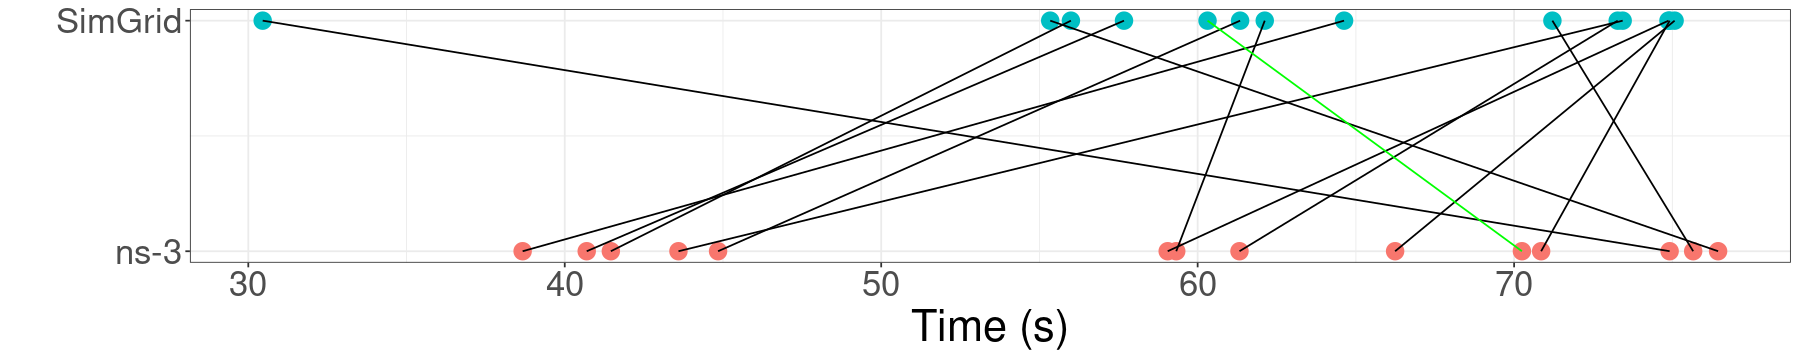

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

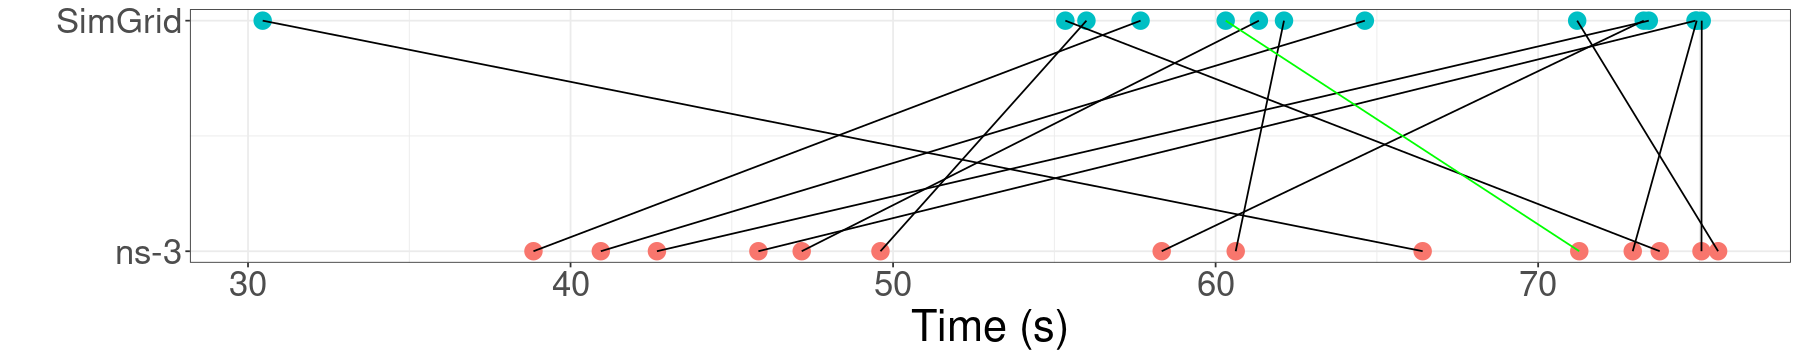

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

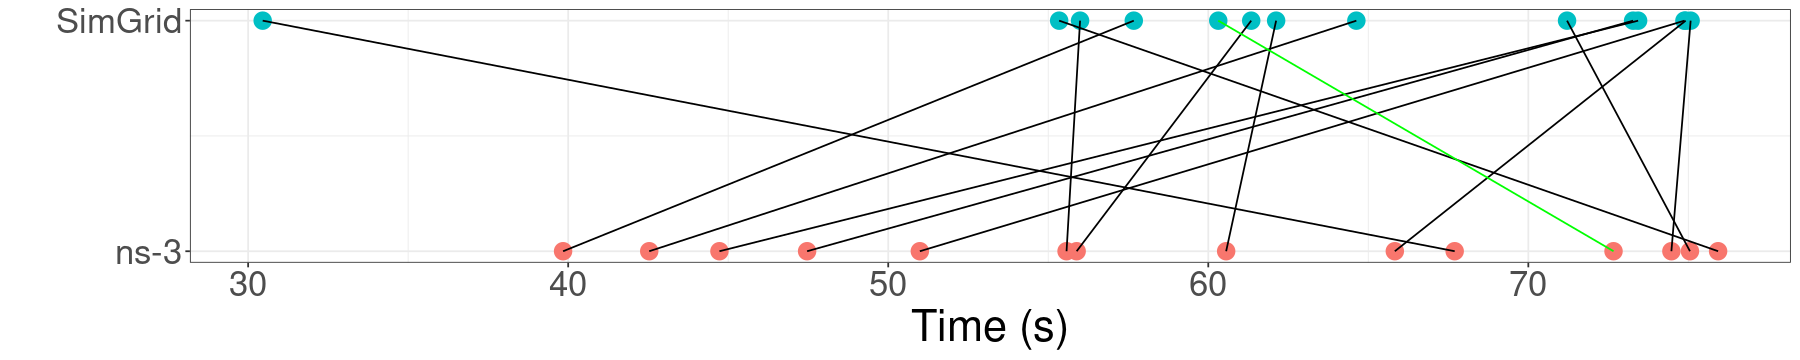

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

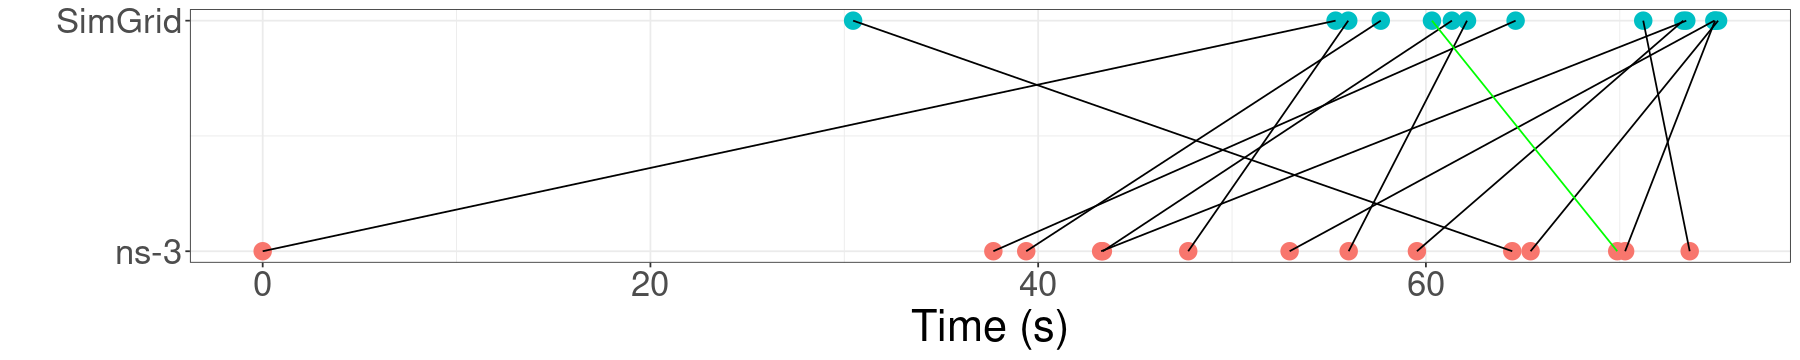

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

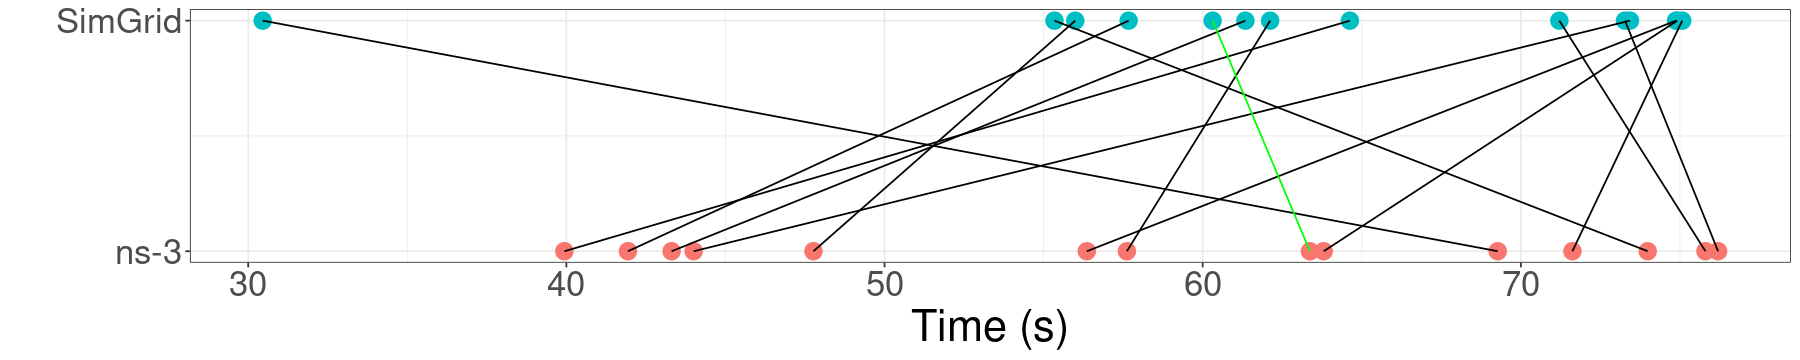

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

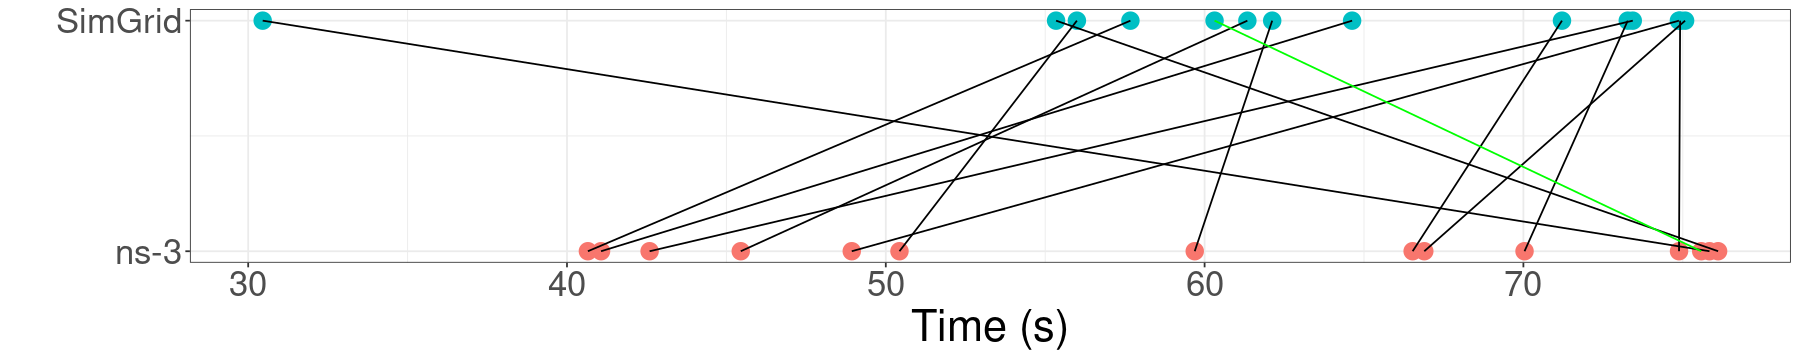

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

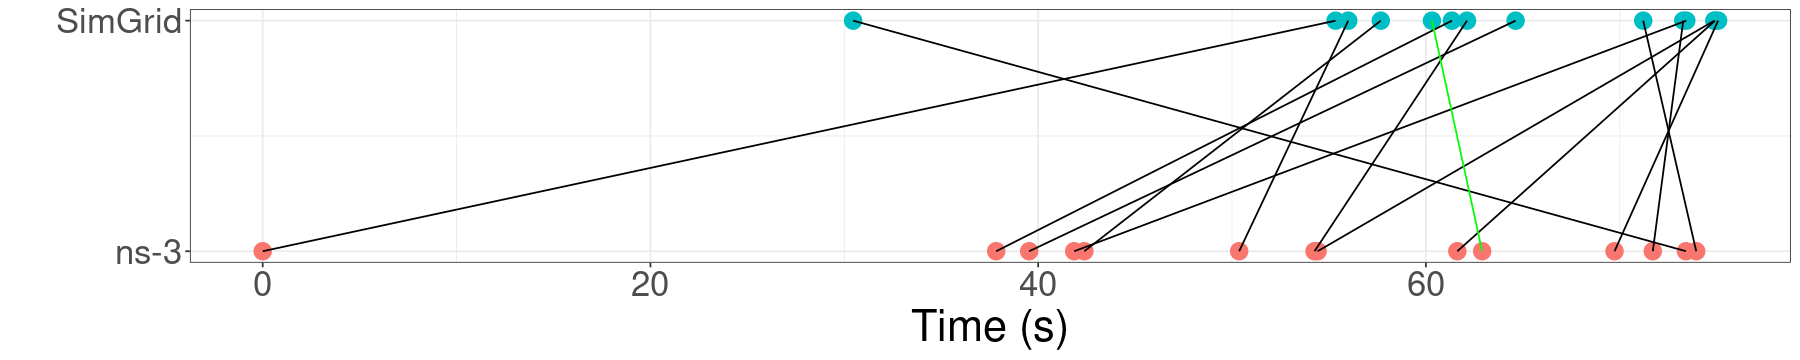

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

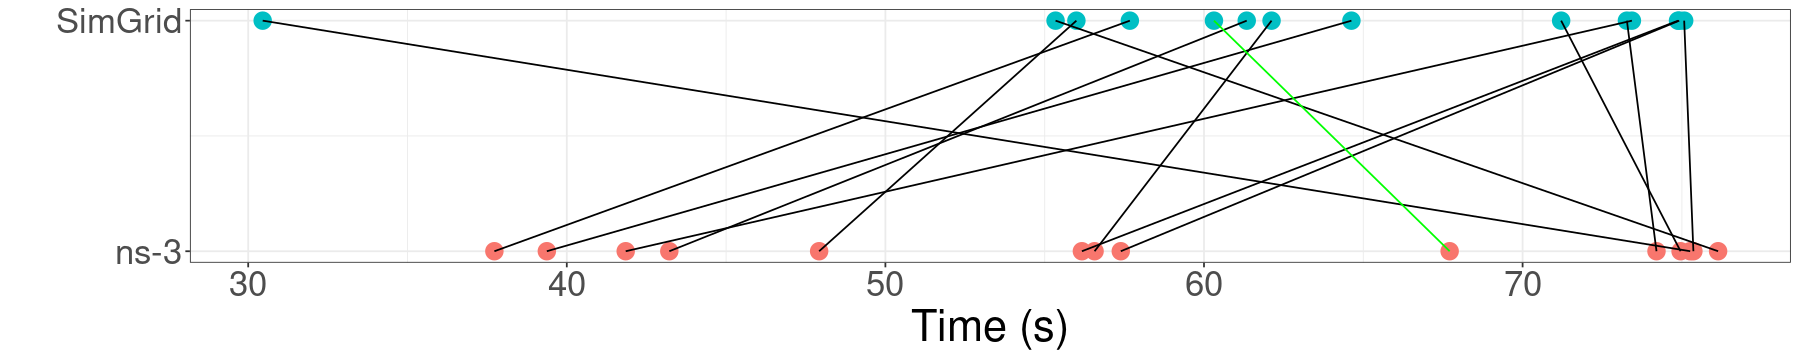

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

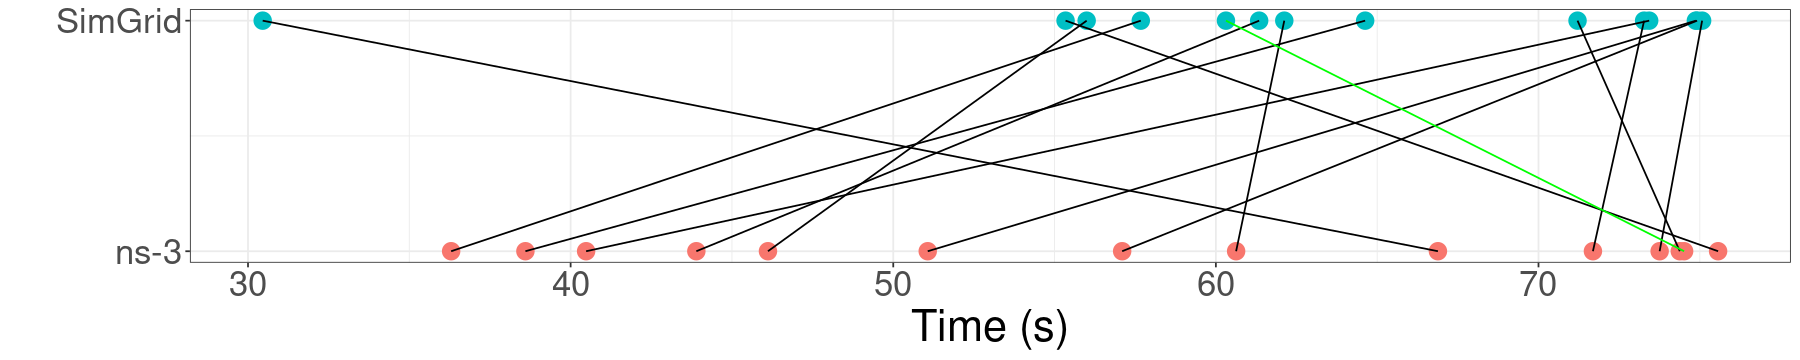

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

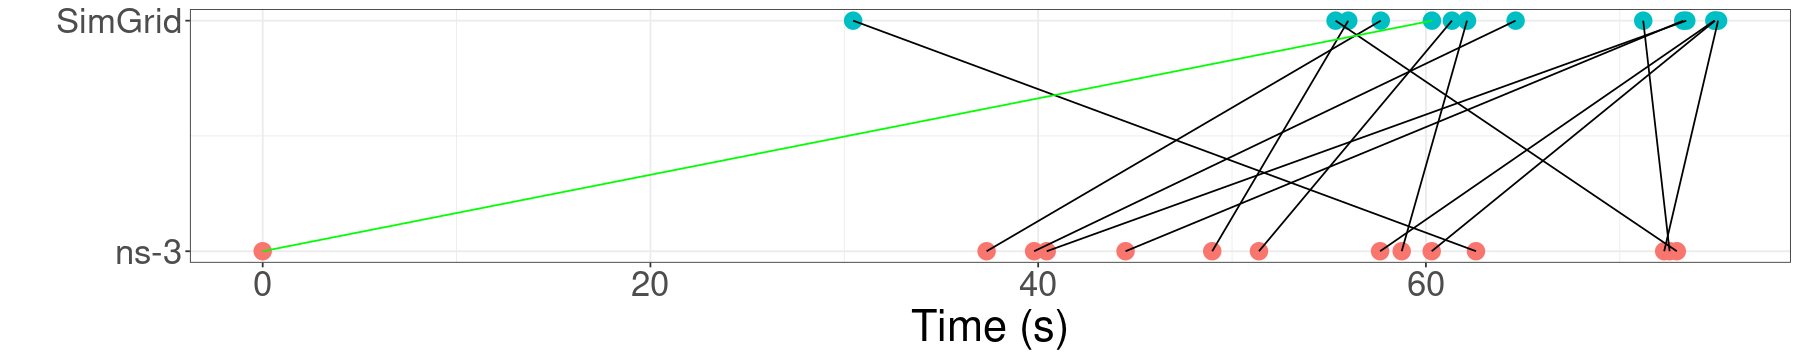

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

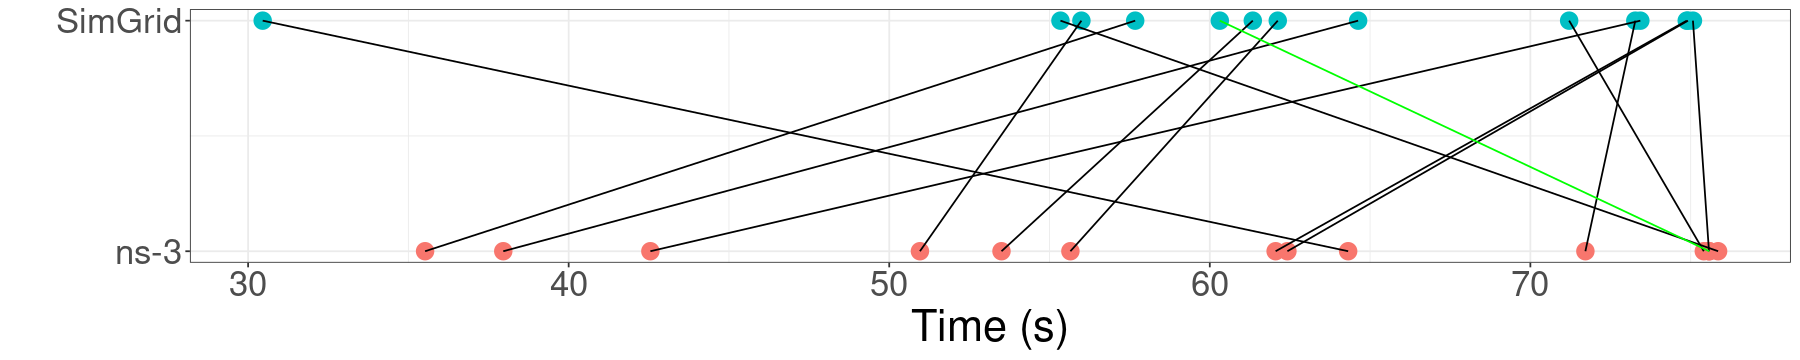

   srcOK simulator.x    src dst.x start      end     size simulator.y dst.y
1   STA0          sg  STA_0   OUT    30 60.31240 11484540         ns3   OUT
2   STA1          sg  STA_1   OUT    24 71.21003 22763336         ns3   OUT
3  STA10          sg STA_10   OUT    28 64.62691 14988208         ns3   OUT
4  STA11          sg STA_11   OUT    24 57.67277 13591408         ns3   OUT
5  STA12          sg STA_12   OUT    23 61.34141 16338321         ns3   OUT
6  STA13          sg STA_13   OUT    27 55.99468 10831066         ns3   OUT
7   STA2          sg  STA_2   OUT    28 55.34105 10044558         ns3   OUT
8   STA3          sg  STA_3   OUT    22 73.27382 26861432         ns3   OUT
9   STA4          sg  STA_4   OUT    22 74.87780 29338937         ns3   OUT
10  STA5          sg  STA_5   OUT    27 62.12033 13815094         ns3   OUT
11  STA6          sg  STA_6   OUT    29 74.91600 24296852         ns3   OUT
12  STA7          sg  STA_7   OUT    20 30.45497 12777558         ns3   OUT
13  STA8    

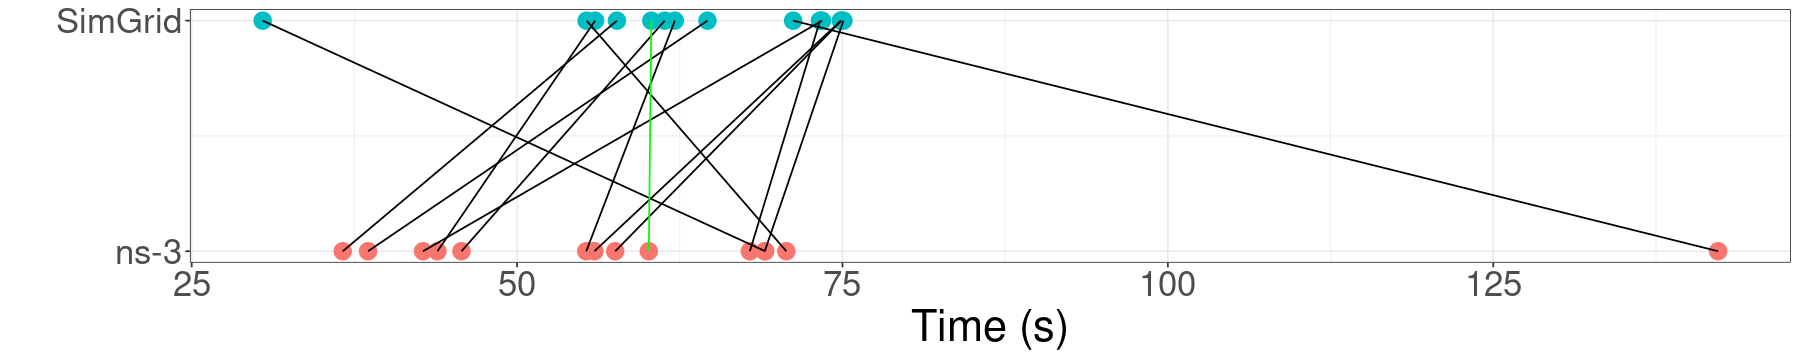

     idExp      meanLogErr       maxLogErr    
 Min.   : 1   Min.   :0.4308   Min.   :1.444  
 1st Qu.:17   1st Qu.:0.5364   1st Qu.:1.551  
 Median :33   Median :0.5686   Median :1.578  
 Mean   :33   Mean   :   Inf   Mean   :  Inf  
 3rd Qu.:49   3rd Qu.:0.6448   3rd Qu.:1.675  
 Max.   :65   Max.   :   Inf   Max.   :  Inf  

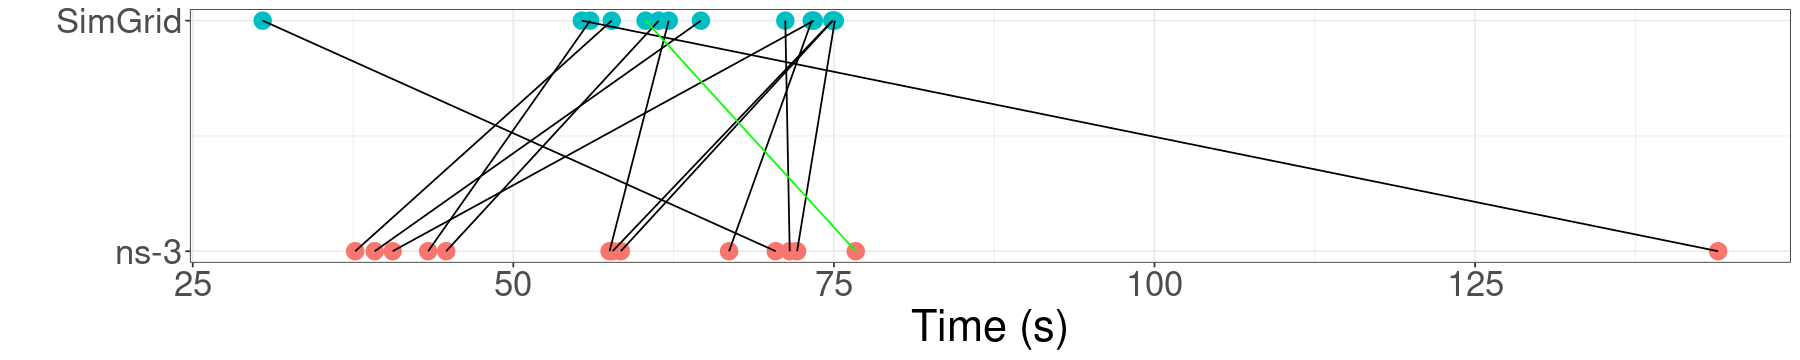

null device 
          1

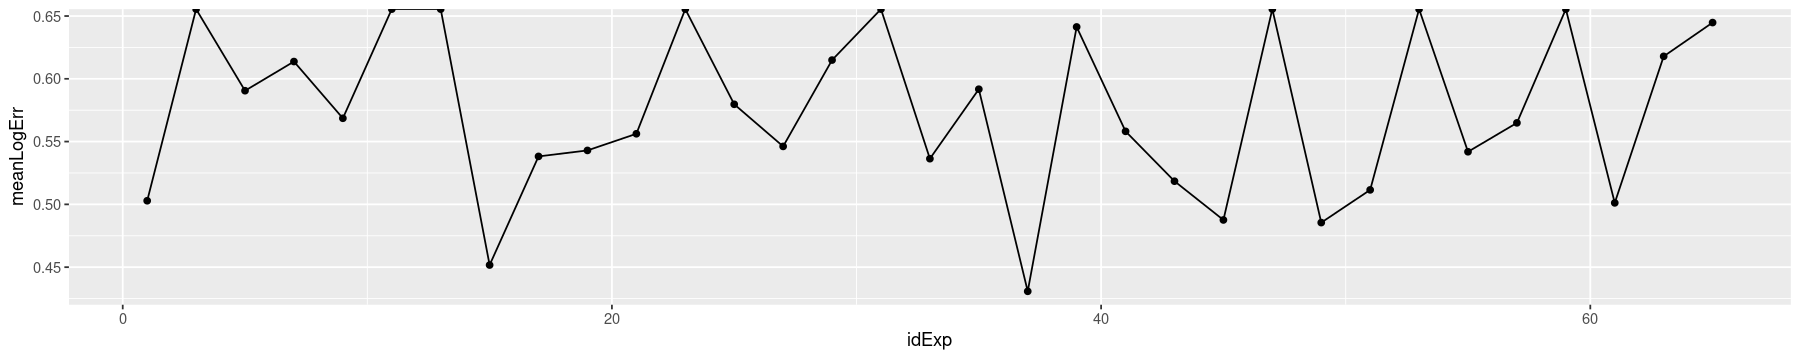

In [4]:
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/largeExperiment/")
repertory <- "logs/1653066954/"#1653066954/"
d <- as_tibble(read.csv(paste(repertory,"/results.csv", sep="")))

d <- d %>% filter(nbCells==1) %>% filter(seedP==1) #for the paper, remove to see with other number of cells

options(repr.plot.width=15, repr.plot.height=3)

dfLogErr <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(dfLogErr) <-c("idExp", "meanLogErr", "maxLogErr")

d <- arrange(d , nbCells, maxSTAPerCell, seedP, seedNS)

li <- list()
for( i in rownames(d) ) {
    if(strtoi(i)%%2==0) next
        
    fns <- gsub("sg_platf.xml$","flowData_ns3.csv",d[i,]$platformFileSG)[1]
    fsg <- gsub("sg_platf.xml$","flowData_sg.csv",d[i,]$platformFileSG)[1]
    if(file.exists(paste(repertory,fns,sep=""))==FALSE || file.exists(paste(repertory,fsg,sep=""))==FALSE) {
        next;
    }
    dfns <- as_tibble(read.csv(paste(repertory,fns,sep=""))) #logs/1646004010/
    dfsg <- as_tibble(read.csv(paste(repertory,fsg,sep=""))) #logs/1646004010/

    #correct this in the launcher
    dfsg <- dfsg %>% mutate(srcOK=gsub('_', '', src))
    dfns <- dfns %>% filter(src!="OUT")

    mergeDF <- merge(dfsg, dfns, by.x = "srcOK", by.y = "src")
    mergeDF <- mergeDF %>% mutate(logErr = abs(log(end-start)-log(endRx-startRx)))
    print(mergeDF)
    mergeDF1 <- mergeDF %>% filter(src!="STA_0")
    mergeDF2 <- mergeDF %>% filter(src=="STA_0")
    dfLogErr[nrow(dfLogErr) + 1,] <- c(i,mean(mergeDF$logErr),max(mergeDF$logErr))
    g <- ggplot() + 
      geom_point(data=dfns, aes(x = endRx, size=3, y=1, color="ns3")) +
      geom_point(data=dfsg, aes(x=end, y=2, size=3, color="simgrid")) +
#      geom_quadrilateral(data=mergeDF, aes(x1=startRx, y1 = 1,
#                             x2 = endRx, y2 = 1,
#                             x3 = end, y3 = 2,
#                             x4 = start, y4 = 2,color = src),
#                         fill="gray", alpha=0, size=1) +
      geom_segment(data =mergeDF1, mapping = aes(x=endRx, y=1, xend=end, yend=2),color="black", inherit.aes = FALSE)+
      geom_segment(data =mergeDF2, mapping = aes(x=endRx, y=1, xend=end, yend=2),color="green", inherit.aes = FALSE)+
      scale_y_continuous(breaks = 1:2, labels = c("ns-3","SimGrid"))+

      #ggtitle(paste("maxSTAPerCell",d[i,"maxSTAPerCell"],"seedP",d[i,"seedP"],"seedNS",d[i,"seedNS"],"nbCells",d[i,"nbCells"],"meanlogErr=",mean(mergeDF$logErr),"maxlogErr=",max(mergeDF$logErr)))+
      labs(y= "", x = "Time (s)") + theme_bw()+
      theme(text = element_text(size = 26),legend.position="")

    plot(g)
    ggsave(paste("gwifi_timeline_",d[i,"seedNS"],".pdf",sep=""), plot=g,width=15,height=3)

}


dfLogErr$meanLogErr <- as.numeric(dfLogErr$meanLogErr)
dfLogErr$maxLogErr <- as.numeric(dfLogErr$maxLogErr)
dfLogErr$idExp <- as.numeric(dfLogErr$idExp)

summary(dfLogErr)
g <- ggplot() +
    geom_point(data=dfLogErr, aes(x=idExp, y=meanLogErr))+
    geom_line(data=dfLogErr, aes(x=idExp, y=meanLogErr))
print(g)

dev.off()



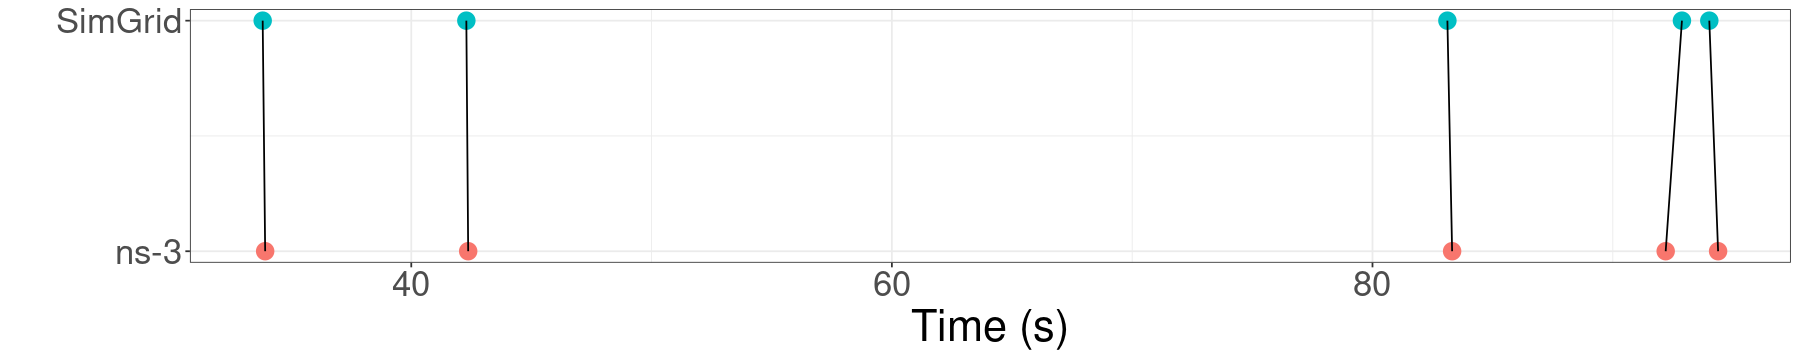

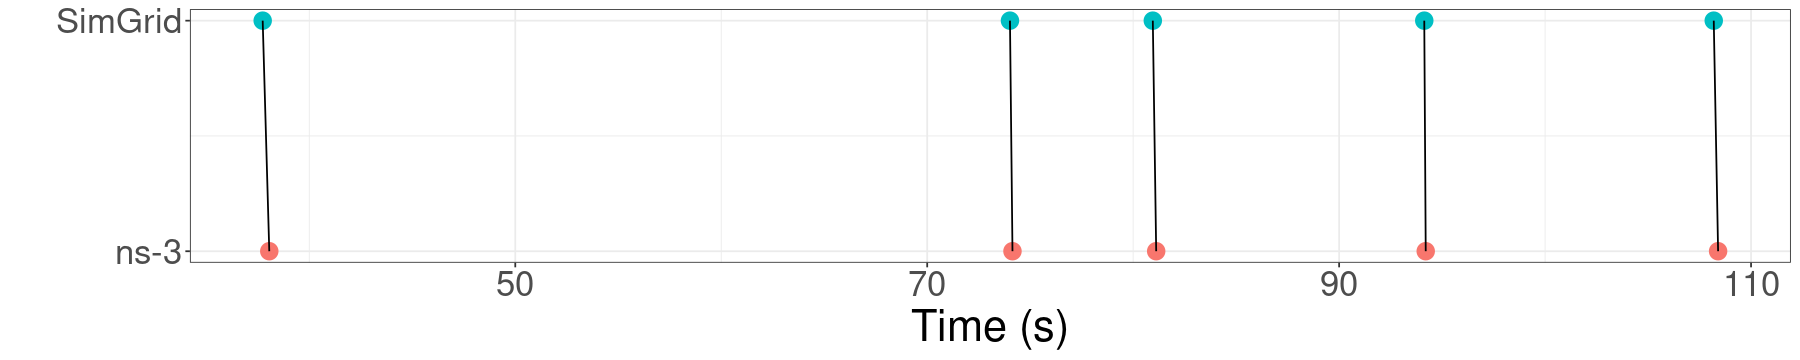

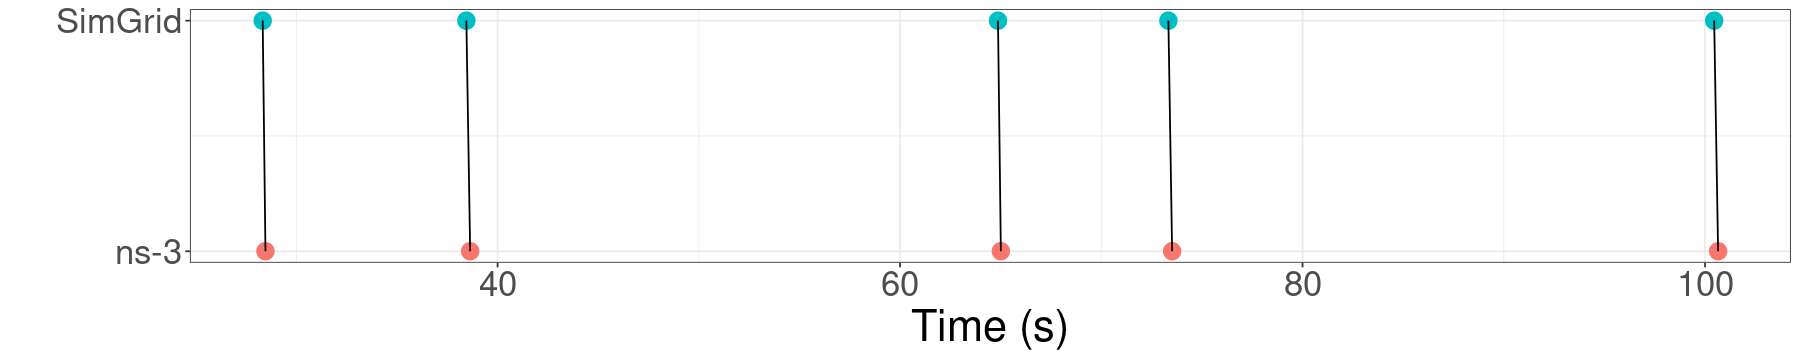

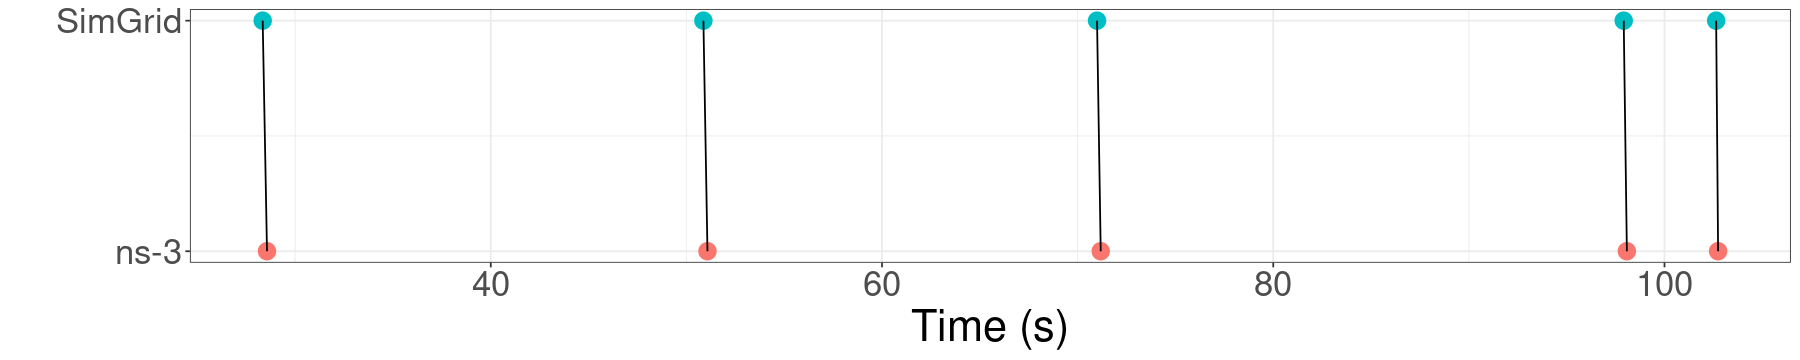

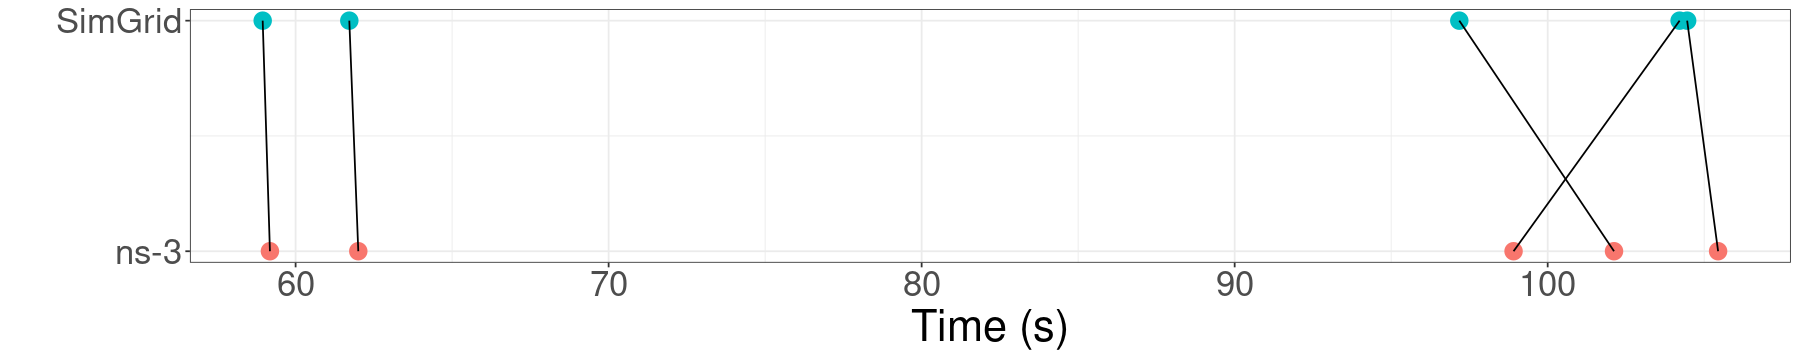

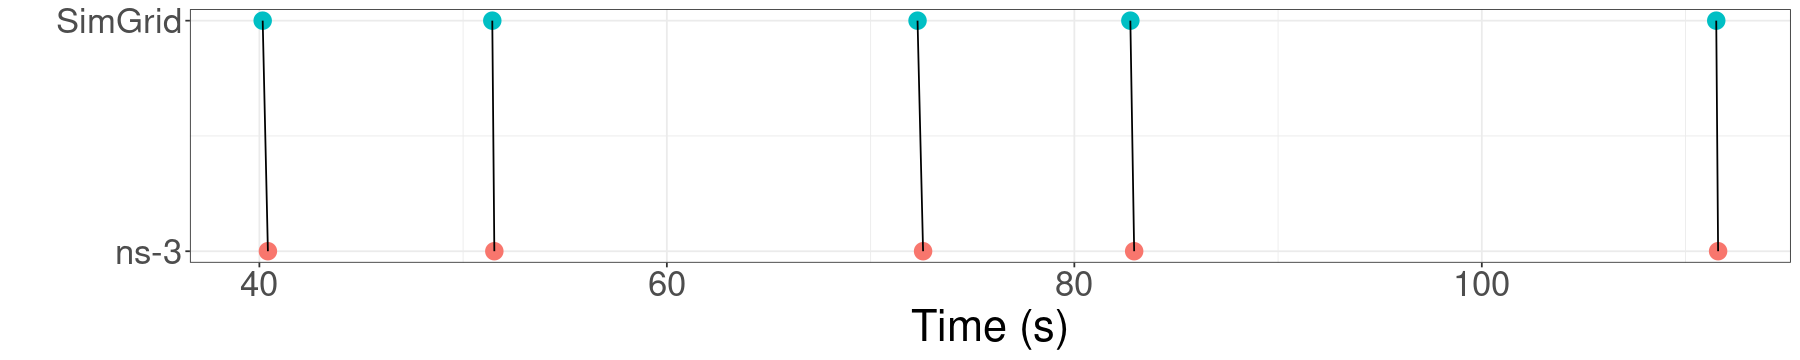

     idExp      meanLogErr        maxLogErr      
 Min.   : 1   Min.   :0.03954   Min.   :0.04975  
 1st Qu.: 4   1st Qu.:0.04539   1st Qu.:0.05880  
 Median : 7   Median :0.04700   Median :0.06506  
 Mean   : 7   Mean   :0.08054   Mean   :0.15646  
 3rd Qu.:10   3rd Qu.:0.06252   3rd Qu.:0.09544  
 Max.   :13   Max.   :0.26140   Max.   :0.67190  

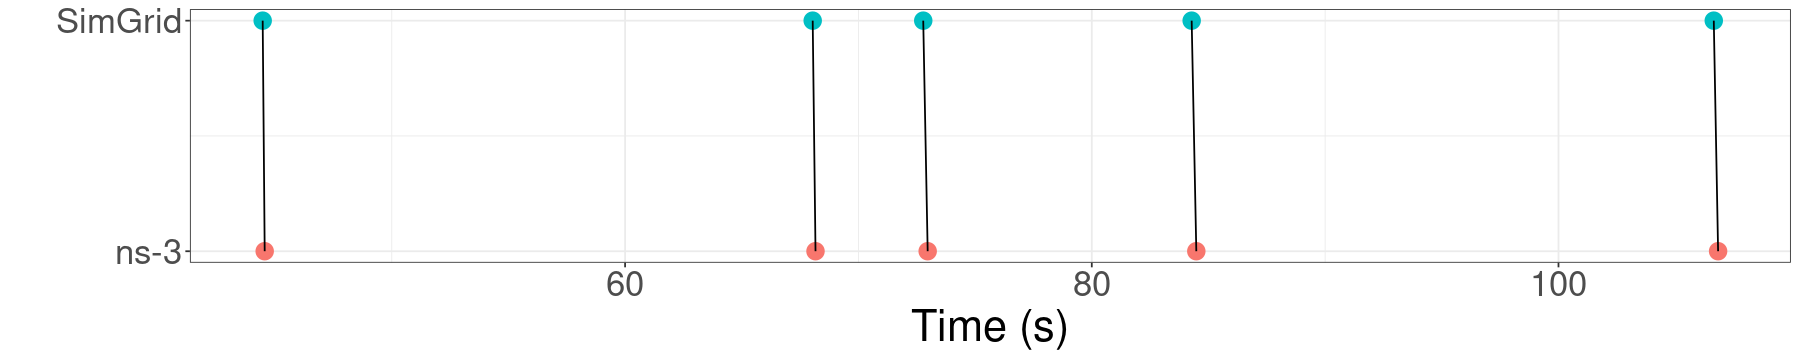

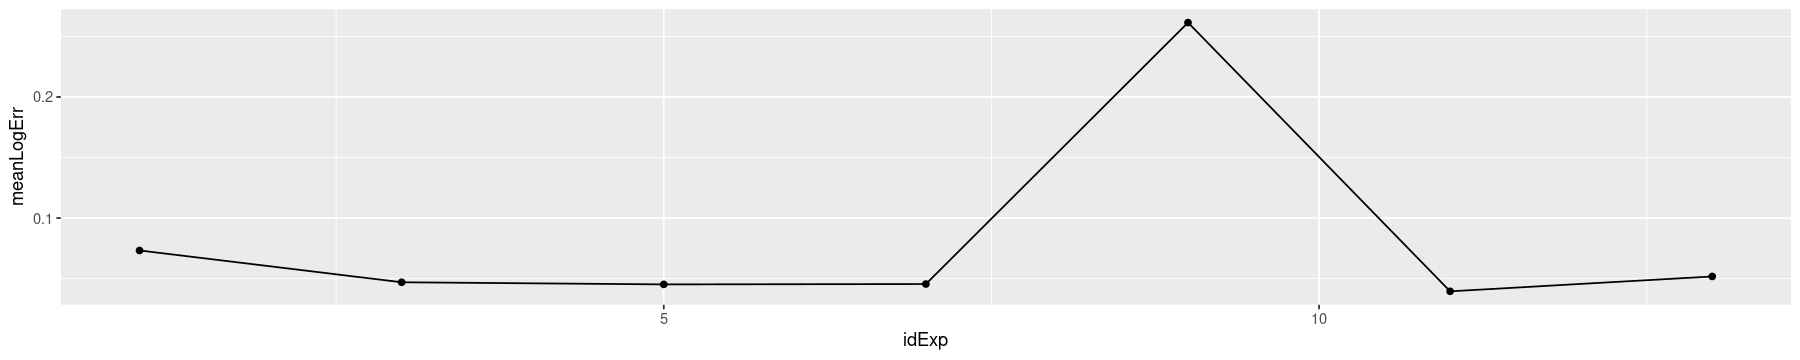

In [13]:
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/largeExperiment/")
repertory <- "logs/1653250999/"#1653066954/"
d <- as_tibble(read.csv(paste(repertory,"/results.csv", sep="")))

options(repr.plot.width=15, repr.plot.height=3)

dfLogErr <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(dfLogErr) <-c("idExp", "meanLogErr", "maxLogErr")


d <- arrange(d , nbCells, maxSTAPerCell, seedP, seedNS)

li <- list()
for( i in rownames(d) ) {
    if(strtoi(i)%%2==0) next
        
    fns <- gsub("sg_platf.xml$","flowData_ns3.csv",d[i,]$platformFileSG)[1]
    fsg <- gsub("sg_platf.xml$","flowData_sg.csv",d[i,]$platformFileSG)[1]
    if(file.exists(paste(repertory,fns,sep=""))==FALSE || file.exists(paste(repertory,fsg,sep=""))==FALSE) {
        next;
    }
    dfns <- as_tibble(read.csv(paste(repertory,fns,sep=""))) #logs/1646004010/
    dfsg <- as_tibble(read.csv(paste(repertory,fsg,sep=""))) #logs/1646004010/

    #correct this in the launcher
    dfsg <- dfsg %>% mutate(srcOK=gsub('_', '', src))
    dfns <- dfns %>% filter(src!="OUT")

    mergeDF <- merge(dfsg, dfns, by.x = "srcOK", by.y = "src")
    mergeDF <- mergeDF %>% mutate(logErr = abs(log(end-start)-log(endRx-startRx)))
    dfLogErr[nrow(dfLogErr) + 1,] <- c(i,mean(mergeDF$logErr),max(mergeDF$logErr))

    #print(mergeDF)
    g <- ggplot() + 
      geom_point(data=dfns, aes(x = endRx, size=3, y=1, color="ns3")) +
      geom_point(data=dfsg, aes(x=end, y=2, size=3, color="simgrid")) +
      geom_segment(data =mergeDF, mapping = aes(x=endRx, y=1, xend=end, yend=2),color="black", inherit.aes = FALSE)+
      scale_y_continuous(breaks = 1:2, labels = c("ns-3","SimGrid"))+
      labs(y= "", x = "Time (s)") + theme_bw()+
      theme(text = element_text(size = 26),legend.position="")
      #ggtitle(paste("maxSTAPerCell",d[i,"maxSTAPerCell"],"seedP",d[i,"seedP"],"seedNS",d[i,"seedNS"],"nbCells",d[i,"nbCells"],"meanlogErr=",mean(mergeDF$logErr),"maxlogErr=",max(mergeDF$logErr)))

    plot(g)
    ggsave(paste("gwifi_timeline_",d[i,"seedNS"],".pdf",sep=""), plot=g,width=15,height=3)

}


dfLogErr$meanLogErr <- as.numeric(dfLogErr$meanLogErr)
dfLogErr$maxLogErr <- as.numeric(dfLogErr$maxLogErr)
dfLogErr$idExp <- as.numeric(dfLogErr$idExp)

summary(dfLogErr)
g <- ggplot() +
    geom_point(data=dfLogErr, aes(x=idExp, y=meanLogErr))+
    geom_line(data=dfLogErr, aes(x=idExp, y=meanLogErr))
print(g)



<a id="6.2.3"></a>
## 6.2.3

Here, all flows start at different times, we have several messages sent etc
### Figure throughput

Warning message:
“Removed 340 rows containing missing values (geom_point).”
Warning message:
“Removed 759 rows containing missing values (geom_point).”
Warning message:
“Removed 231 rows containing missing values (geom_point).”


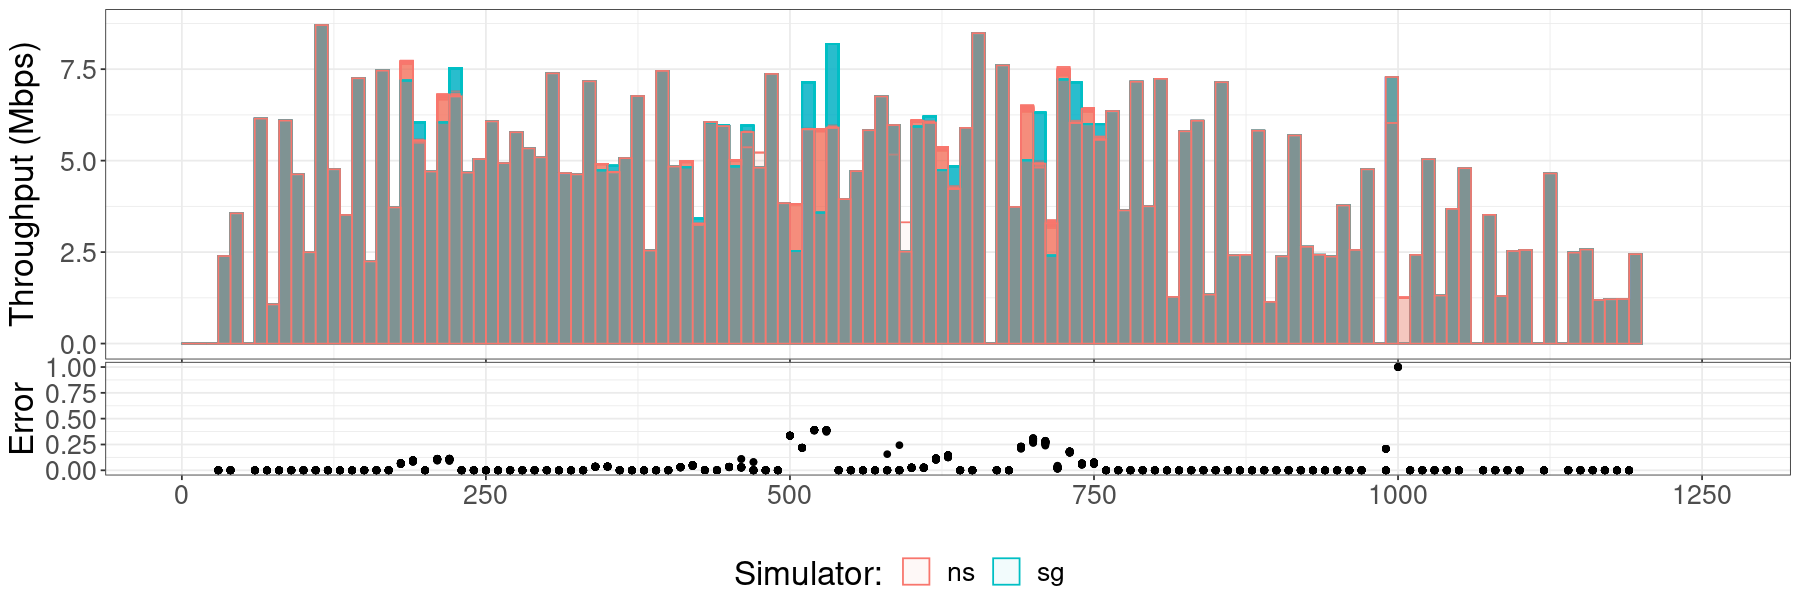

Warning message:
“Removed 315 rows containing missing values (geom_point).”


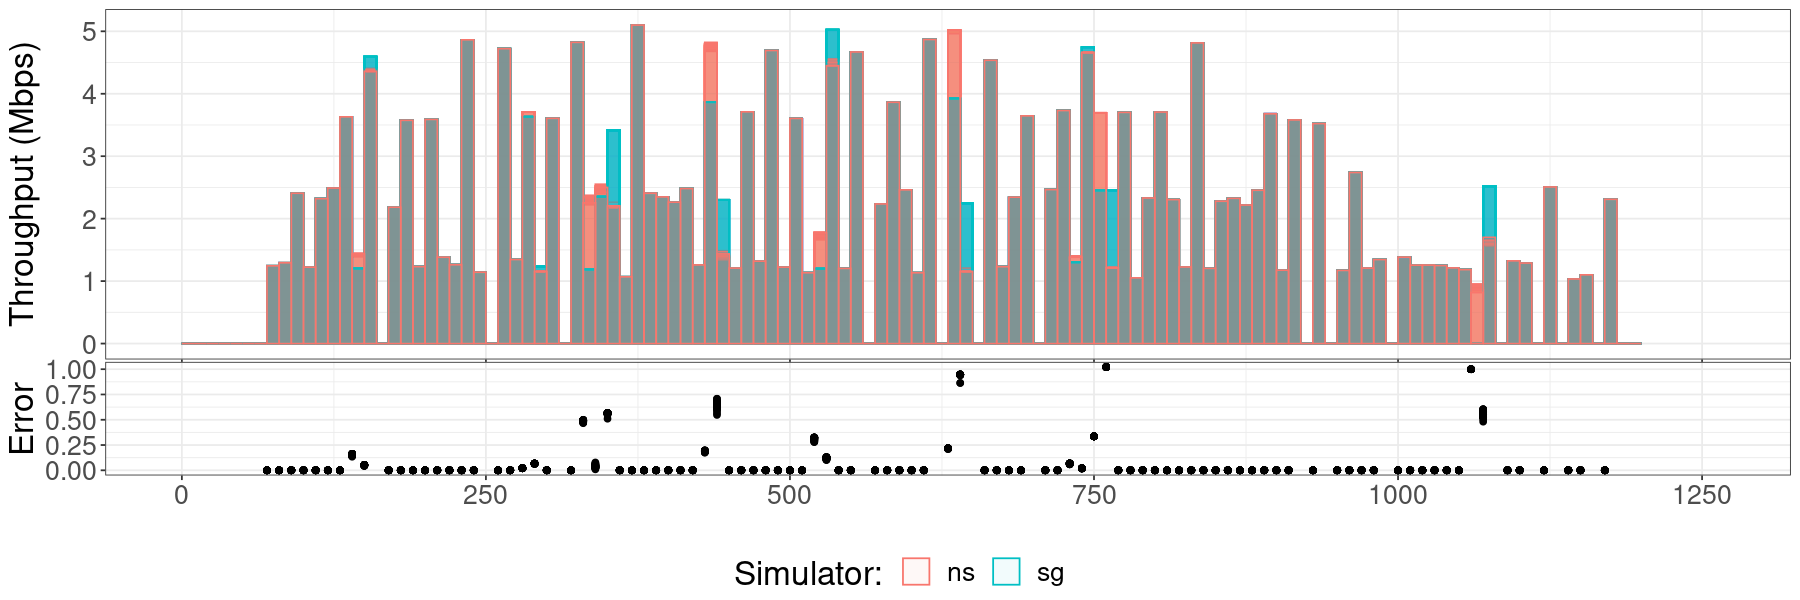

Warning message:
“Removed 140 rows containing missing values (geom_point).”


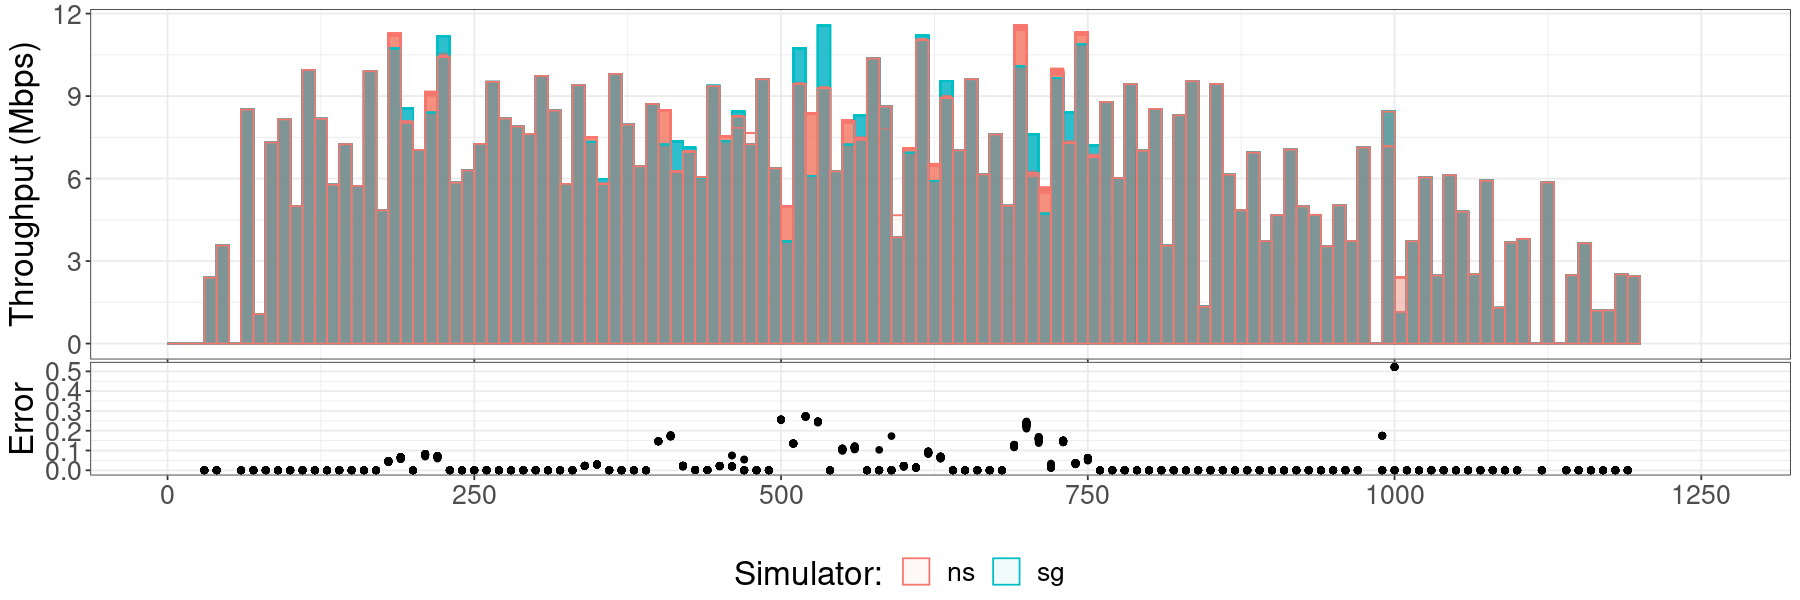

Warning message:
“Removed 315 rows containing missing values (geom_point).”


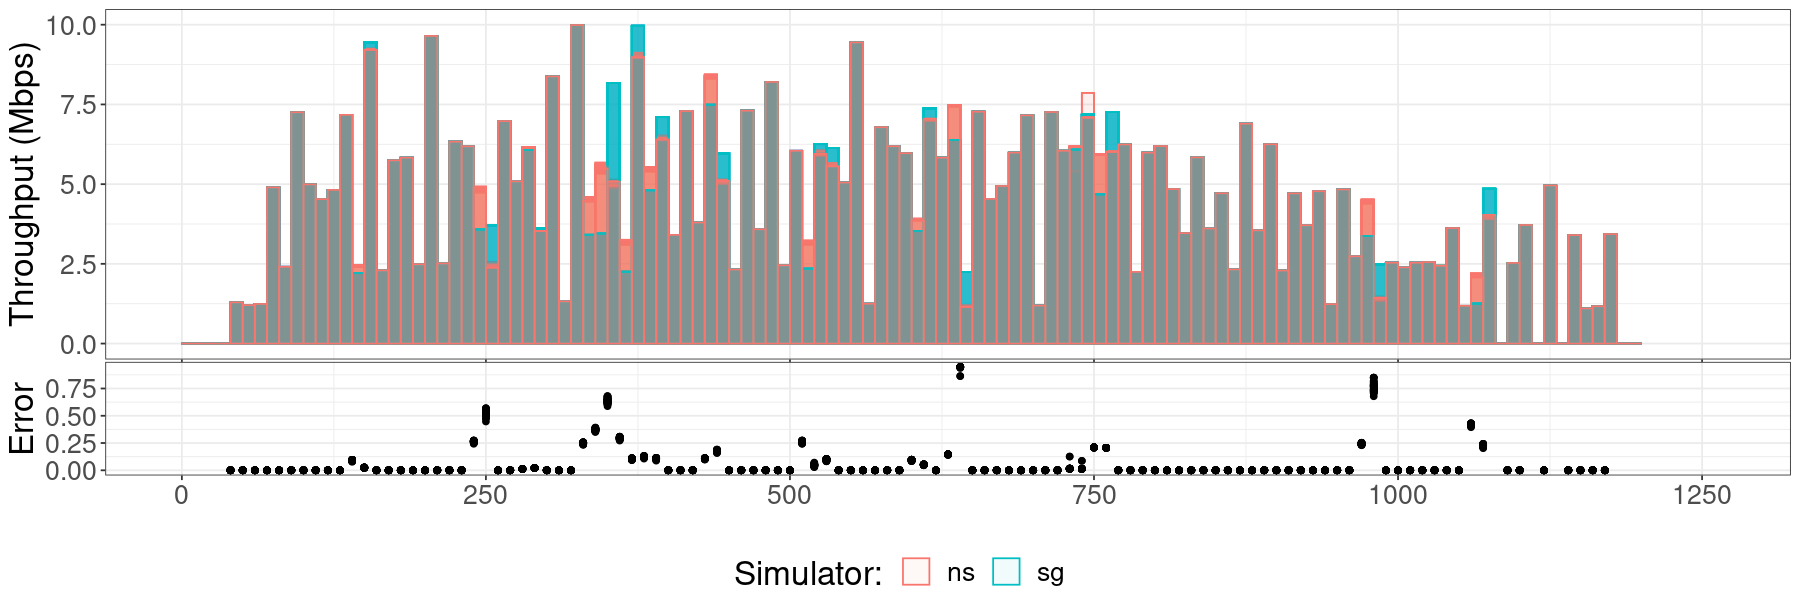

Warning message:
“Removed 140 rows containing missing values (geom_point).”


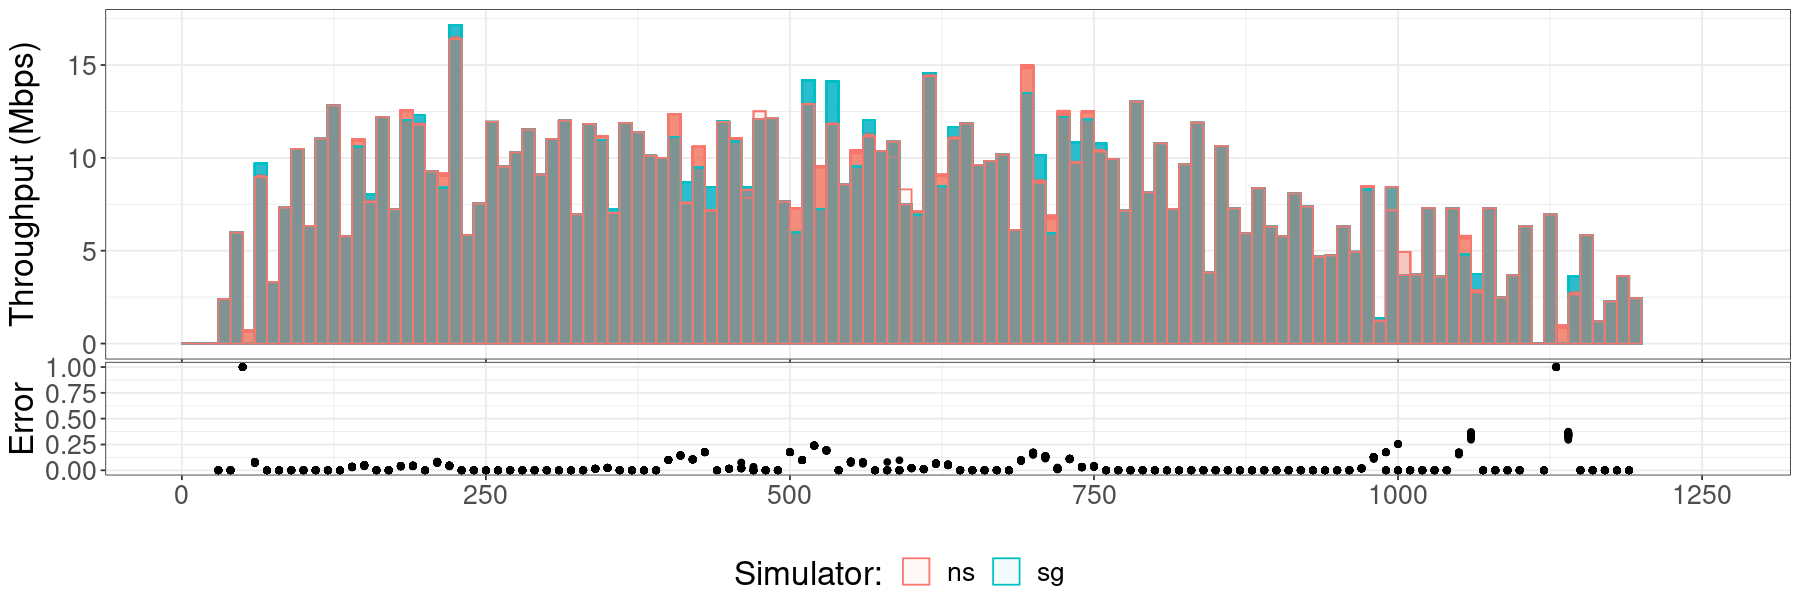

Warning message:
“Removed 128 rows containing missing values (geom_point).”


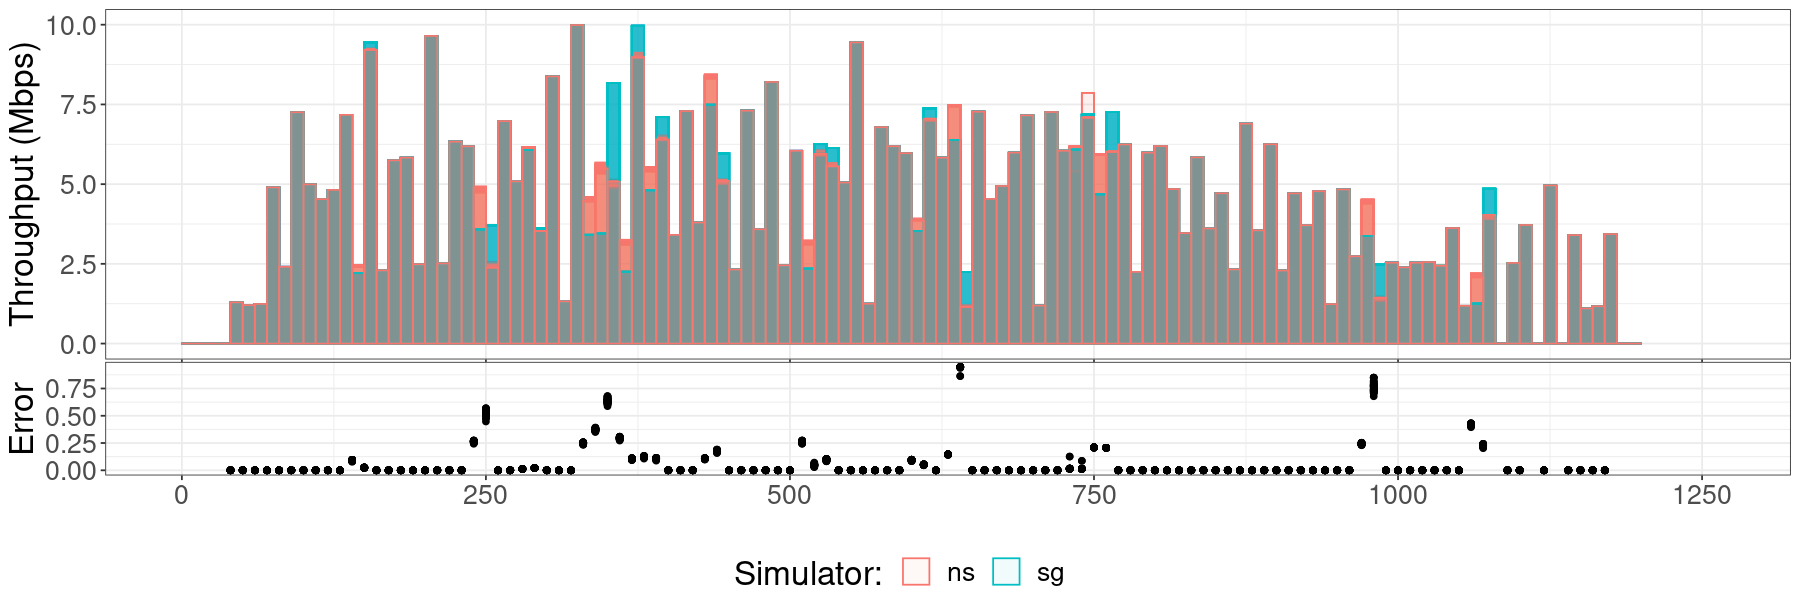

Warning message:
“Removed 102 rows containing missing values (geom_point).”


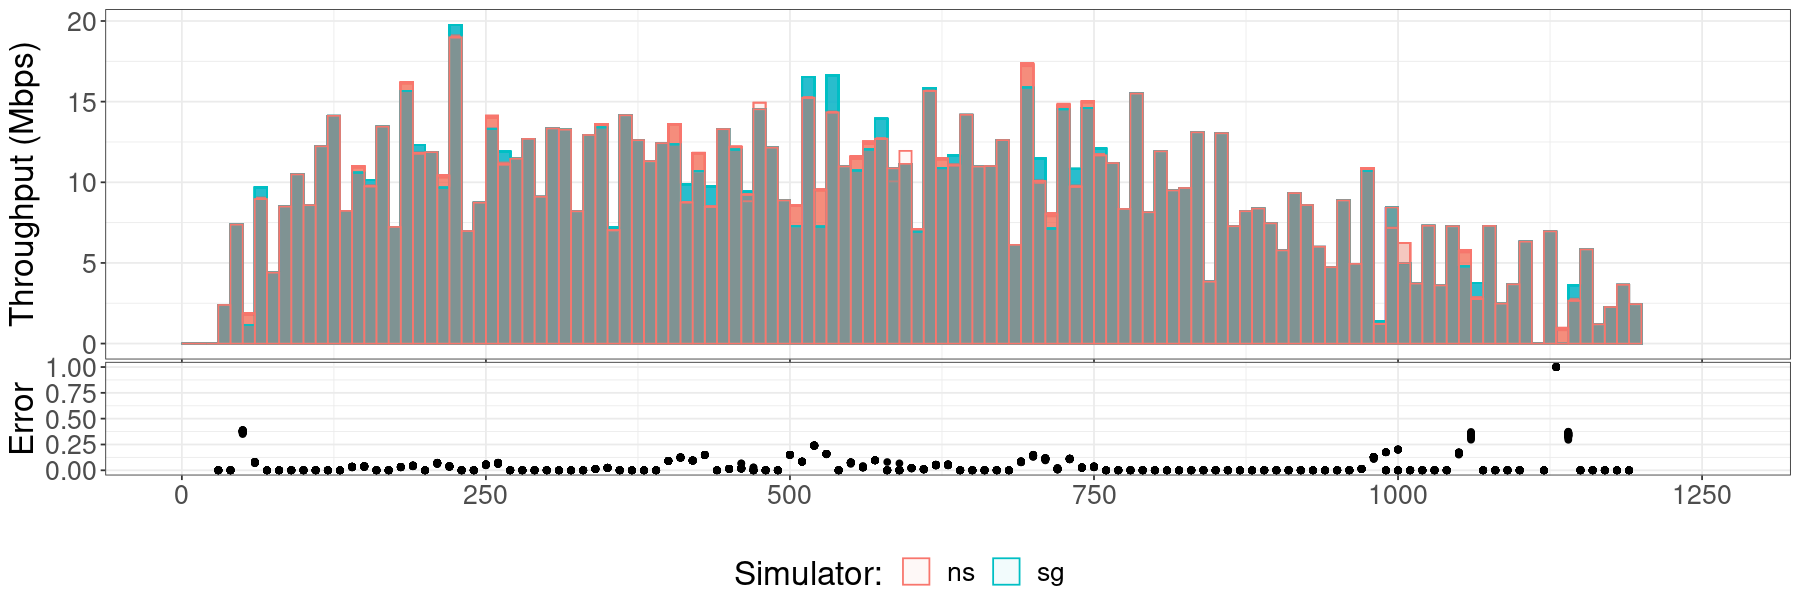

Warning message:
“Removed 136 rows containing missing values (geom_point).”


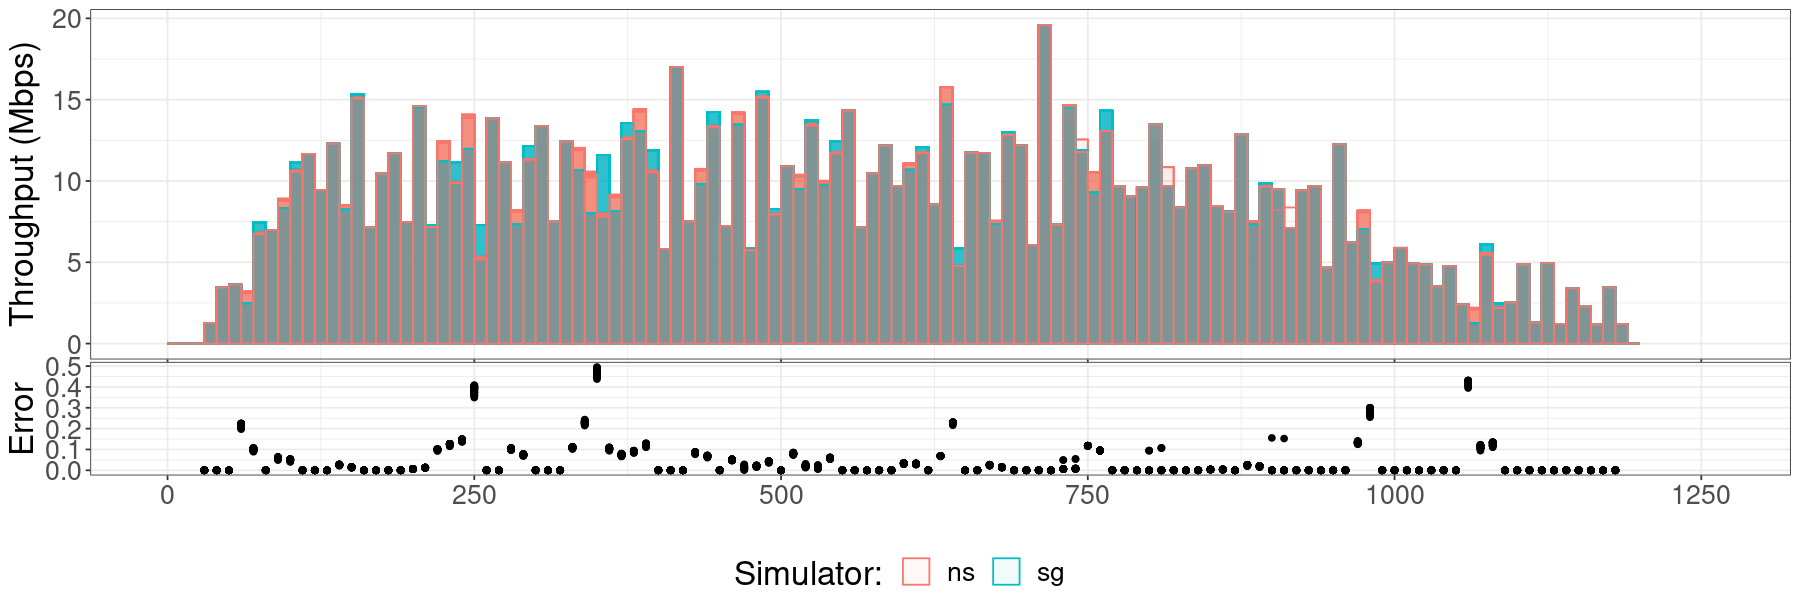

Warning message:
“Removed 99 rows containing missing values (geom_point).”


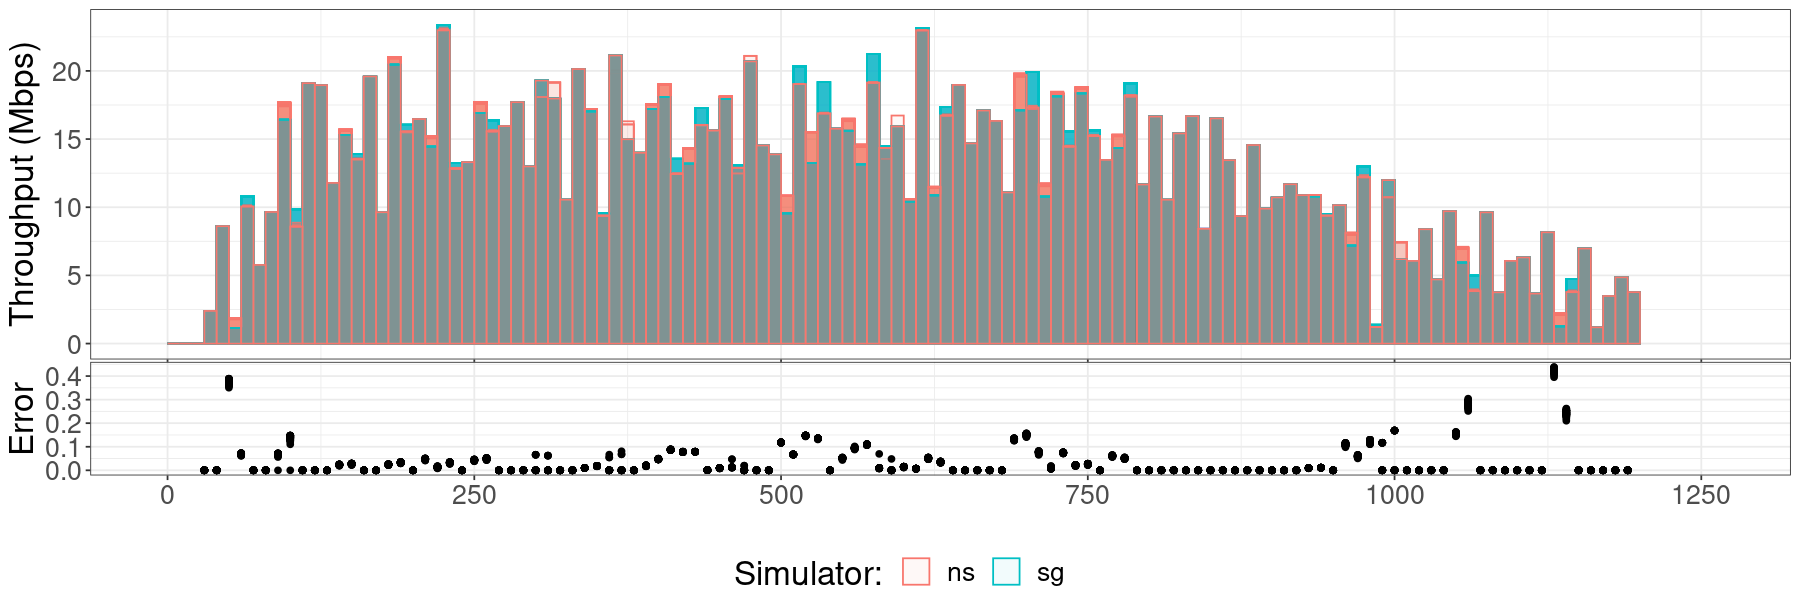

Warning message:
“Removed 96 rows containing missing values (geom_point).”


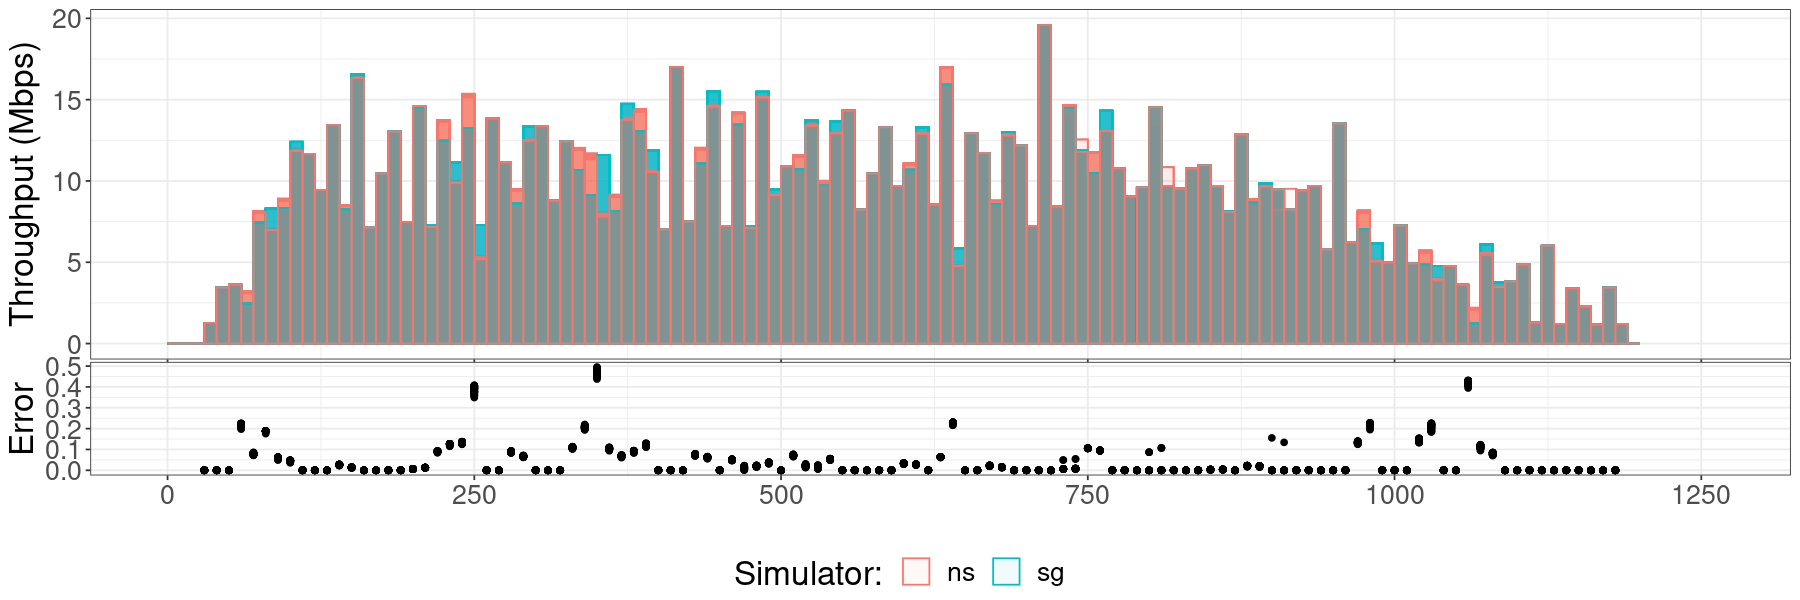

Warning message:
“Removed 93 rows containing missing values (geom_point).”


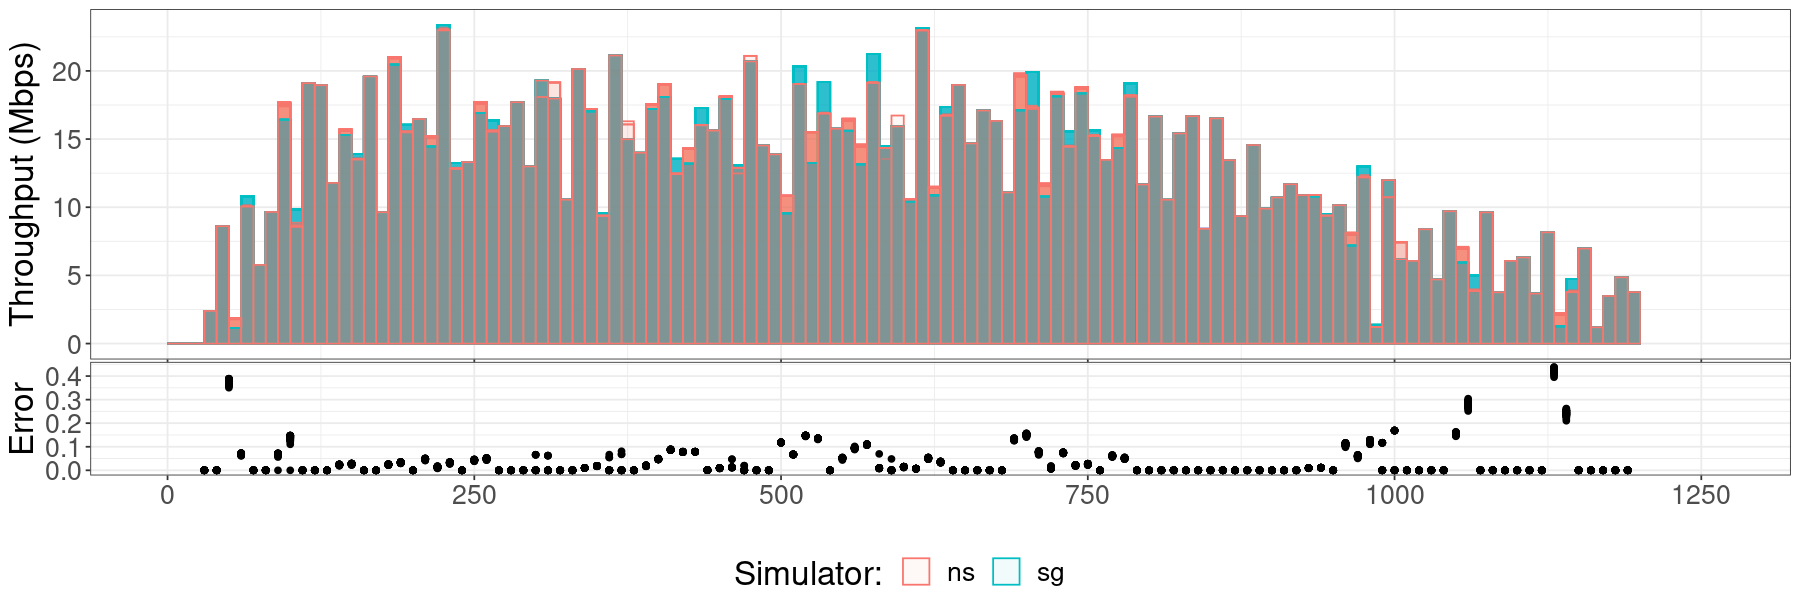

Warning message:
“Removed 102 rows containing missing values (geom_point).”


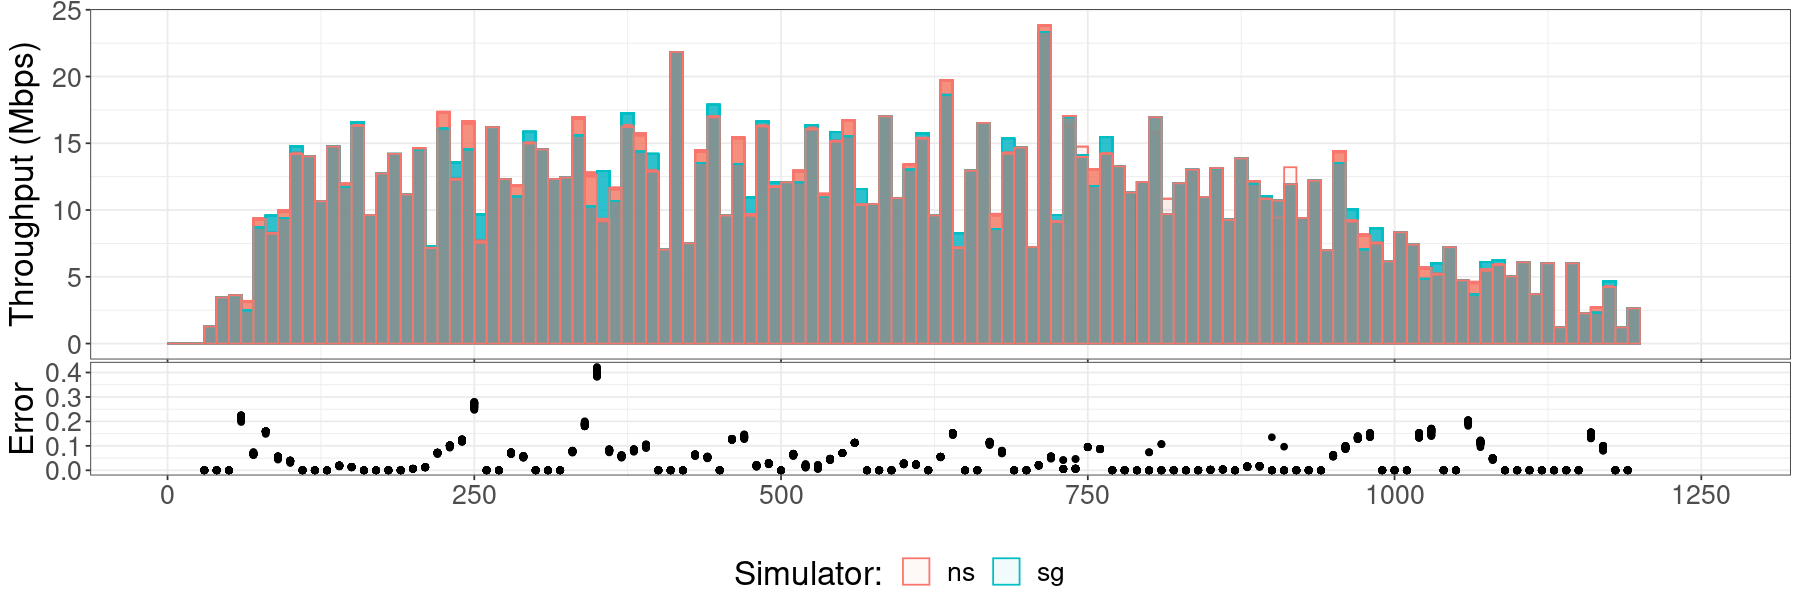

Warning message:
“Removed 102 rows containing missing values (geom_point).”


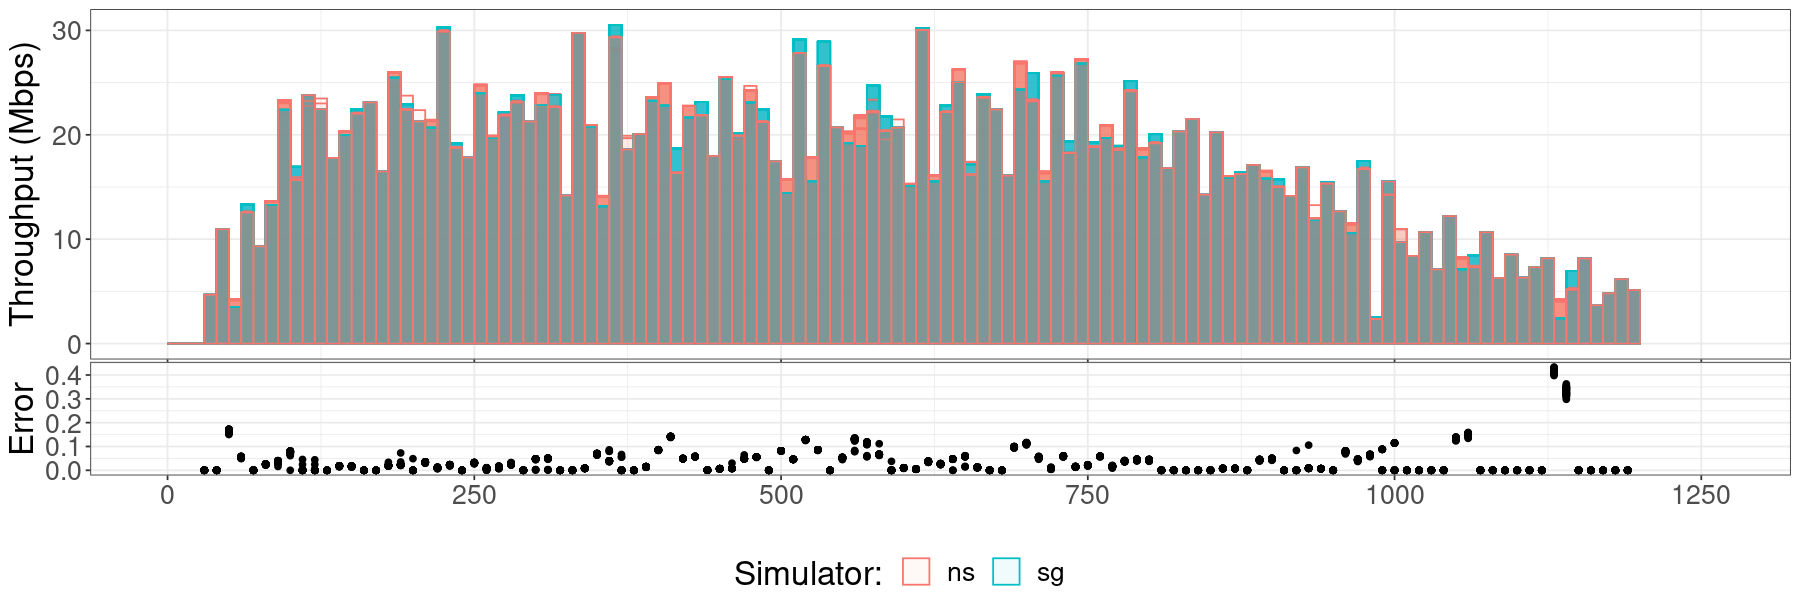

Warning message:
“Removed 102 rows containing missing values (geom_point).”


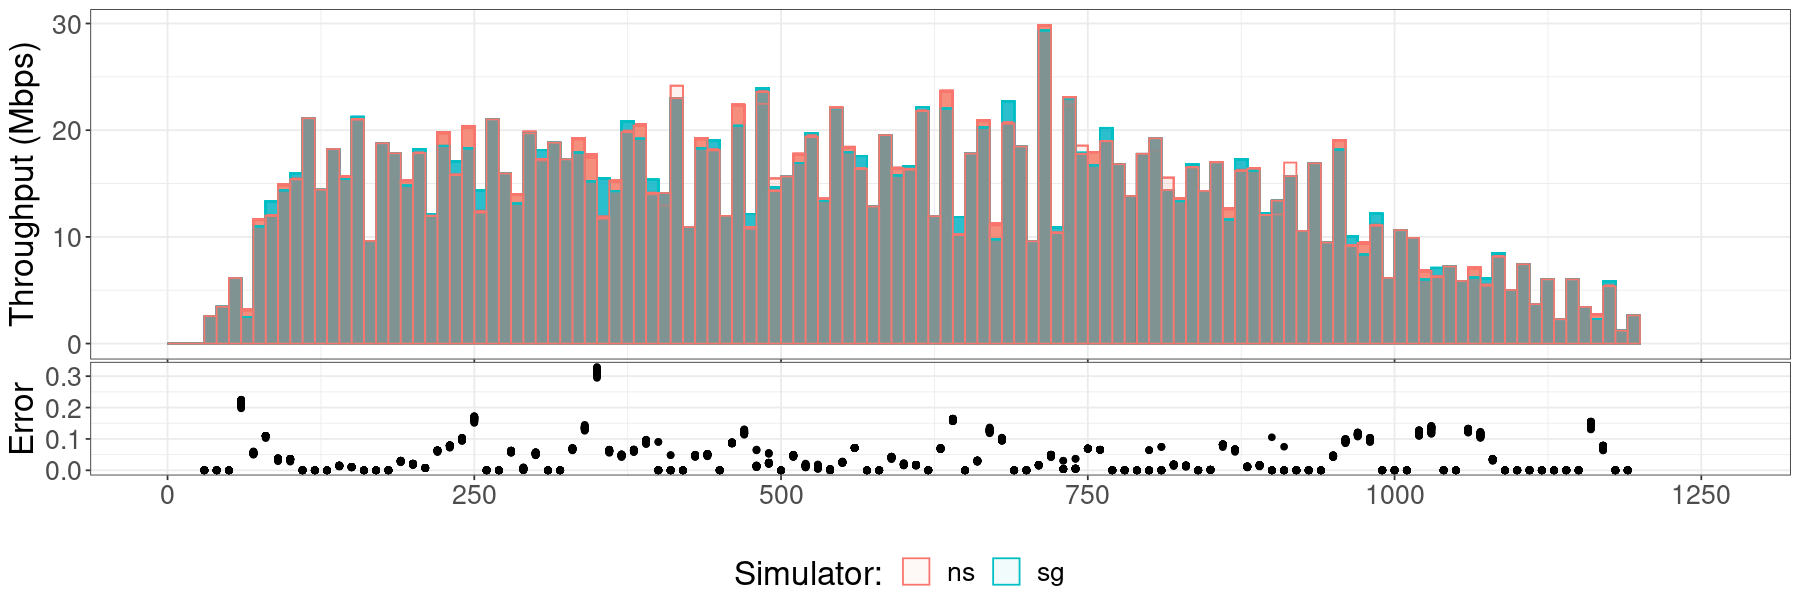

Warning message:
“Removed 96 rows containing missing values (geom_point).”


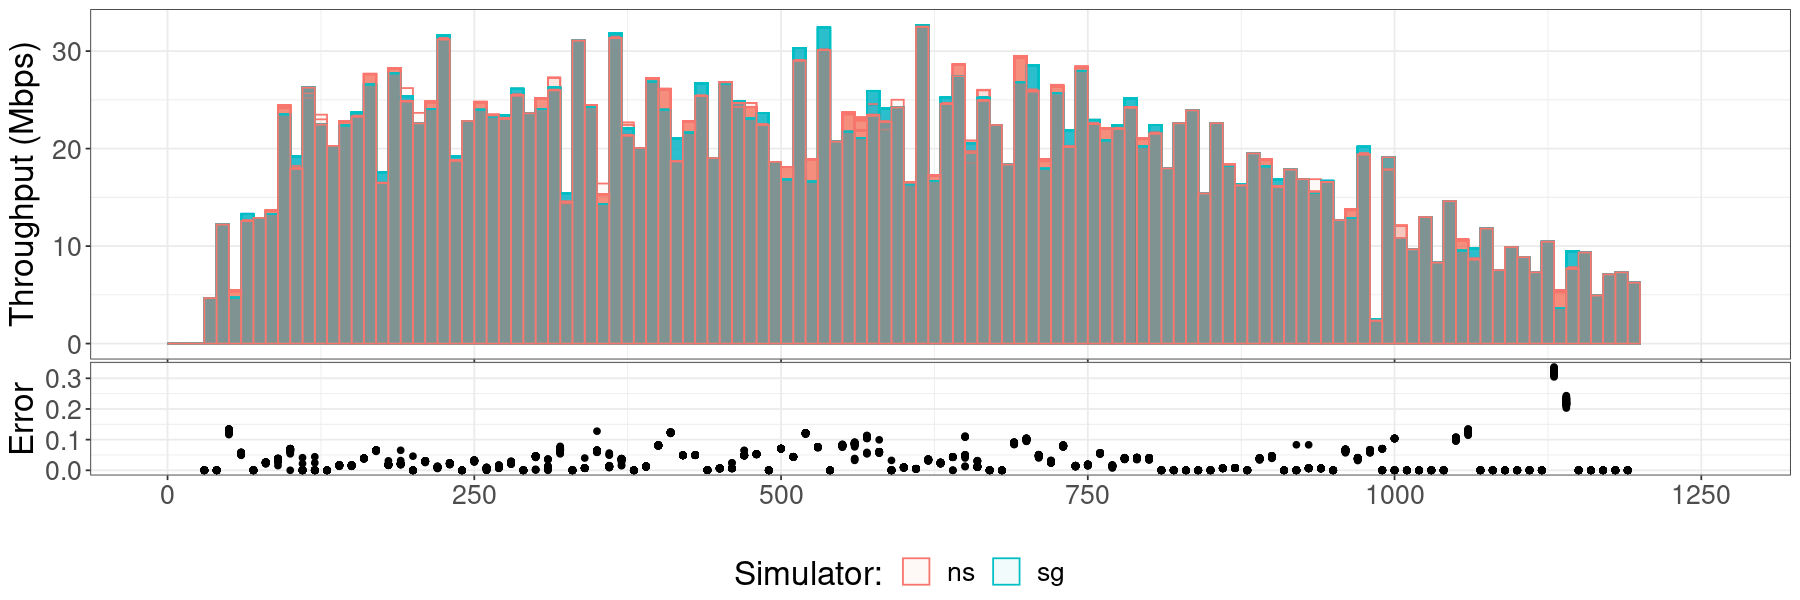

Warning message:
“Removed 96 rows containing missing values (geom_point).”


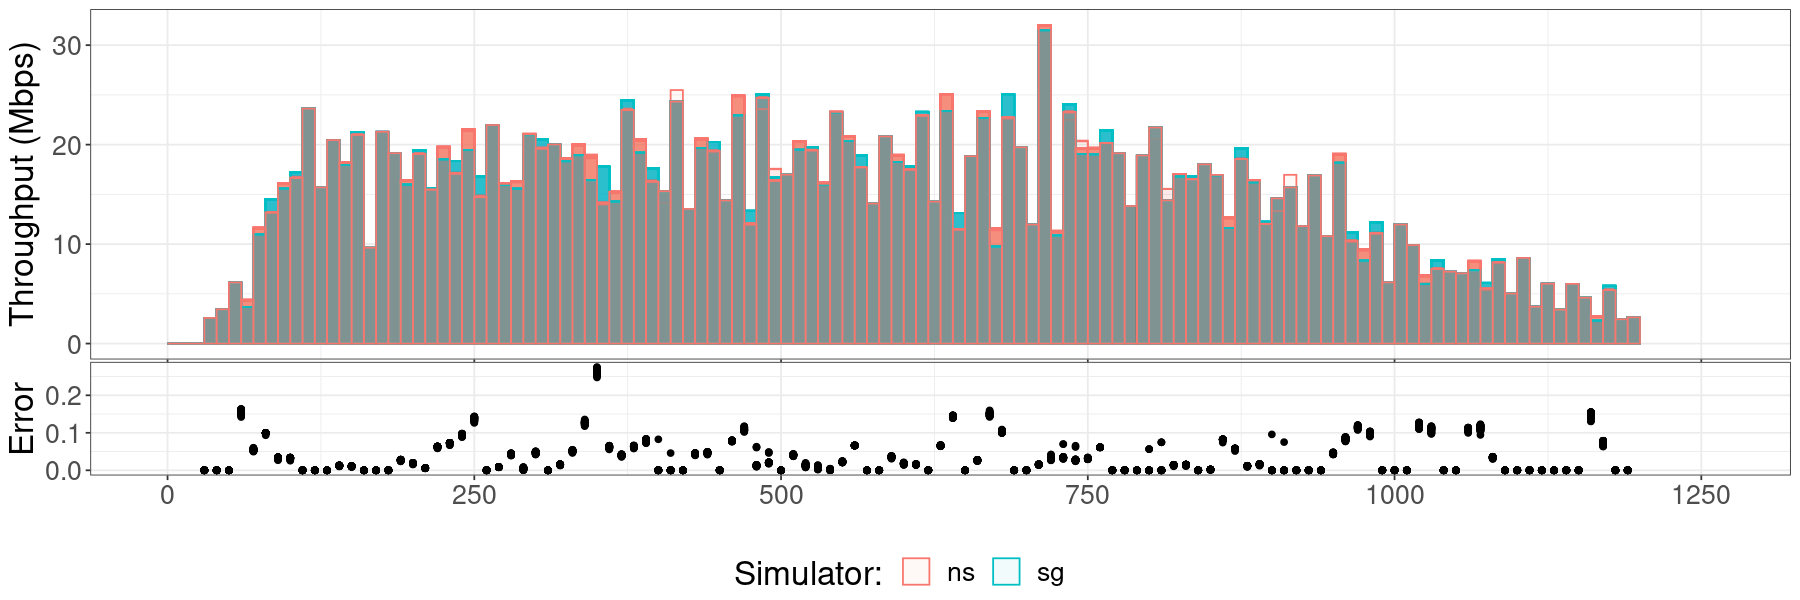

Warning message:
“Removed 105 rows containing missing values (geom_point).”


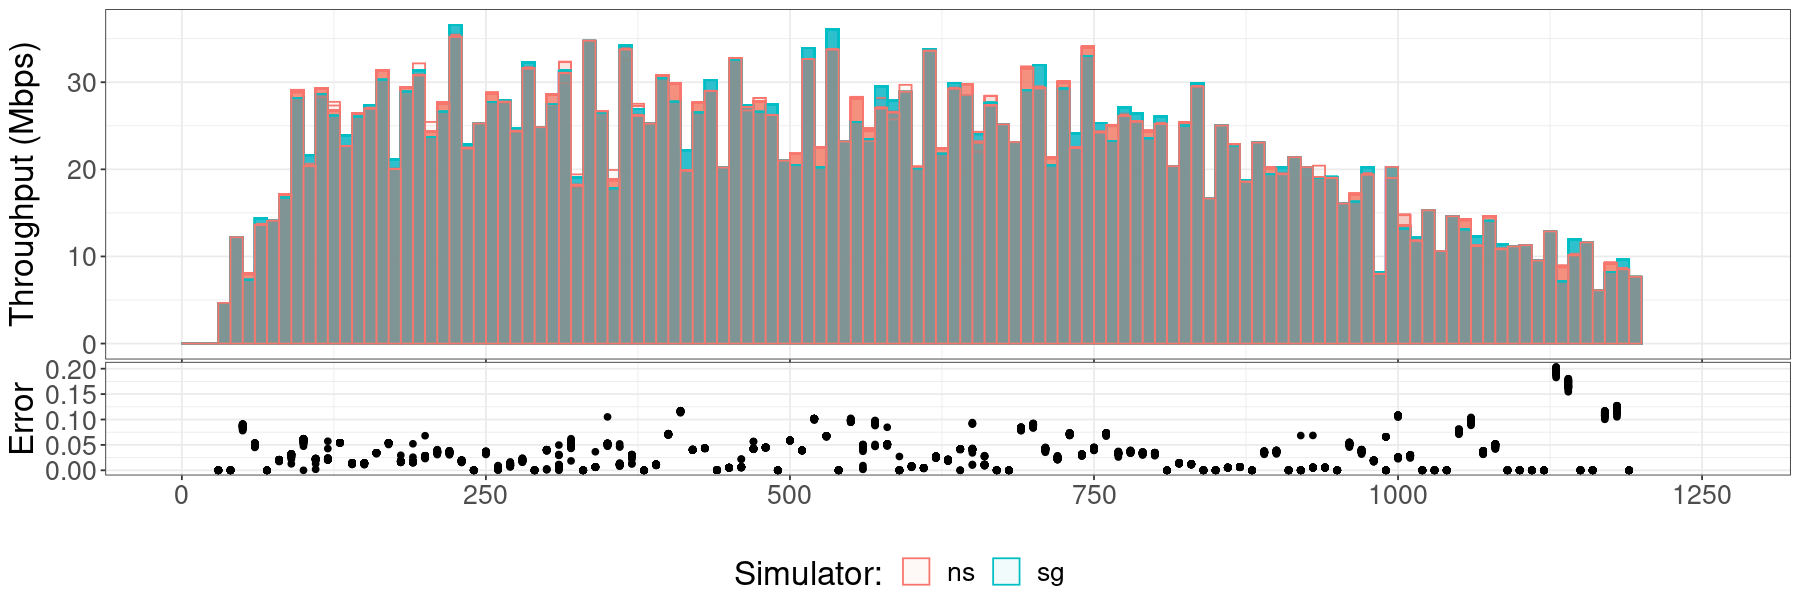

Warning message:
“Removed 96 rows containing missing values (geom_point).”


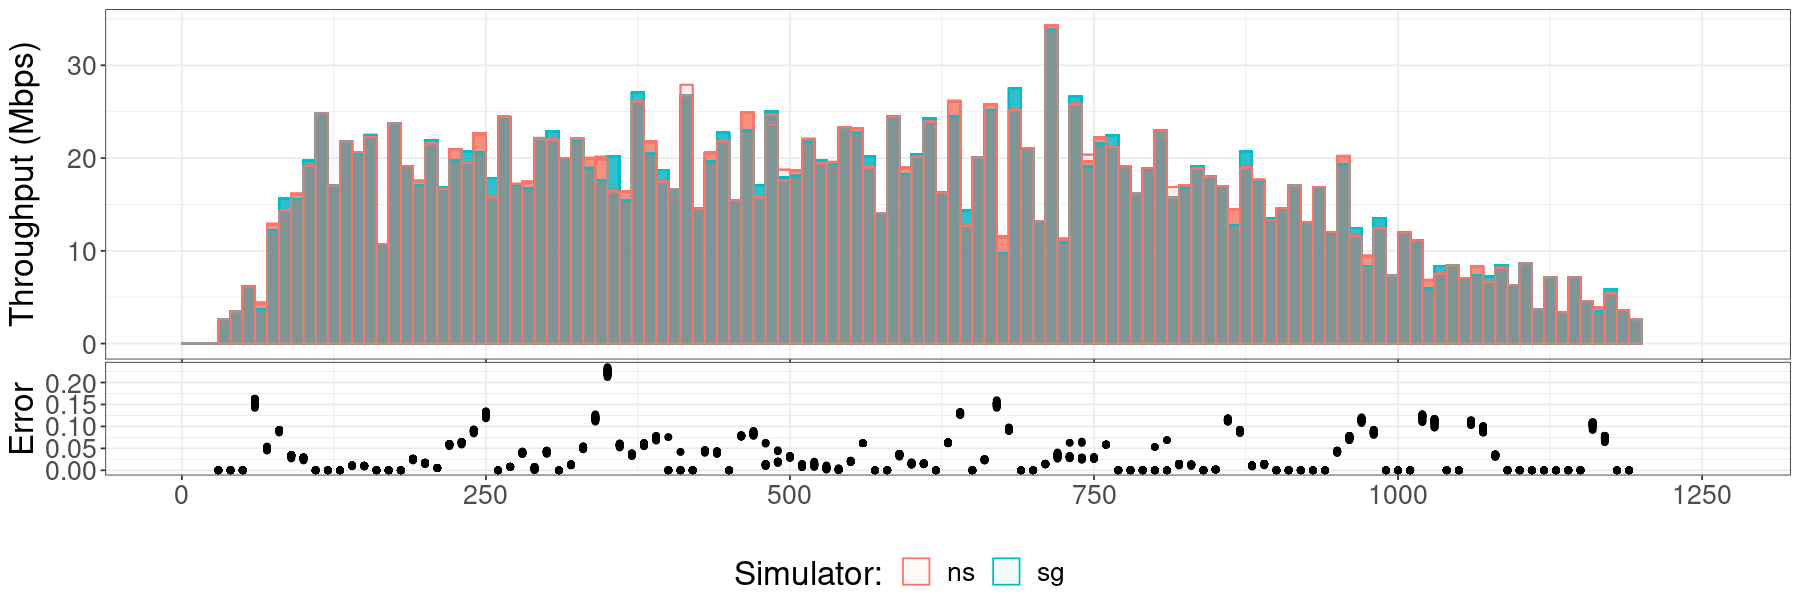

Warning message:
“Removed 93 rows containing missing values (geom_point).”


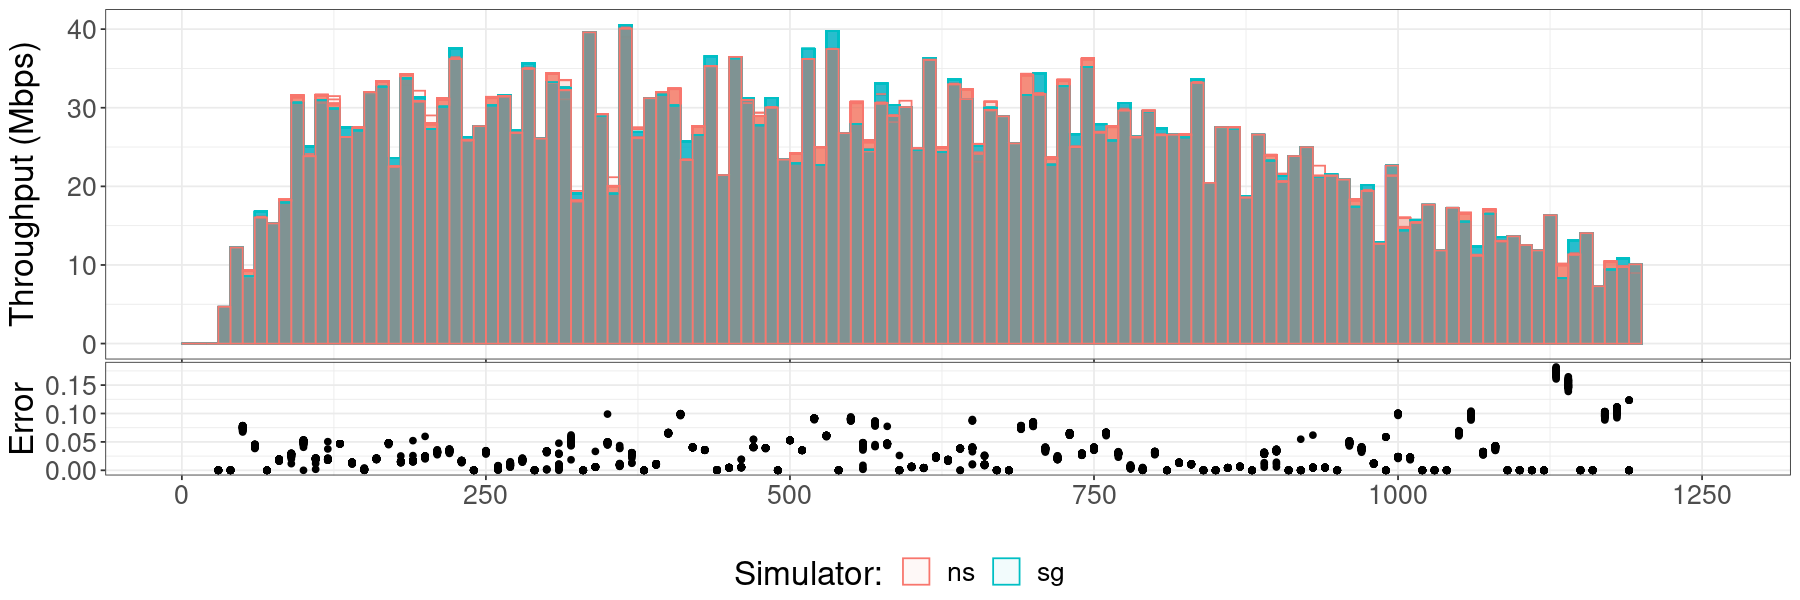

Warning message:
“Removed 102 rows containing missing values (geom_point).”


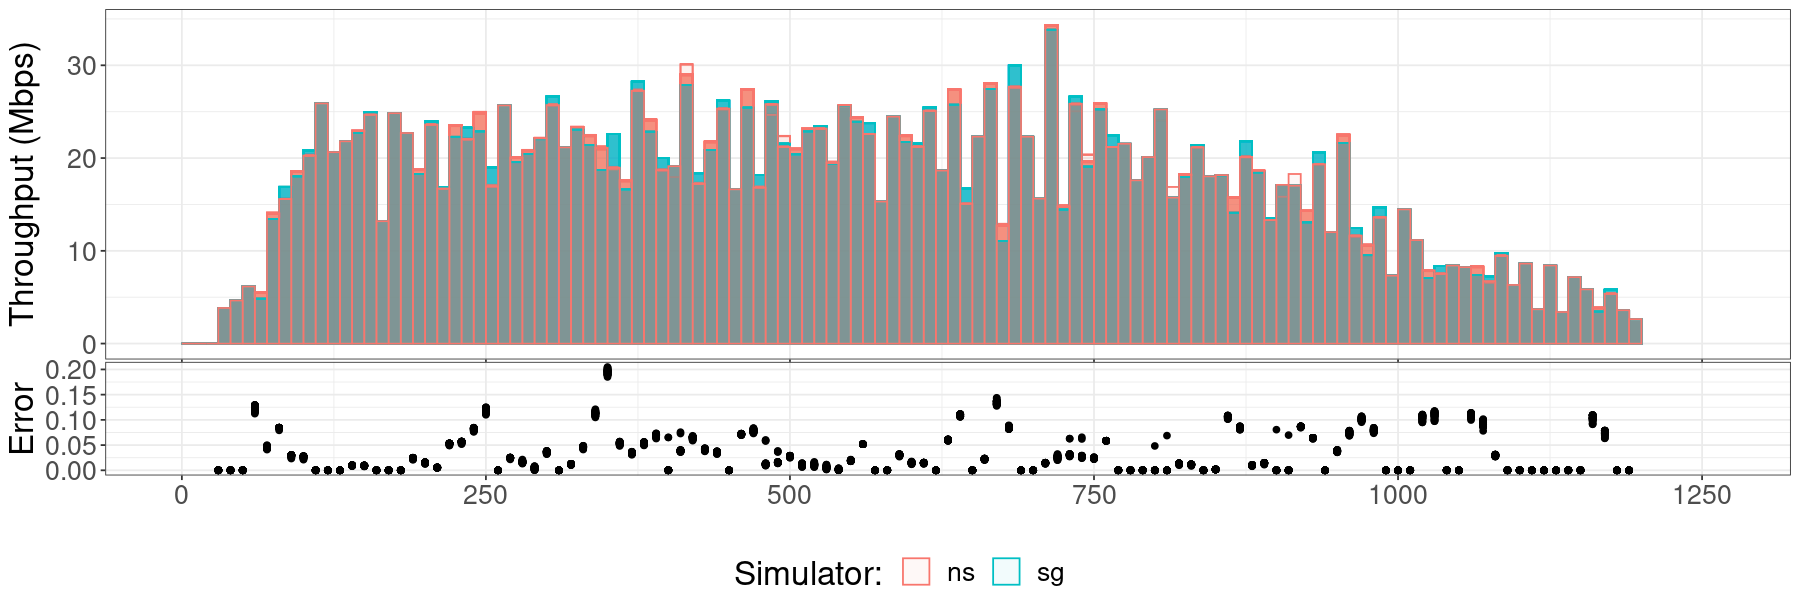

Warning message:
“Removed 87 rows containing missing values (geom_point).”


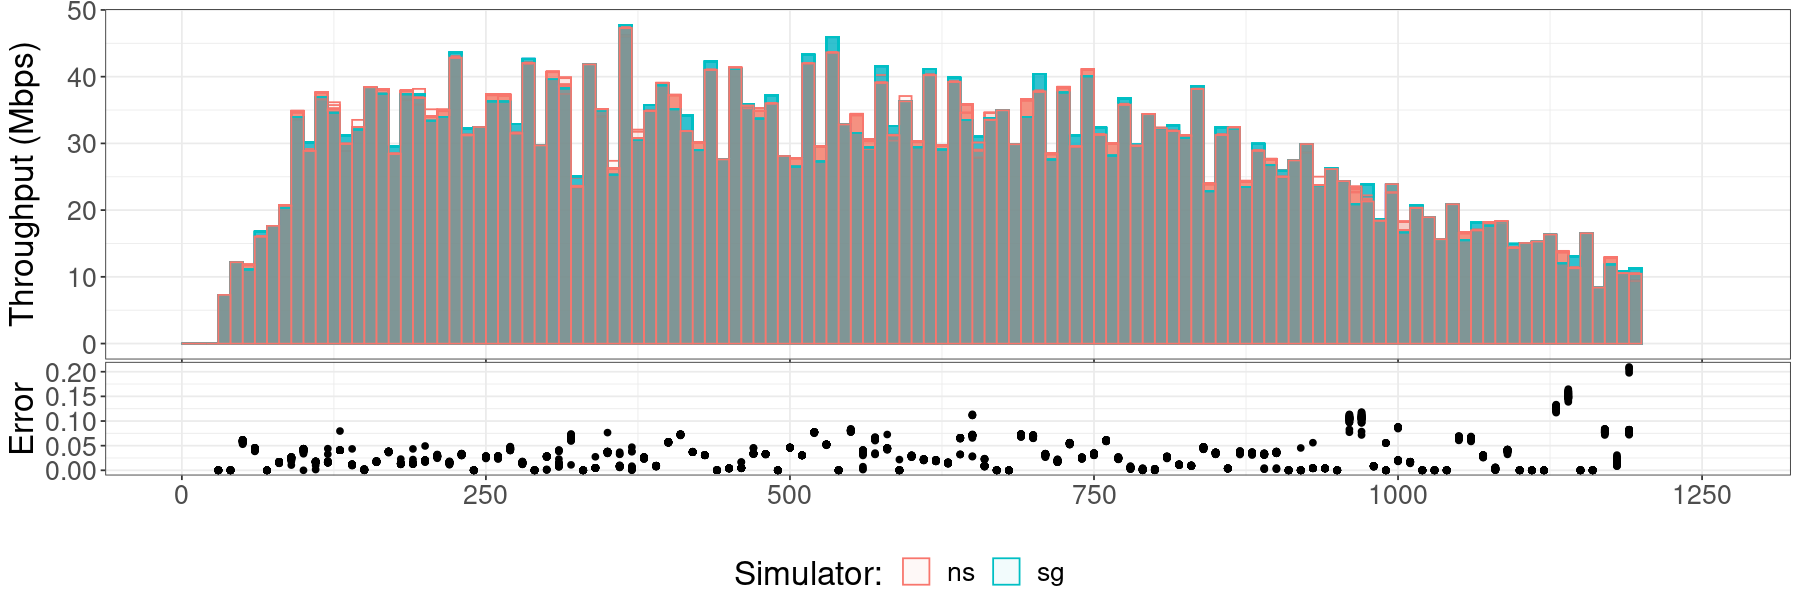

Warning message:
“Removed 96 rows containing missing values (geom_point).”


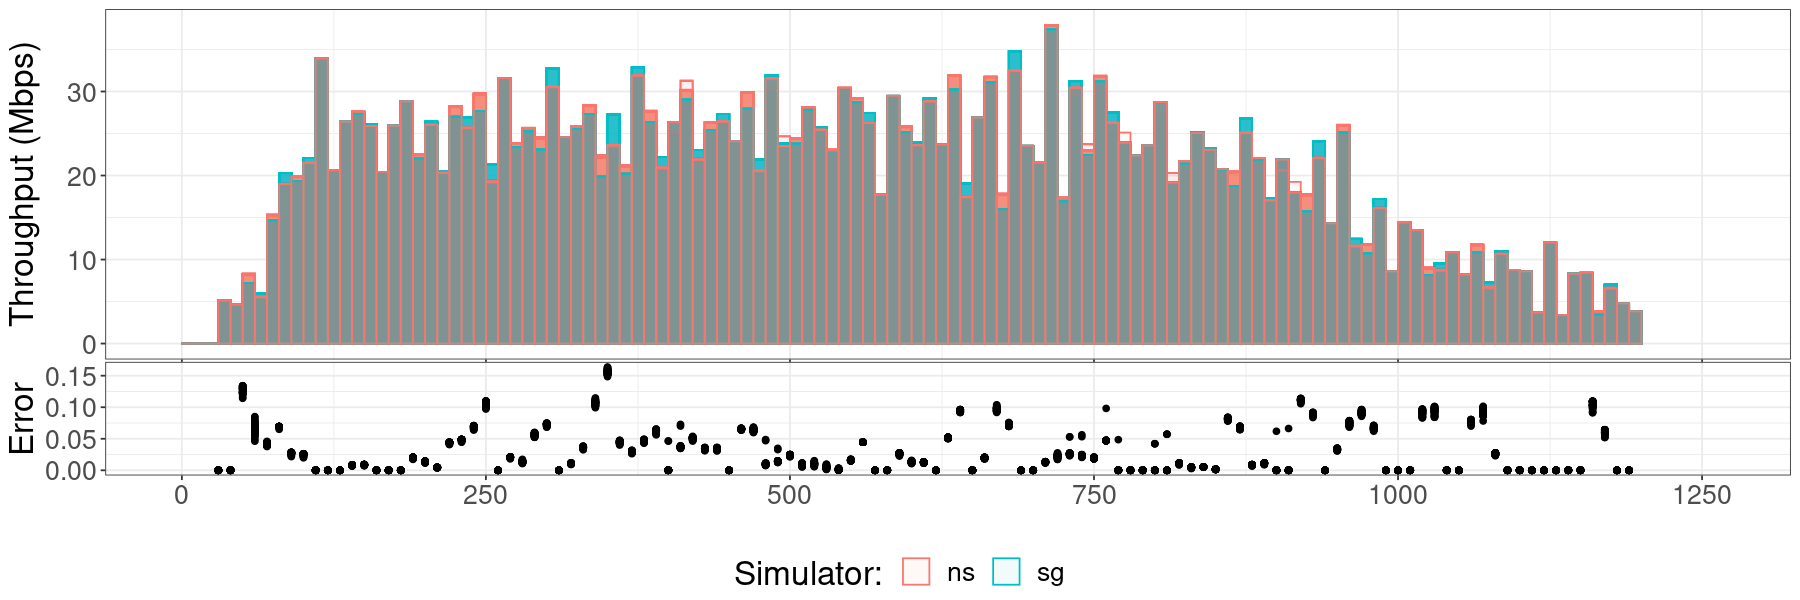

Warning message:
“Removed 90 rows containing missing values (geom_point).”


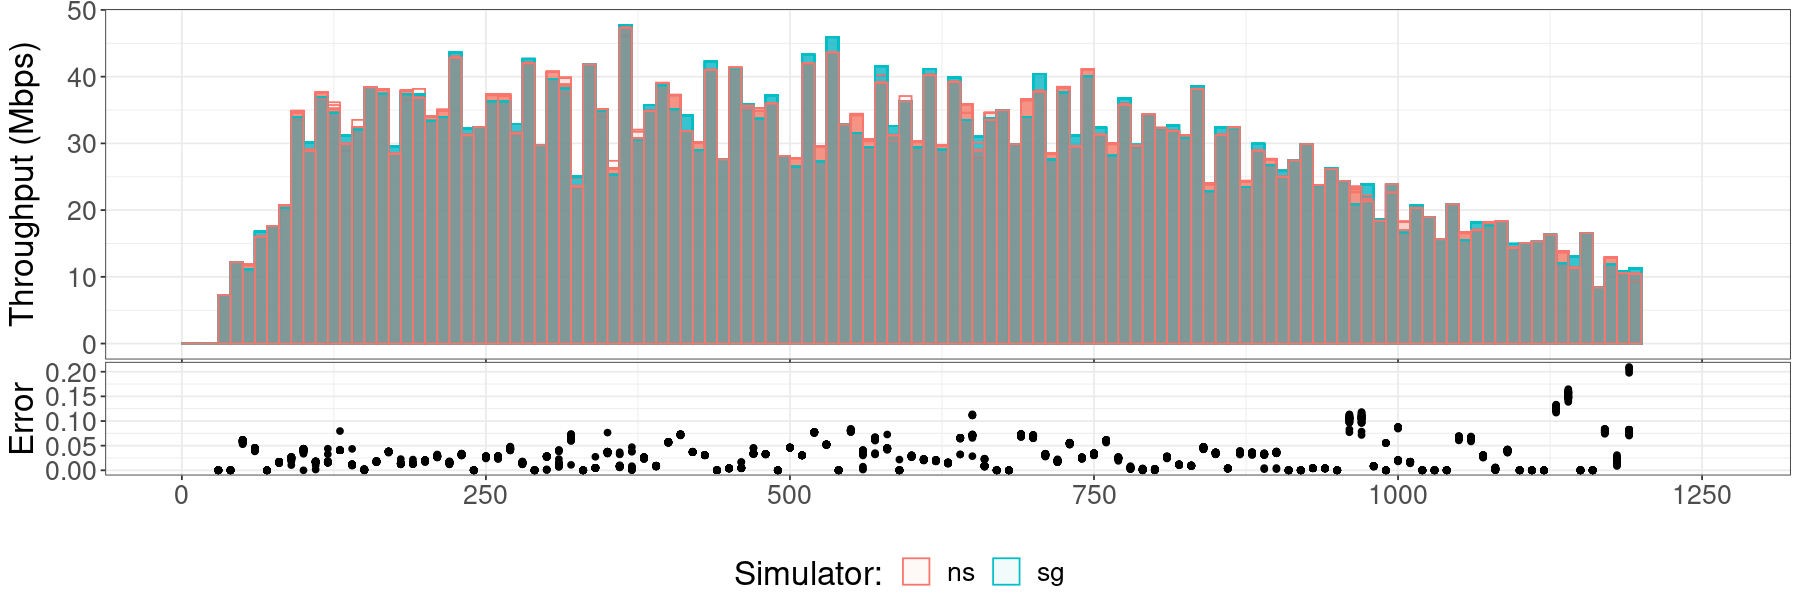

Warning message:
“Removed 105 rows containing missing values (geom_point).”


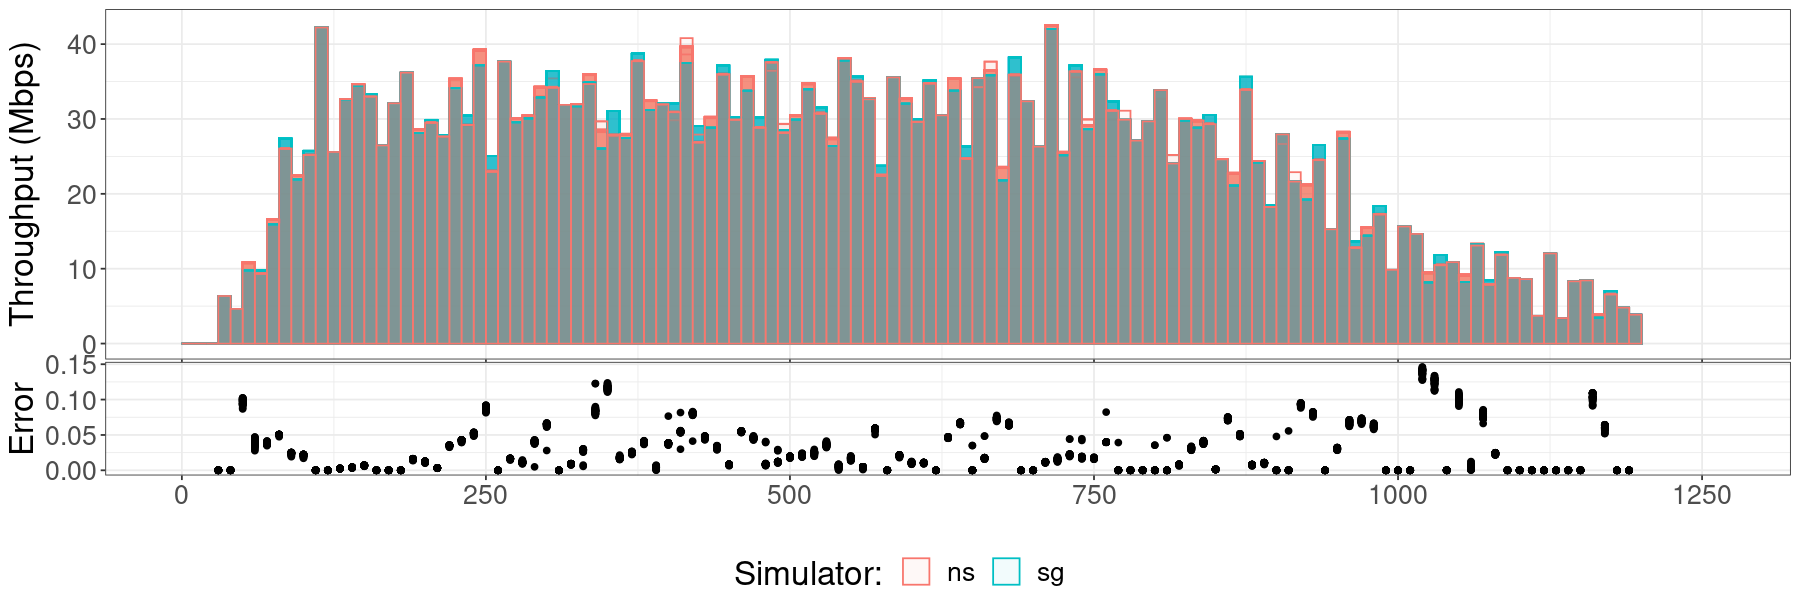

Warning message:
“Removed 93 rows containing missing values (geom_point).”


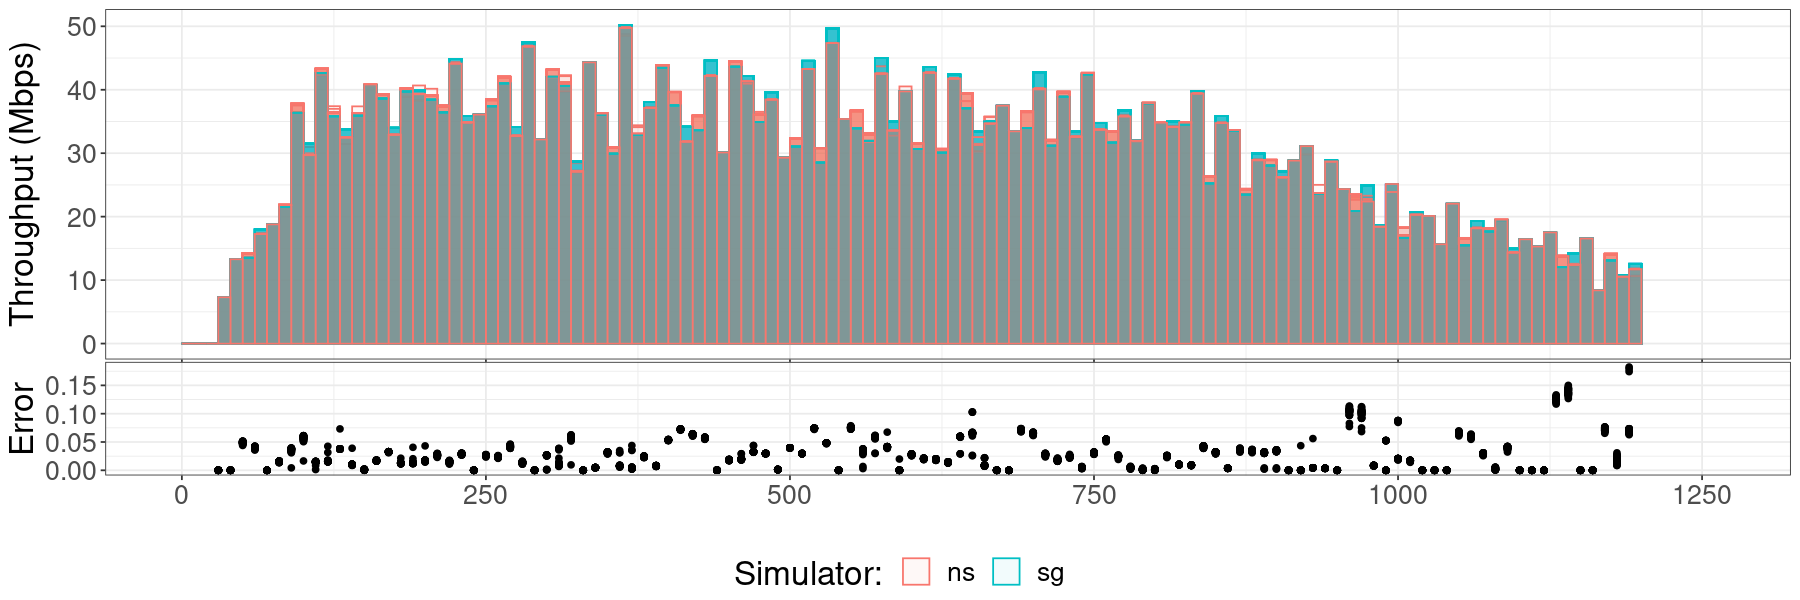

Warning message:
“Removed 99 rows containing missing values (geom_point).”


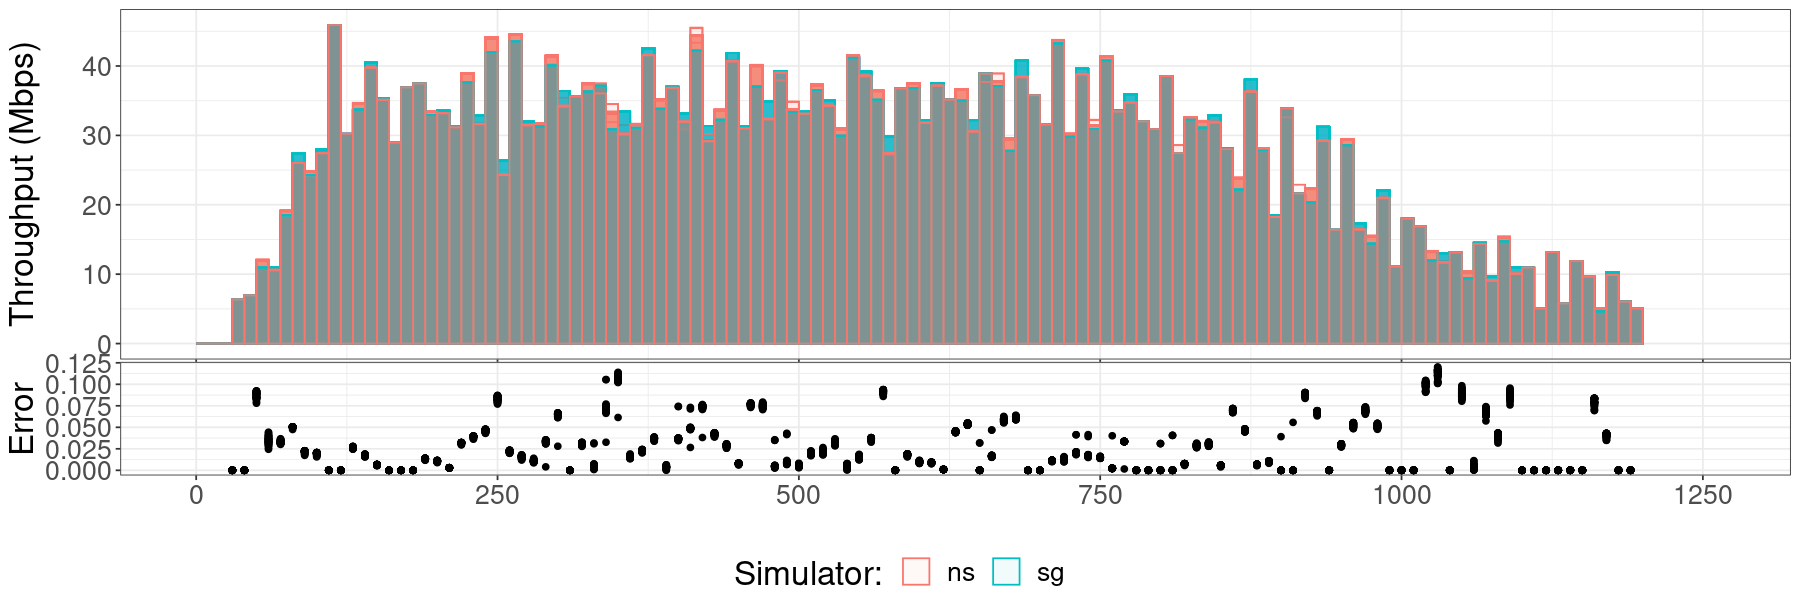

Warning message:
“Removed 93 rows containing missing values (geom_point).”


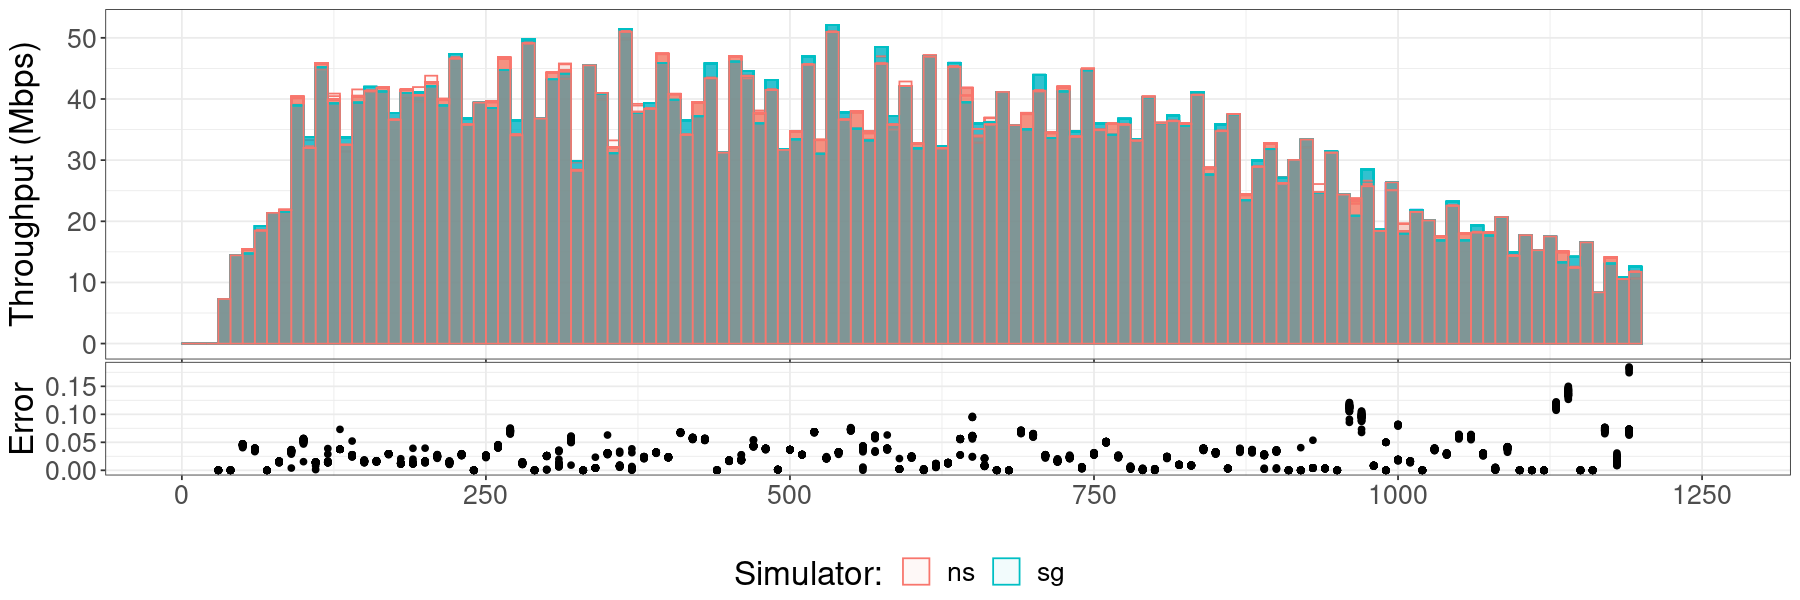

Warning message:
“Removed 99 rows containing missing values (geom_point).”


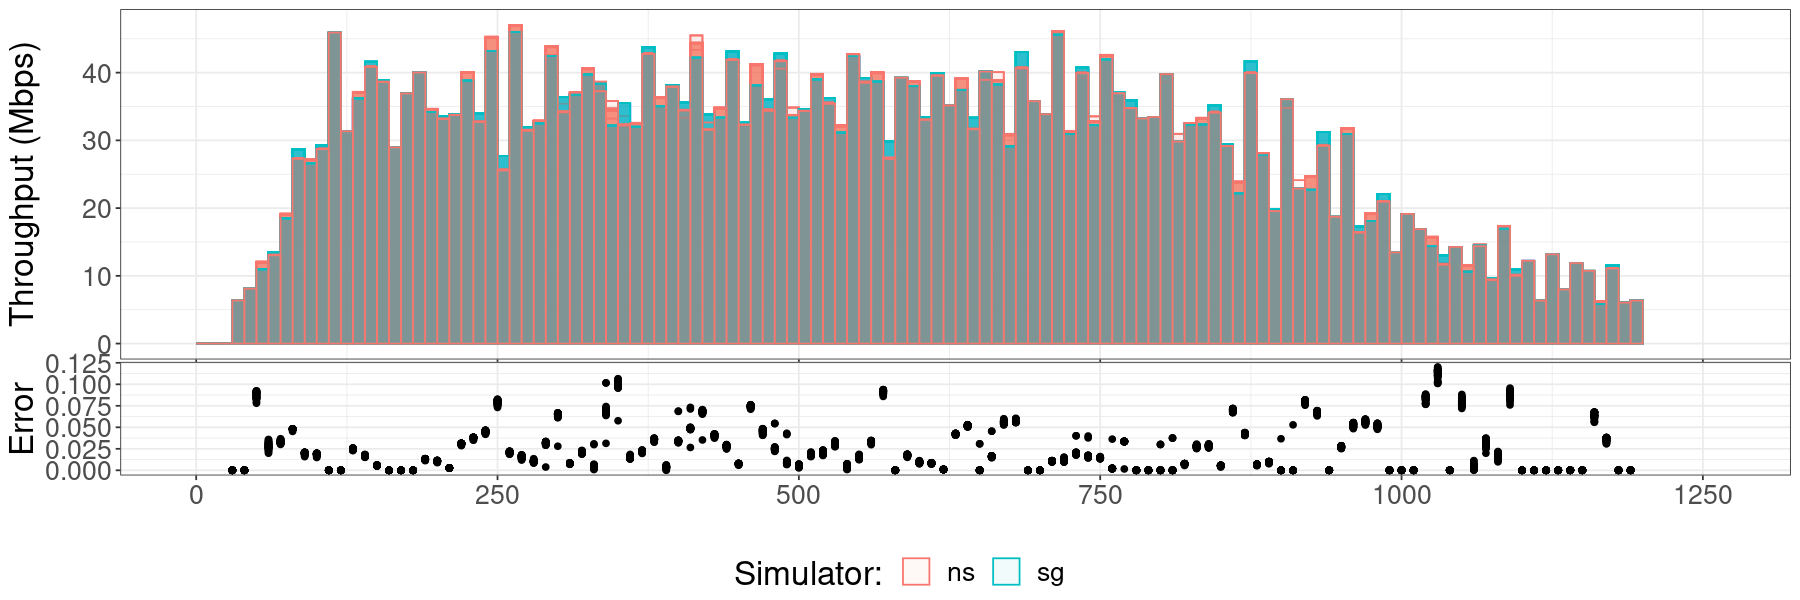

Warning message:
“Removed 99 rows containing missing values (geom_point).”


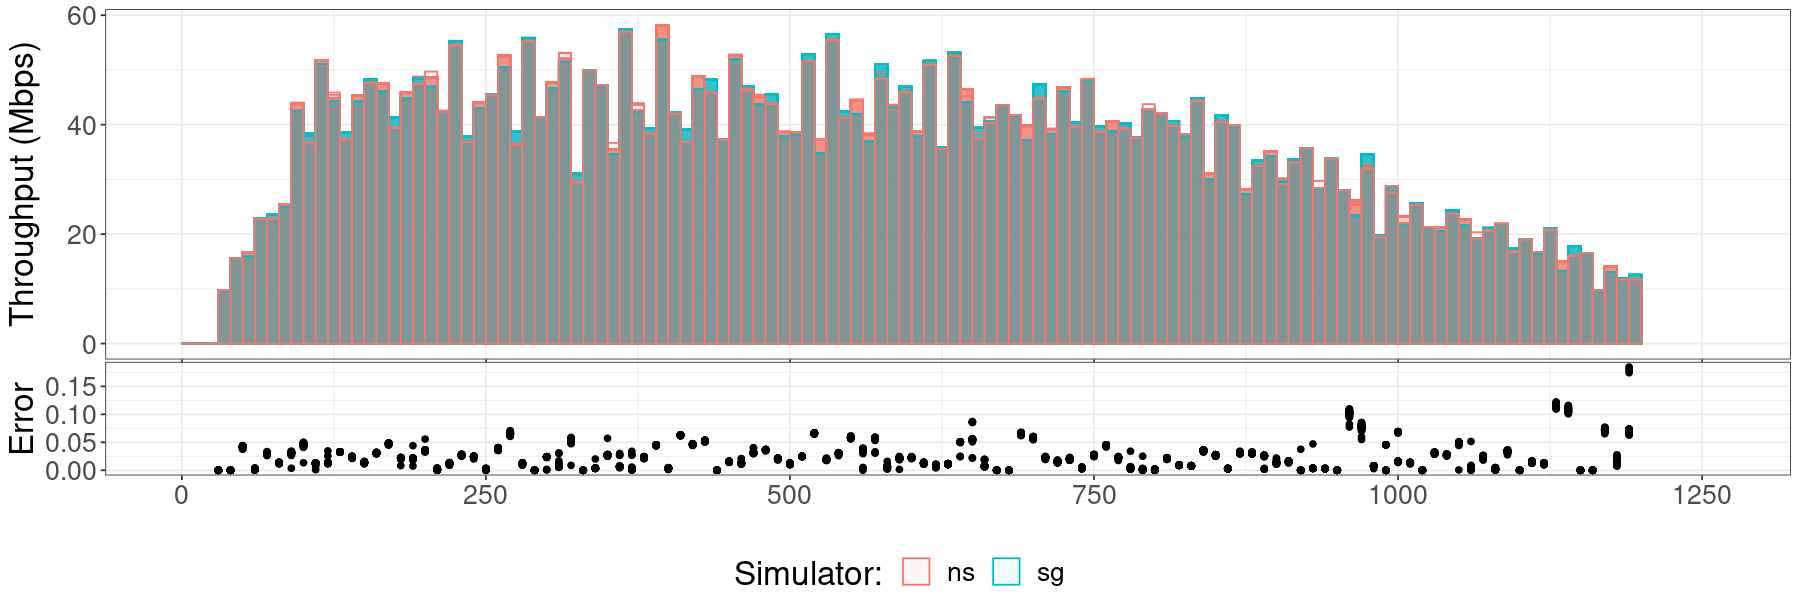

Warning message:
“Removed 99 rows containing missing values (geom_point).”


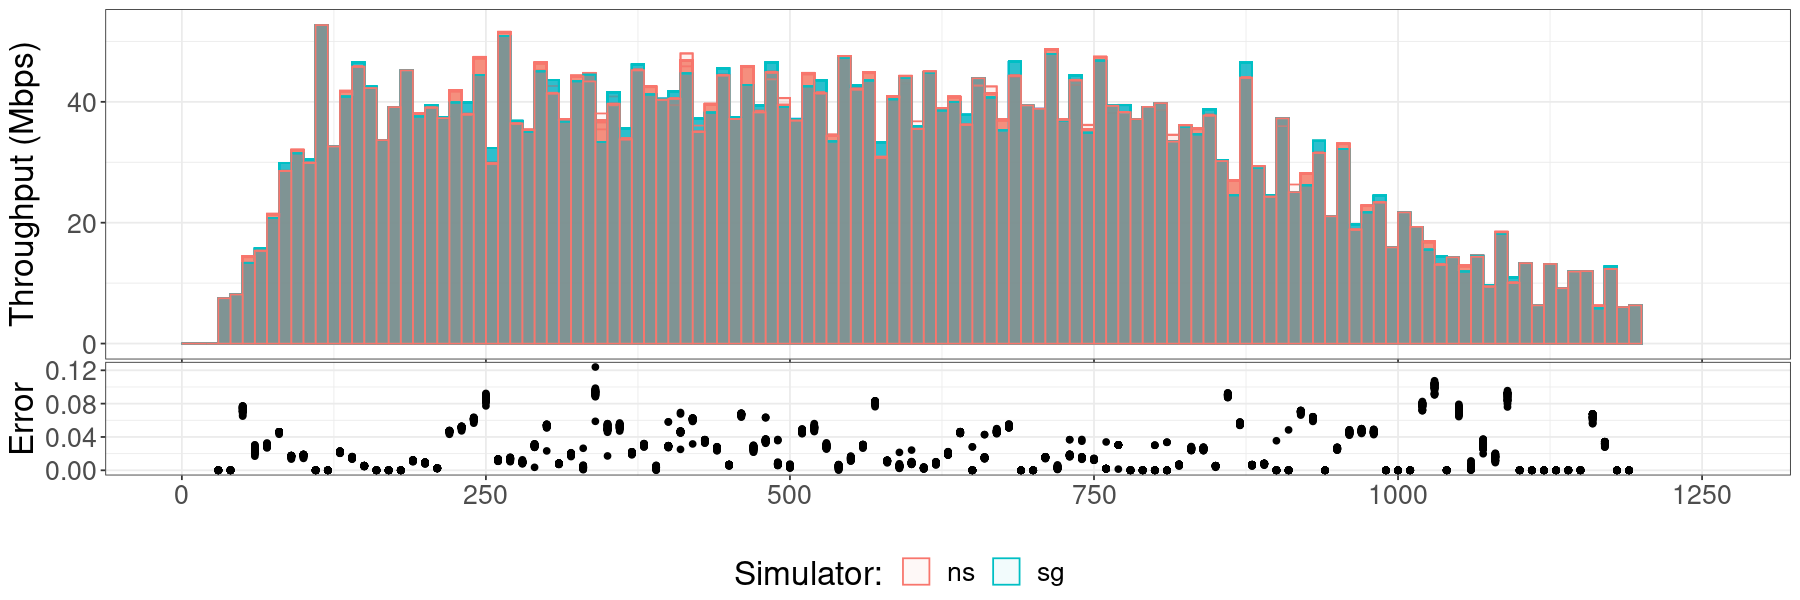

Warning message:
“Removed 99 rows containing missing values (geom_point).”


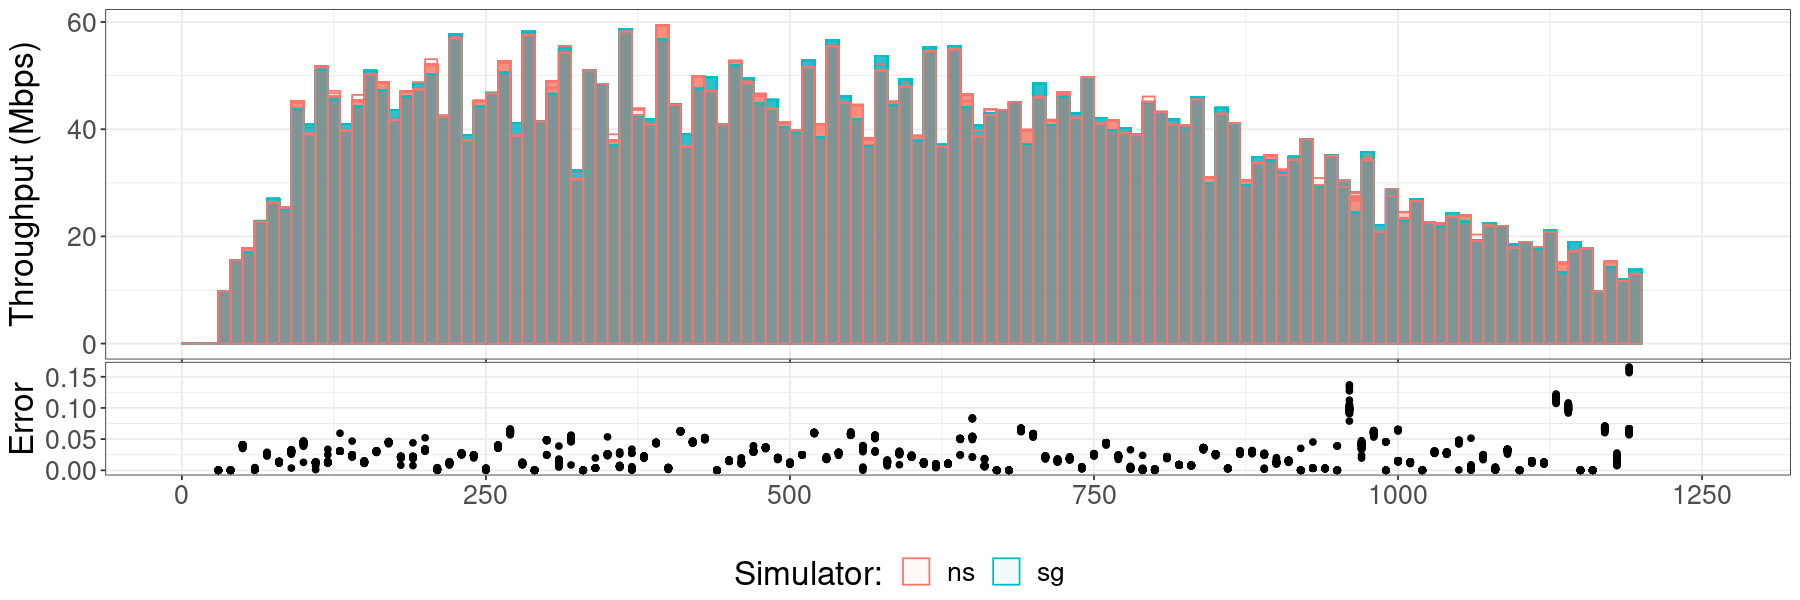

Warning message:
“Removed 102 rows containing missing values (geom_point).”


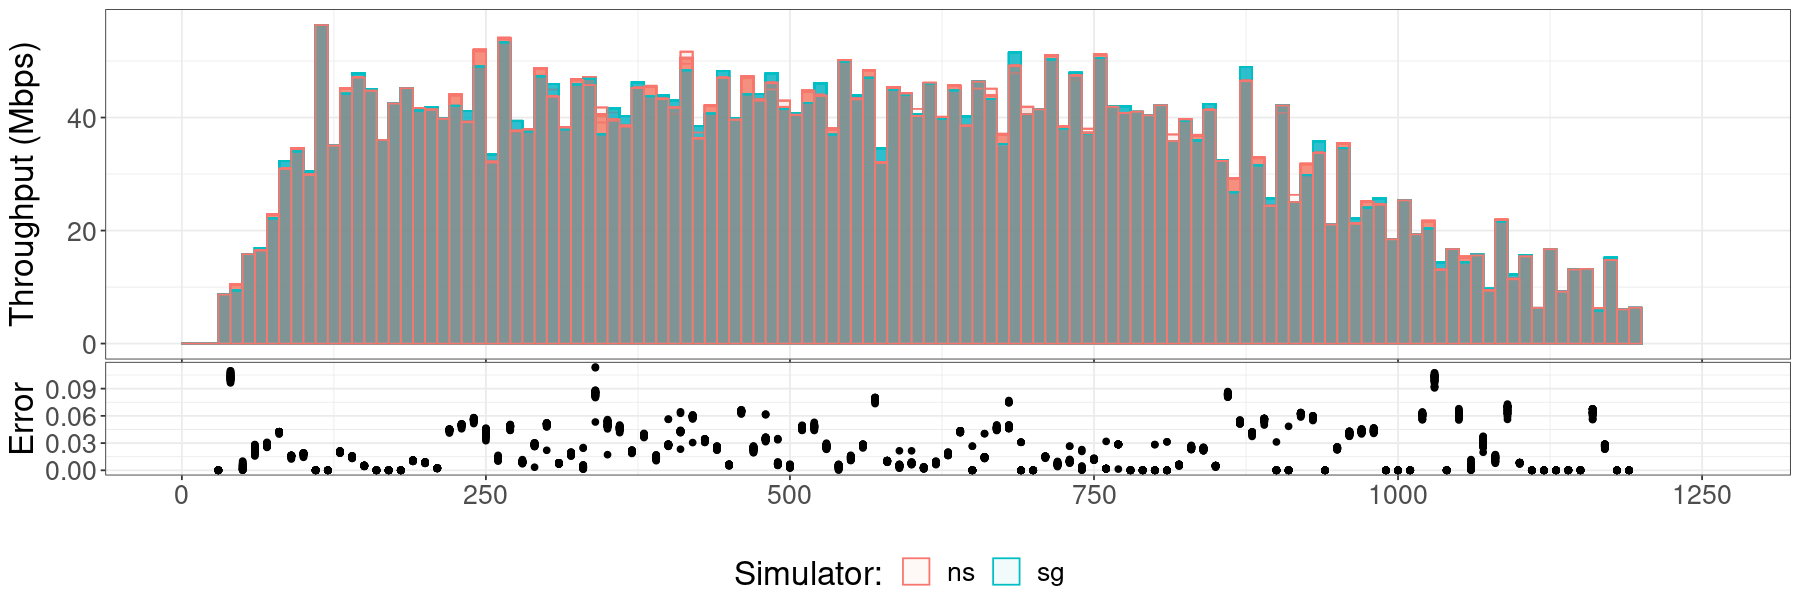

Warning message:
“Removed 96 rows containing missing values (geom_point).”


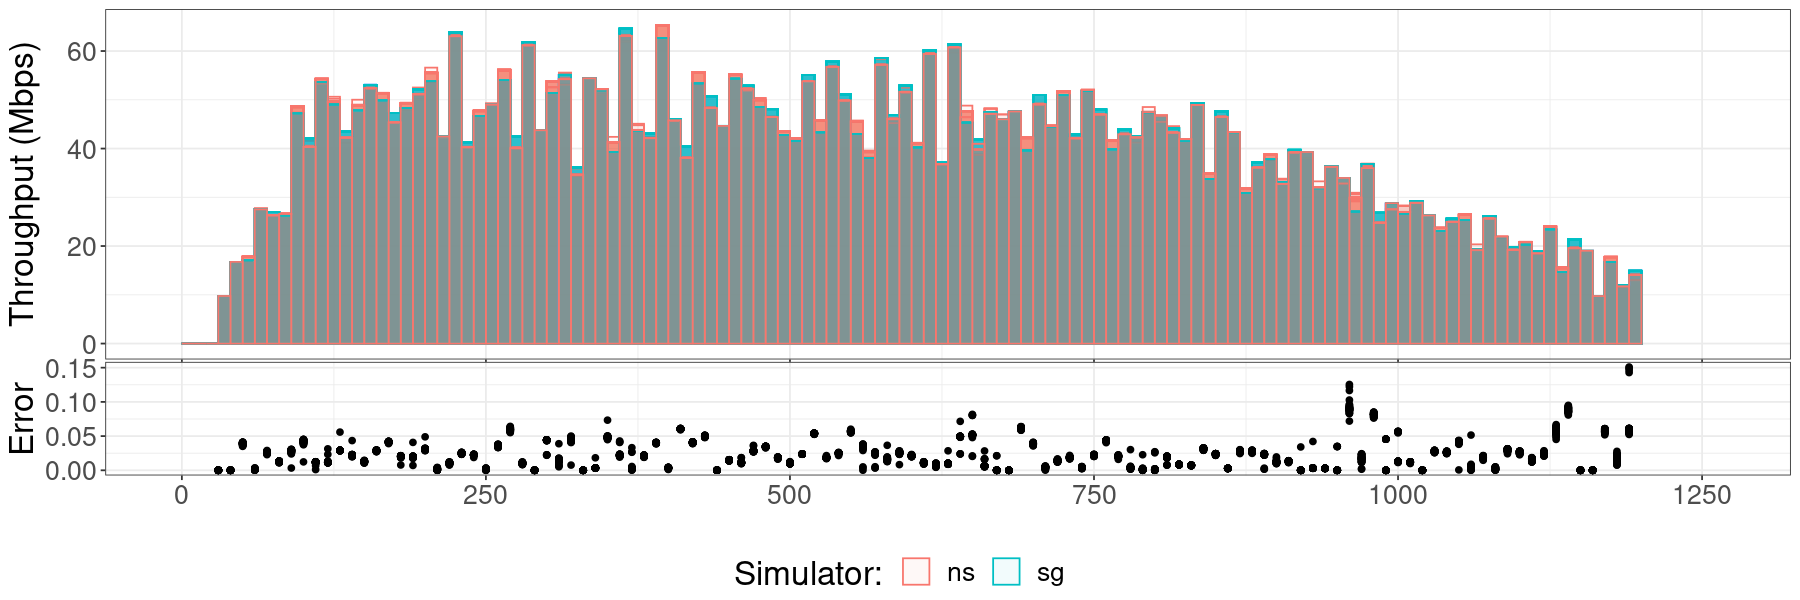

Warning message:
“Removed 99 rows containing missing values (geom_point).”


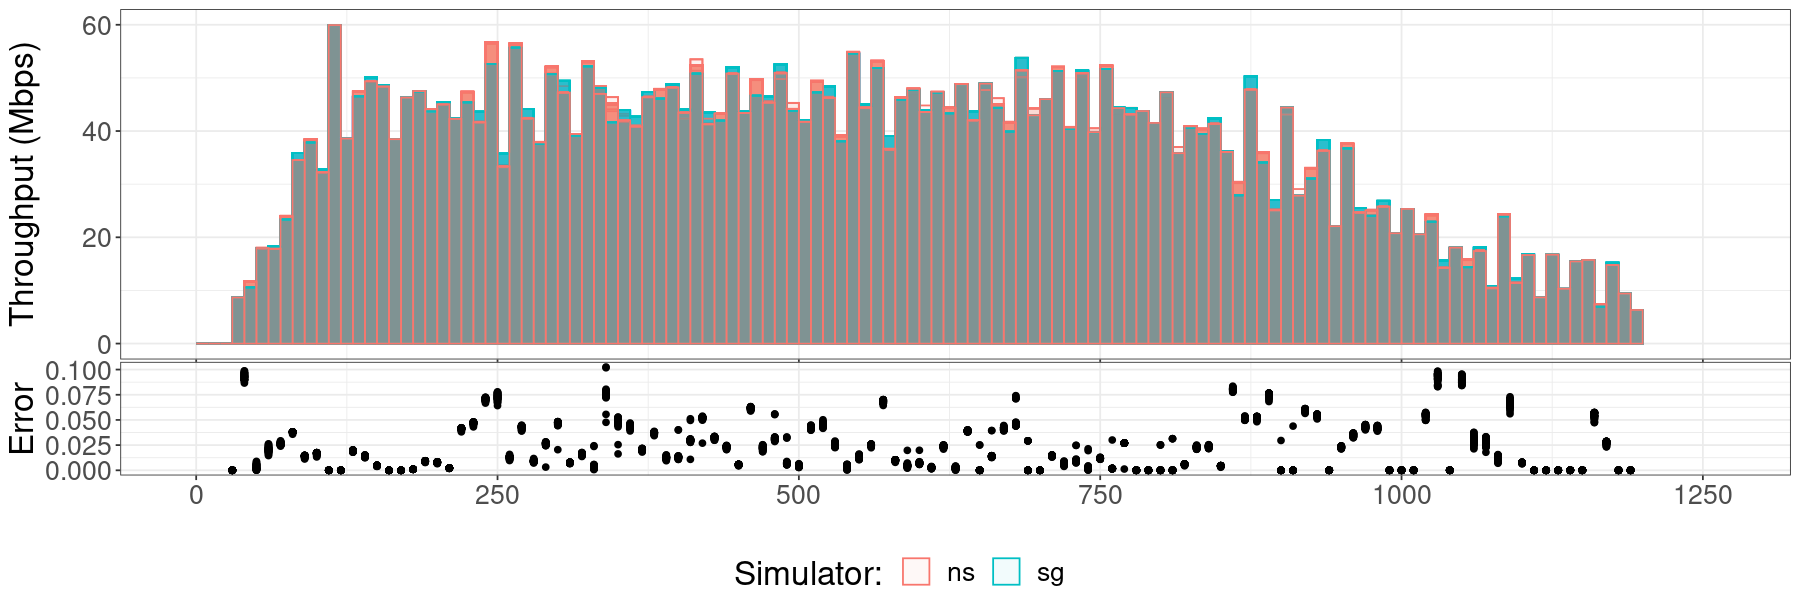

Warning message:
“Removed 96 rows containing missing values (geom_point).”


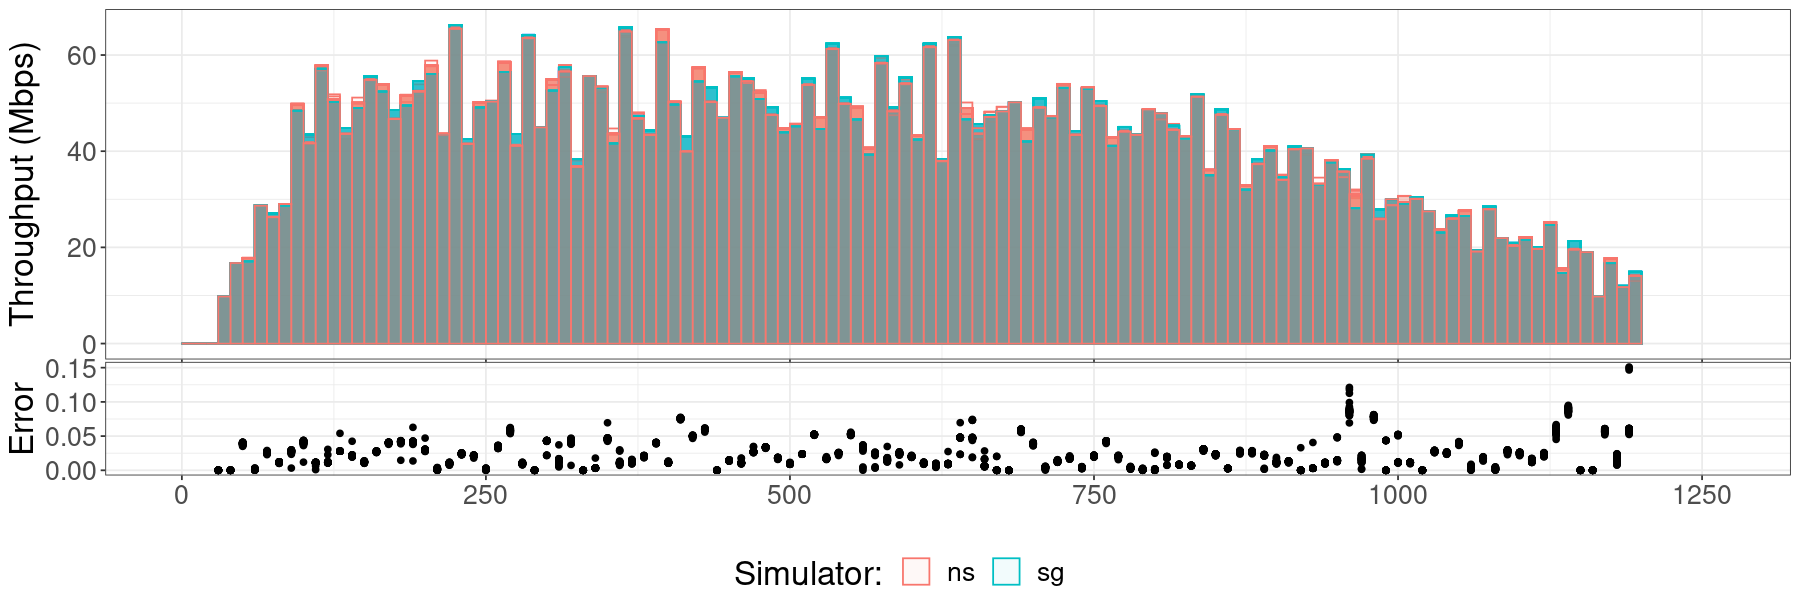

Warning message:
“Removed 93 rows containing missing values (geom_point).”


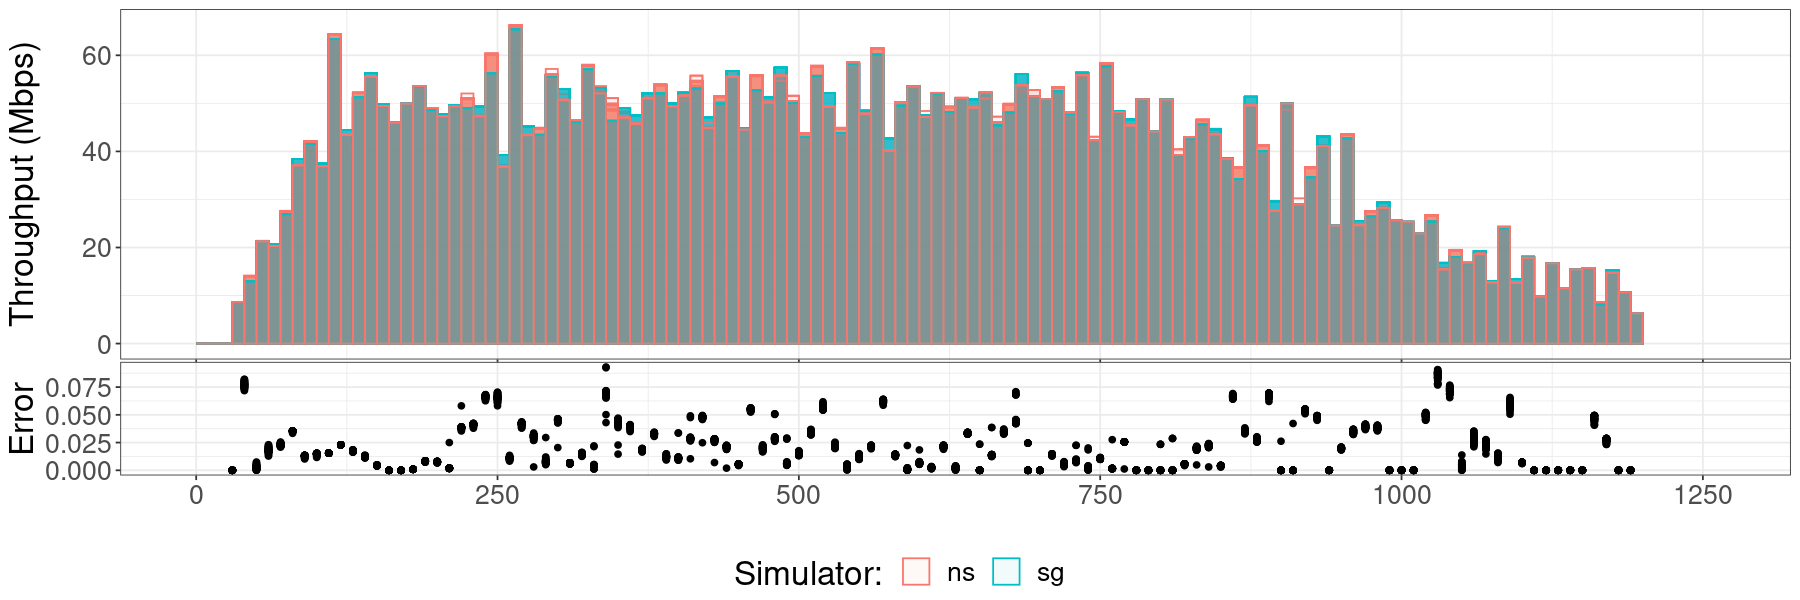

Warning message:
“Removed 90 rows containing missing values (geom_point).”


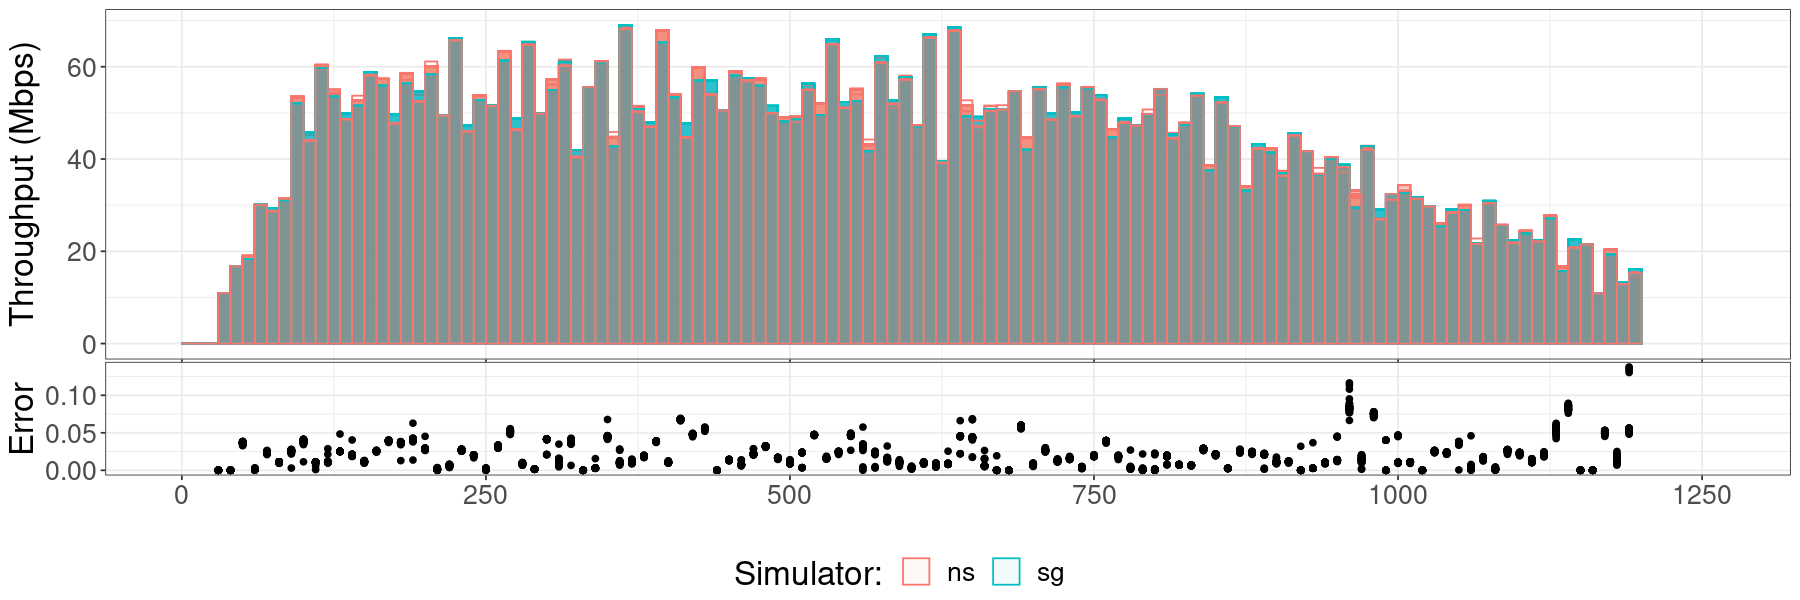

Warning message:
“Removed 99 rows containing missing values (geom_point).”


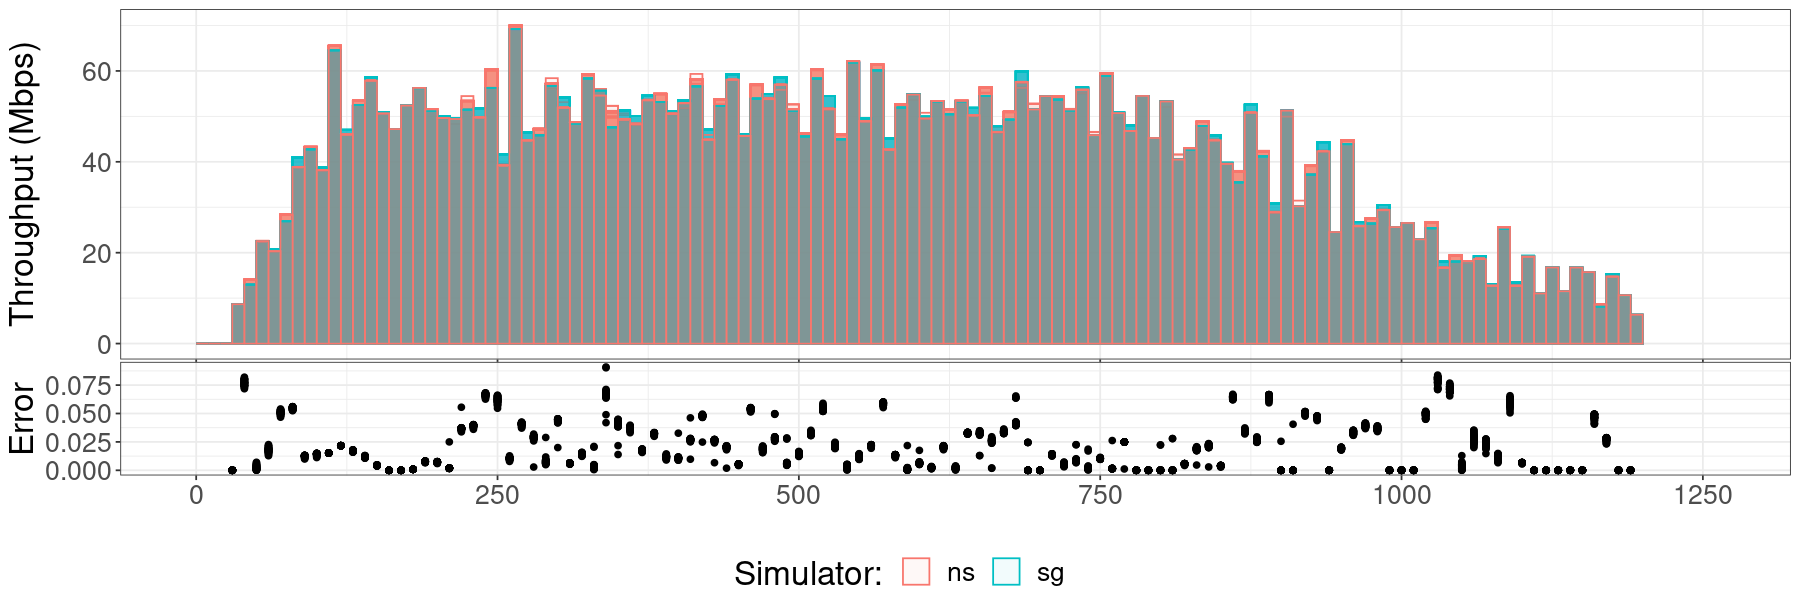

Warning message:
“Removed 96 rows containing missing values (geom_point).”


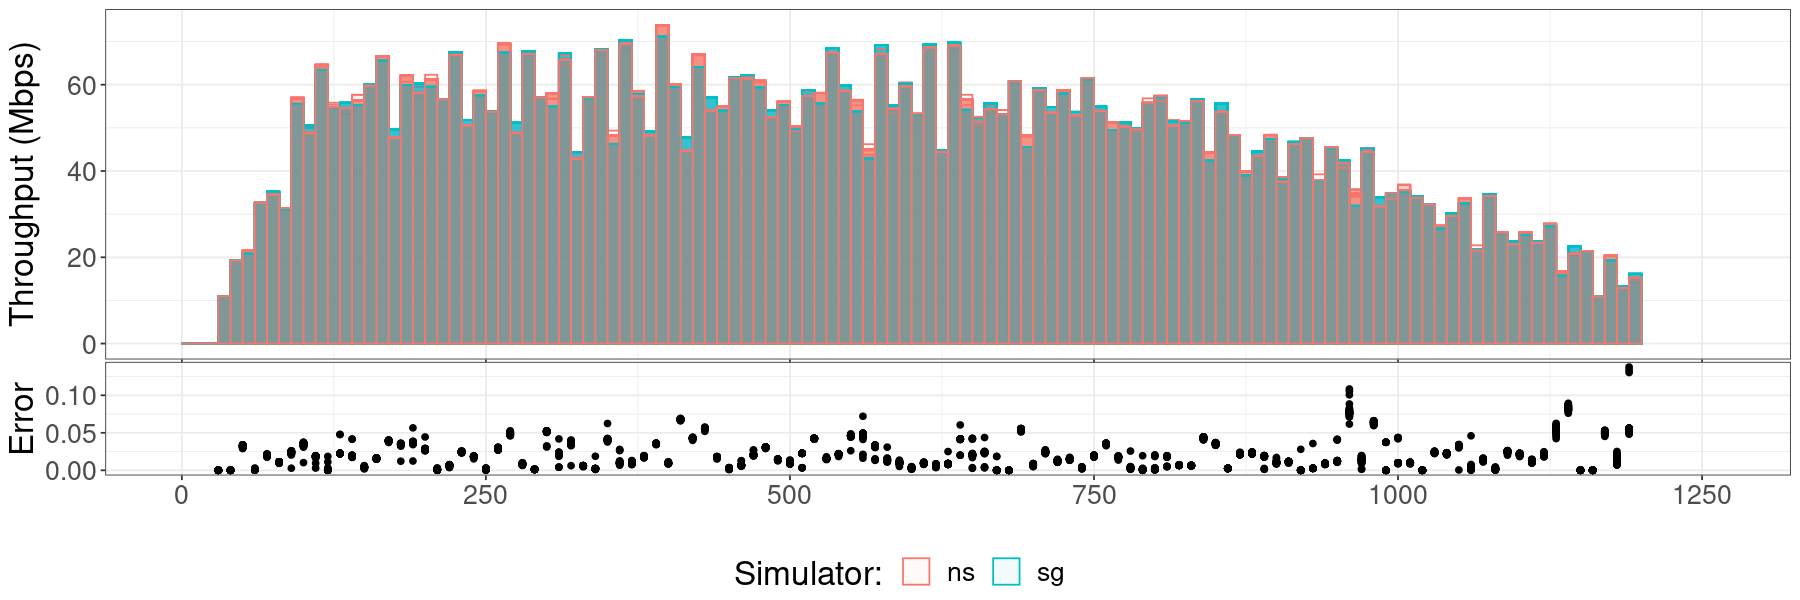

Warning message:
“Removed 96 rows containing missing values (geom_point).”


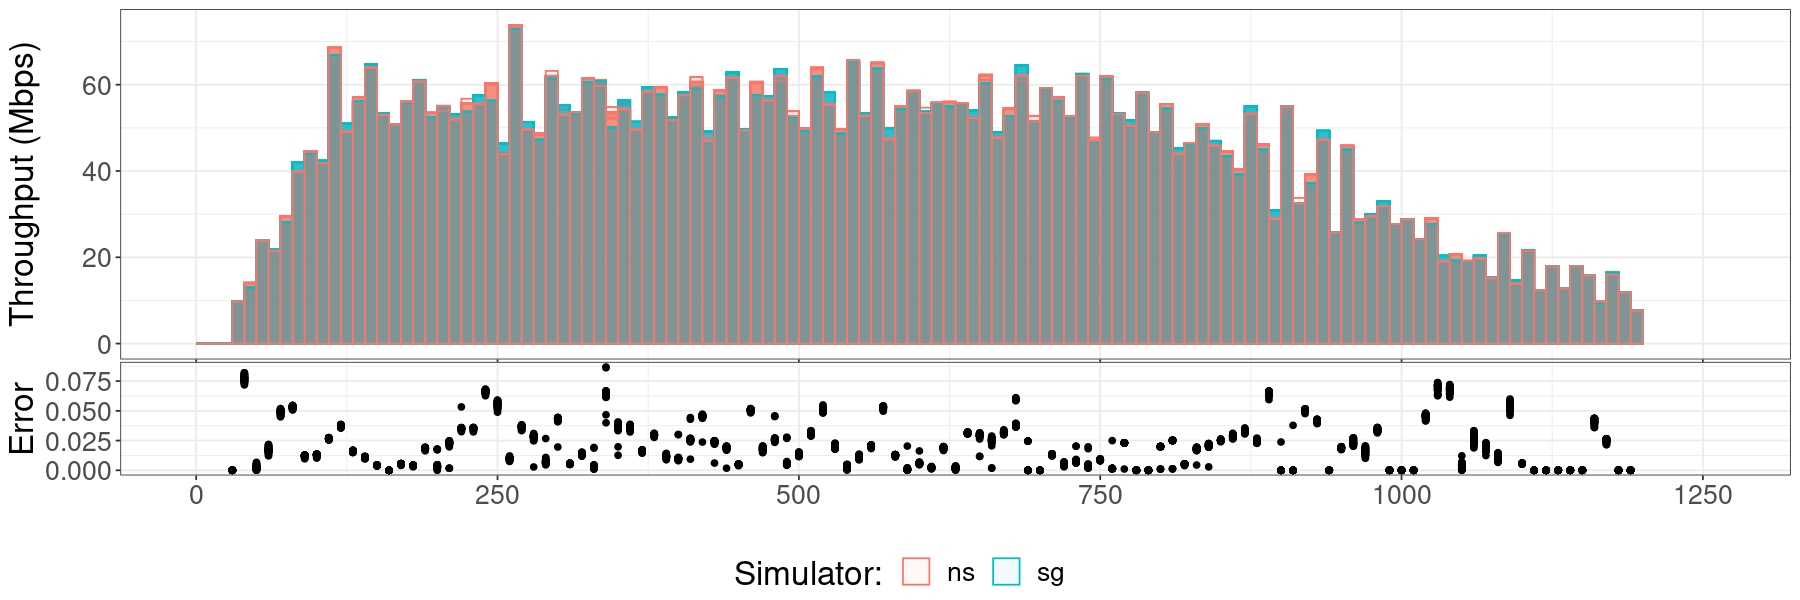

Warning message:
“Removed 93 rows containing missing values (geom_point).”


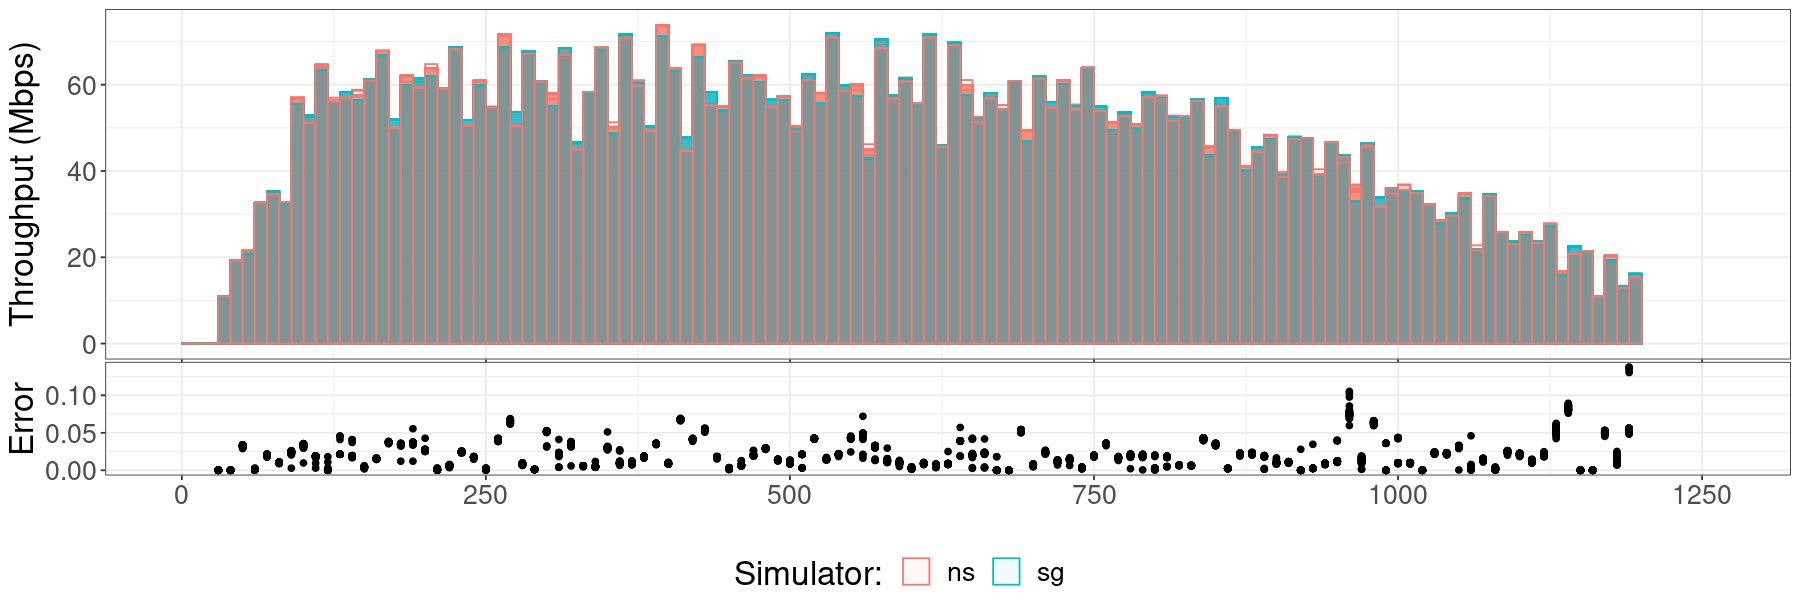

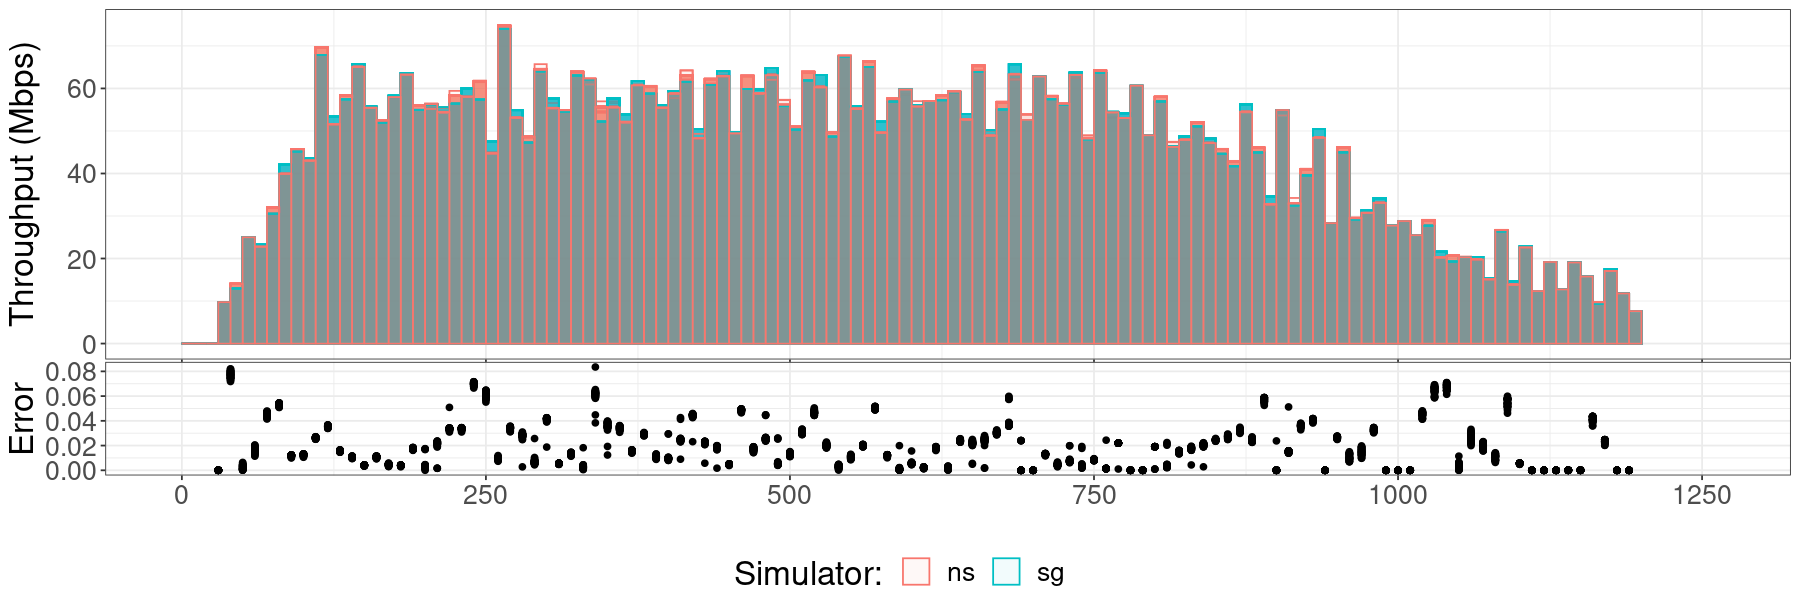

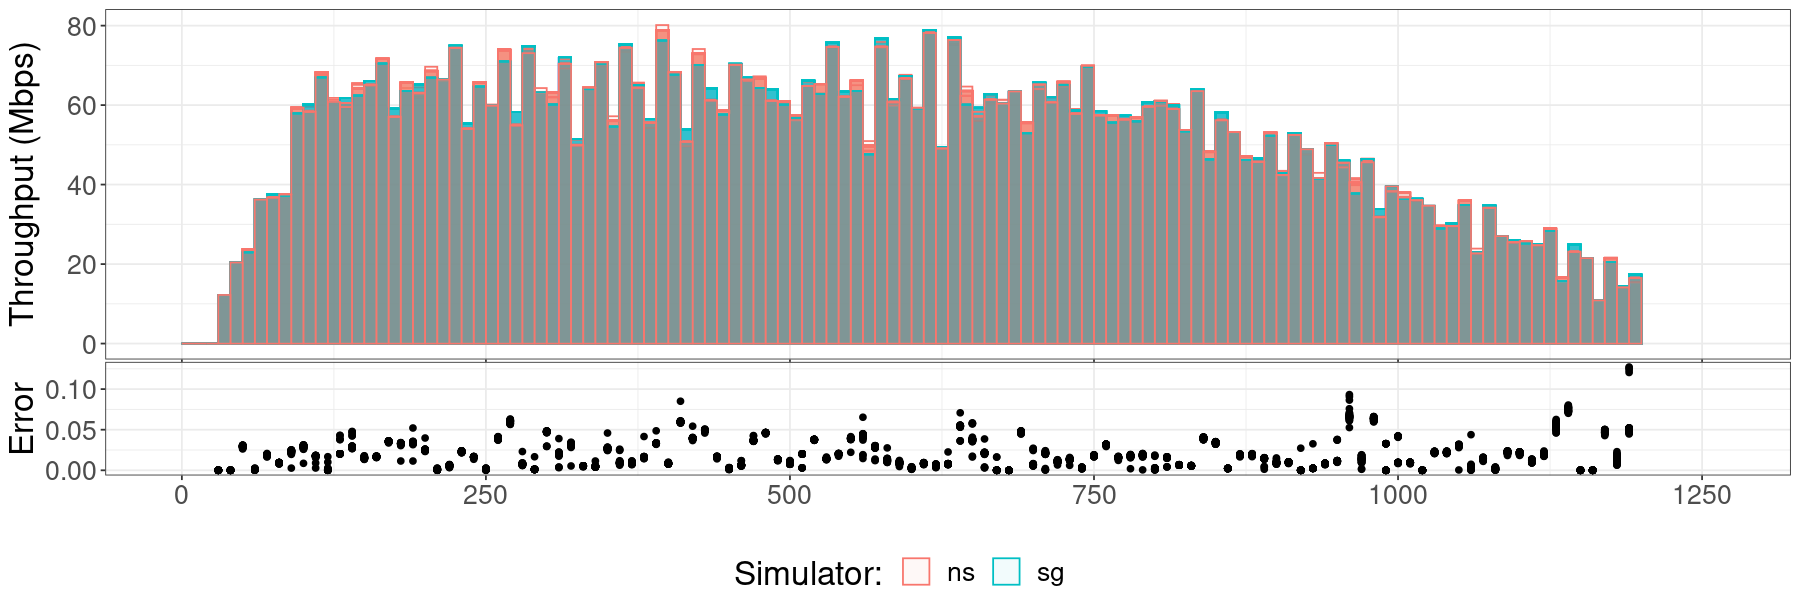

In [42]:
setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/largeExperiment/")
d <- as_tibble(read.csv(paste("logs/1653128468/","/results.csv", sep=""))) #1653066955 #1652981653  #1652807099
d <- arrange(d , nbCells, maxSTAPerCell, seedP, seedNS)
#d <- d %>% filter(nbCells==22)
newSeed <- d[1,]$seedP
dTot <- data.frame()
dTotErr <- data.frame()

draw_bars <- function(dataset, datasetErr, n) {
    options(repr.plot.width=15, repr.plot.height=5)
    #print(n)
    #dataset <- dataset %>% filter(simulator=="ns")
    datasetErr <- datasetErr %>% mutate(relerr=abs(1-(s1/s2)))
    dataset <- dataset %>% mutate(sizeclean=size*8/1e+6/10)
    df2 <- data_summary(dataset, varname="sizeclean", 
                groupnames=c("simulator","start")) %>% filter(simulator=="ns")
    g <- ggplot() + 
      #geom_jitter(data=dataset, aes(x=start+5, y=size*8/1e+6/10, group=simulator), size=1)+
      geom_rect(data=dataset, aes(NULL,NULL,xmin=start,xmax=end,ymin=0,ymax=sizeclean,fill=simulator,colour=simulator),
              size=0.5, alpha=0.05) +
      #geom_errorbar(data=df2, aes(x=start+4, ymin=sizeclean-sd, ymax=sizeclean+sd), position=position_dodge(.9))+

      scale_x_continuous(limits = c(0, 1260),breaks = seq(0, 1400, by = 250)) +
      #ggtitle(n)+
      theme_bw()+
      theme(text = element_text(size = 20), legend.position = "top",axis.text.x = element_blank())+
      labs(y= "Throughput (Mbps)", x = "", color='Simulator:', fill='Simulator:') 
    
    dferr2 <- data_summary(datasetErr, varname="relerr", groupnames=c("start"))

    g2 <- ggplot() + 
      geom_point(data=datasetErr, aes(x=start, y=relerr))+
      scale_x_continuous(limits = c(0, 1260),breaks = seq(0, 1400, by = 250)) +
      theme_bw()+
      theme(text = element_text(size = 20), legend.position = "none",plot.margin=unit(c(-1,0,0,0), "cm"))+
      labs(y= "Error", x = "") 
    
    
    #gsplit <- grid.arrange(g, g2, nrow=2, ncol=1, heights=c("5","2"))#,common.legend = TRUE, legend="bottom")
    
    
    # https://stackoverflow.com/questions/54650232/align-x-axis-with-grid-arrange
    options(repr.plot.width=15, repr.plot.height=5)

    legend <- get_legend(g)   # get the legend of the first one plot
    prow <- plot_grid( g + theme(legend.position="none"),
           g2 + theme(legend.position="none"),
           align = 'v',
           hjust = -1,
           nrow = 2,
           rel_heights=c(6, 2))
    p <- plot_grid( prow, legend, nrow=2, rel_heights=c(1,0.1))
    plot(p)
    ggsave("gwifi_thbypart.pdf", plot=p,width=15,height=6.5) #gsplit
}

for( i in rownames(d) ) {

    if(strtoi(i)%%2==0) next
    if(newSeed!=d[i,]$seedP) {
        draw_bars(dTot, dTotErr, paste("nbSTATot:",d[i,]$nbSTATot,"nbCells:",d[i,]$nbCells," seedP:",d[i,]$seedP," minSTAPerCell: ",d[i,]$minSTAPerCell," maxSTAPerCell: ",d[i,]$maxSTAPerCell))
        dTot <- data.frame()
        dTotErr <- data.frame()
        newSeed <- d[i,]$seedP
    }
    fth <- d[i,]$thByPartFile
    dfthbypart <- as_tibble(read.csv(paste("logs/1653128468/",fth,sep="")))
    dfthbypart <- dfthbypart %>% filter(start < 1200)
    dfthbypart <- dfthbypart %>% mutate(seed=d[i,]$seedNS)
    
    dfthbyparta <- arrange(dfthbypart, start)
    #print(head(dfthbyparta))
    derr <- data.frame(matrix(ncol = 4, nrow = 0))
    n <- c("start", "end", "s1","s2")
    colnames(derr) <- n
    for( j in rownames(dfthbyparta) ){
        if(strtoi(j)%%2==0) next
        jn <- strtoi(j)
        derr[nrow(derr) + 1,] = c(dfthbyparta[jn,]$start,dfthbyparta[jn,]$end,dfthbyparta[jn,]$size,dfthbyparta[jn+1,]$size)
    }
    #print(head(derr))
    dTotErr <- dTotErr %>% bind_rows(derr)
    dTot <- dTot  %>% bind_rows(dfthbypart)
}




<a id="6.2.4"></a>
## 6.2.4
### Figure Performance

In [ ]:
options(repr.plot.width=15, repr.plot.height=8)

setwd("/home/clem/Code/gitlab.inria.fr/lguegan/wifi-flow-level/run/largeExperiment/")
d <- as_tibble(read.csv(paste("logs/1653128468","/results.csv", sep="")))
d <- arrange(d , nbCells, maxSTAPerCell, seedP, seedNS)

dns <- d %>% filter(simulator=="ns3") %>% mutate(simulatorPP="ns-3")
dsg <- d %>% filter(simulator=="sg") %>% mutate(simulatorPP="SimGrid")


g <- ggplot()+
  geom_smooth(data=dns,aes(x=nbSTATot, y=wallClock/3600),color="black", method='lm',size=3)+
  geom_point(data=dns, aes(x=nbSTATot, y=wallClock/3600,color=simulatorPP),size=3) +
  geom_smooth(data=dsg,aes(x=nbSTATot, y=wallClock/3600),color="black", method='lm',size=1.5)+
  geom_point(data=dsg, aes(x=nbSTATot, y=wallClock/3600,color=simulatorPP),size=3) +

  theme_bw()+
  theme(text = element_text(size = 30), legend.position = "bottom")+
  labs(x= "Total number of STAs", y = "Wallclock (h)", color='Simulator:')
plot(g)

ggsave("gwifi_perf_wallclock.pdf", plot=g,width=15,height=7)